# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [2]:
# a. Loading Data
df = pd.read_csv('../Data/first_data.csv')
df.sample(5)

,league,team,season,revenue,spent,competition,position,wins,ties,losses,league_spent,relative,net,goals_for,goals_against,5_season_agg,5_season_net,5_season_league_agg,5_season_relative,first_tier
4086,Switzerland,Grasshopper Club Zurich,96,0.45,0.0,First Tier,1,21.0,10.0,5.0,0.50,0.000000,0.45,64.0,29.0,0.00,4.30,49.52,0.000000,1
2101,Netherlands,Feyenoord Rotterdam,6,9.80,3.4,First Tier,3,21.0,8.0,5.0,37.92,0.089662,6.40,79.0,34.0,39.13,-1.28,189.14,0.206884,1
1702,Portugal,FC Arouca,15,0.00,0.0,First Tier,≤10,7.0,7.0,20.0,121.60,0.000000,0.00,26.0,50.0,0.00,0.00,485.63,0.000000,1
644,Italy,Inter Milan,9,10.18,70.1,First Tier,1,25.0,9.0,4.0,606.72,0.115539,-59.92,70.0,32.0,206.65,-97.86,1730.75,0.119399,1
4162,Ukraine,Dynamo Kyiv,10,22.15,15.7,First Tier,2,22.0,5.0,3.0,49.98,0.314126,6.45,61.0,16.0,51.85,-17.50,226.64,0.228777,1


## 1. Categorical Columns 

+ ### `league` Column :

### a. Explore the column:

In [3]:
# Summary of the 'league' column
league_summary = df['league'].describe()
print("=== Summary statistics for the 'league' column ===\n")
print(league_summary)
print("\n==================================================")

=== Summary statistics for the 'league' column ===

count        4342
unique         15
top       England
freq          300
Name: league, dtype: object



In [4]:
league_distribution = df['league'].value_counts()
league_distribution

league
England        300
Spain          300
Italy          300
France         300
Portugal       300
Turkey         300
Netherlands    300
Belgium        300
Scotland       300
Switzerland    300
Russia         286
Germany        284
Austria        283
Greece         266
Ukraine        223
Name: count, dtype: int64

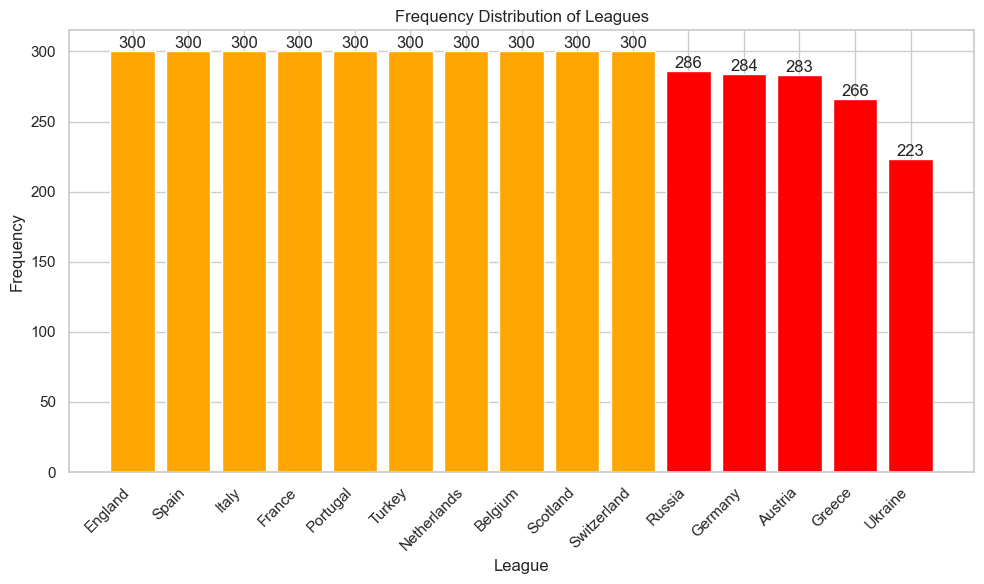

In [5]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the thresholds using quantiles
low_threshold = league_distribution.quantile(0.33)  # Lower third
high_threshold = league_distribution.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in league_distribution.values:
    if value > high_threshold:
        colors.append('green')  # High frequency
    elif value < low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# The frequency distribution of the 'league' column
plt.figure(figsize=(10, 6))
bars = plt.bar(league_distribution.index, league_distribution.values, color=colors)

# Add the numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Frequency Distribution of Leagues')
plt.xlabel('League')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

+ The **top 10** leagues (**England**, **Spain**, **Italy**, **France**, **Portugal**, **Turkey**, **Netherlands**, **Belgium**, **Scotland**, **Switzerland**) all have an equal number of entries, with **300** each.
+ **Russia** has slightly **fewer** entries, with **286**, followed by **Germany** with **284**, and **Austria** with **283**.
+ **Greece** and **Ukraine** have the **fewest** entries, with **266** and 223 respectively.
+ Most of the data is **concentrated** in the **top European leagues**, while some of the smaller leagues have less representation in the dataset.

### b. Check and Correct Data Type :

In [6]:
# Verify the data type of the "league" column
league_dtype = df['league'].dtype
print(f"The data type of the 'league' column is: {league_dtype}")

The data type of the 'league' column is: object


In [7]:
# Converting object columns to categorical
df['league'] = df['league'].astype('category')

+ The **`league`** column was converted from **`object`** to **`category`** to enhance **memory efficiency** and **improve processing speed**. This conversion is ideal for columns with repeated values (**15 unique values**), reducing memory usage and ensuring data consistency throughout the analysis.

### c. Handle Missing Values :

In [8]:
# Check for missing values in the 'league' column
missing_values_league = df['league'].isnull().sum()
print(f"Missing values in 'league' column: {missing_values_league}")

Missing values in 'league' column: 0


+ The **`league`** column currently has **no missing** values based on our previous analysis.

### d. Identify and Fix Outliers :

+ All leagues had a reasonable number of entries, with **no** significant **outliers** or **anomalies**.

### e. Summary :

+ The **`league`** column contains data from various **European football** leagues, with the top **10 leagues** (**England**, **Spain**, **Italy**, **France**, **Portugal**, **Turkey**, **Netherlands**, **Belgium**, **Scotland**, **Switzerland**) each represented by **300** entries.
+ **Russia**, **Germany**, and **Austria** have slightly **fewer** entries, while **Greece** and **Ukraine** have the **fewest**.
+ The distribution shows that most data is **concentrated** in the **top European leagues**.
+ The **`league`** column was converted from **`object`** to **`category`**.
+ There are **no missing** values in the **`league`** column.
+ There are **no outliers** values in the **`league`** column.

+ ### `team` Column :

### a. Explore the column:

In [9]:
# Summary of the 'team' column
team_summary = df['team'].describe()
print("=== Summary statistics for the 'team' column ===\n")
print(team_summary)
print("\n================================================")

=== Summary statistics for the 'team' column ===

count                4342
unique                150
top       Manchester City
freq                   30
Name: team, dtype: object



In [10]:
# Frequency distribution of the 'team' column
team_distribution = df['team'].value_counts()
team_distribution

team
Manchester City          30
Akhmat Grozny            30
Spartak Moscow           30
CSKA Moscow              30
Dynamo Moscow            30
                         ..
Kolos Kovalivka          14
SK Austria Klagenfurt    13
FK Polissya Zhytomyr      8
SK Dnipro-1               6
Volos NPS                 6
Name: count, Length: 150, dtype: int64

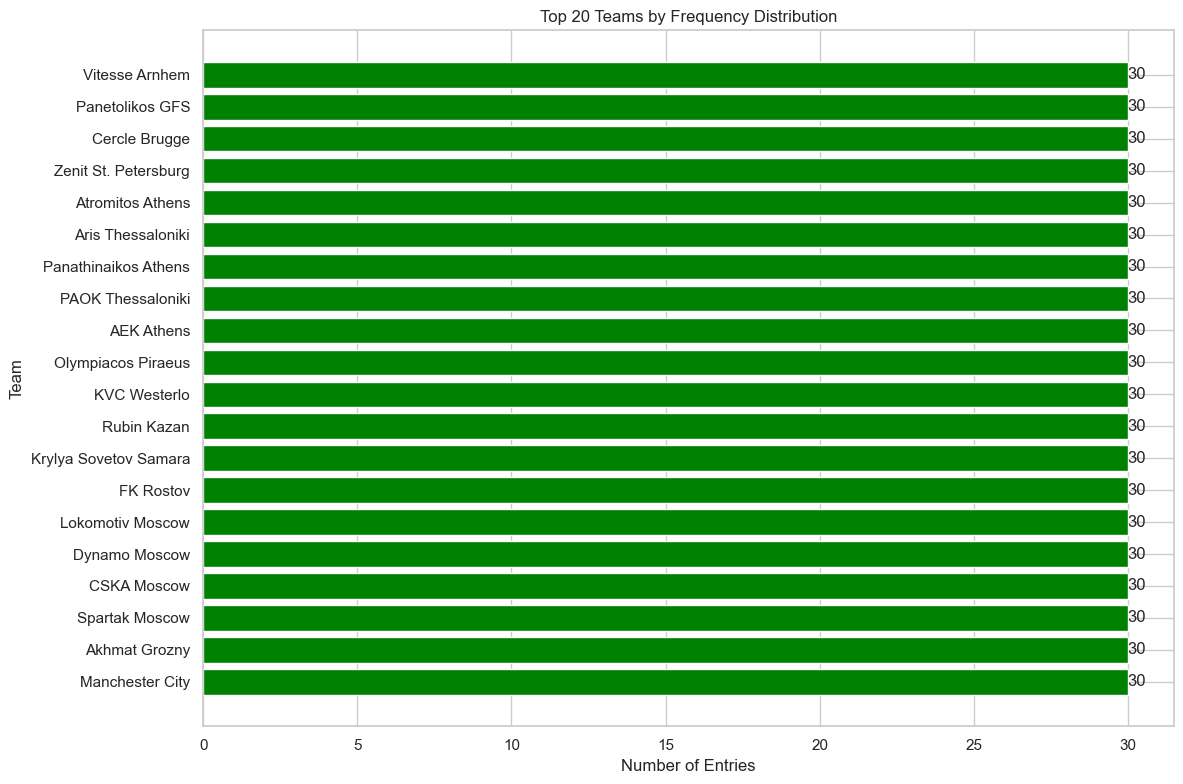

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize the frequency distribution for the top 20 teams with the most entries
plt.figure(figsize=(12, 8))
top_teams = team_distribution.head(20)

# Define the thresholds using quantiles
low_threshold = top_teams.quantile(0.33)  # Lower third
high_threshold = top_teams.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in top_teams.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the bar chart with the assigned colors using Matplotlib directly
bars = plt.barh(top_teams.index, top_teams.values, color=colors)

# Add the numbers on the side of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(bar.get_width()), 
             va='center', ha='left')

plt.title('Top 20 Teams by Frequency Distribution')
plt.xlabel('Number of Entries')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

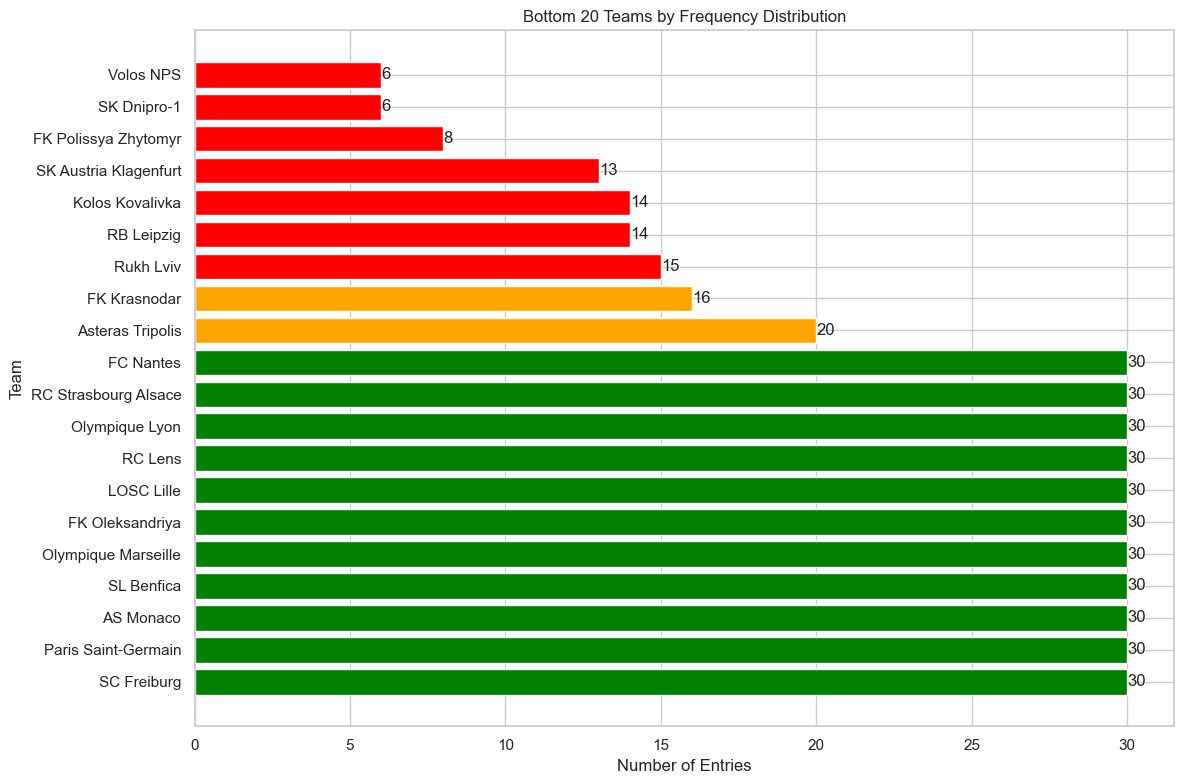

In [12]:
# Visualize the frequency distribution for the last 20 teams with the fewest entries
plt.figure(figsize=(12, 8))
last_teams = team_distribution.tail(20)

# Define the thresholds using quantiles
low_threshold = last_teams.quantile(0.33)  # Lower third
high_threshold = last_teams.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in last_teams.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the bar chart with the assigned colors using Matplotlib directly
bars = plt.barh(last_teams.index, last_teams.values, color=colors)

# Add the numbers on the side of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(bar.get_width()), 
             va='center', ha='left')

plt.title('Bottom 20 Teams by Frequency Distribution')
plt.xlabel('Number of Entries')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

+ There are **150** unique teams in the dataset, including well-known clubs like **Manchester City**, **Real Madrid**, **Bayern Munich**, and **Paris Saint-Germain**.

+ The **top** teams by **frequency** include:

    + **Manchester City**: **30** entries
    + **Akhmat Grozny**: **30** entries
    + **Spartak Moscow**: **30** entries
    + **CSKA Moscow**: **30** entries
    + **Dynamo Moscow**: **30** entries

+ Some teams with **fewer** entries include:

    + **Kolos Kovalivka**: **14** entries
    + **SK Austria Klagenfurt**: **13** entries
    + **FK Polissya Zhytomyr**: **8** entries
    + **SK Dnipro-1**: **6** entries
    + **Volos NPS**: **6** entries

### b. Check and Correct Data Type :

In [13]:
# Verify the data type of the "team" column
team_dtype = df['team'].dtype
print(f"The data type of the 'team' column is: {team_dtype}")

The data type of the 'team' column is: object


In [14]:
df['team'] = df['team'].astype('category')

+ The **`team`** column was converted from **`object`** to **`category`** to enhance **memory efficiency** and **improve processing speed**. This conversion is ideal for columns with repeated values, reducing memory usage and ensuring data consistency throughout the analysis.

### c. Handle Missing Values :

In [15]:
# Check for missing values in the 'team' column
missing_values_team = df['team'].isnull().sum()
print(f"Missing values in 'team' column: {missing_values_team}")

Missing values in 'team' column: 0


+ The **`team`** column currently has **no missing** values based on our previous analysis.

### d. Identify and Fix Outliers :

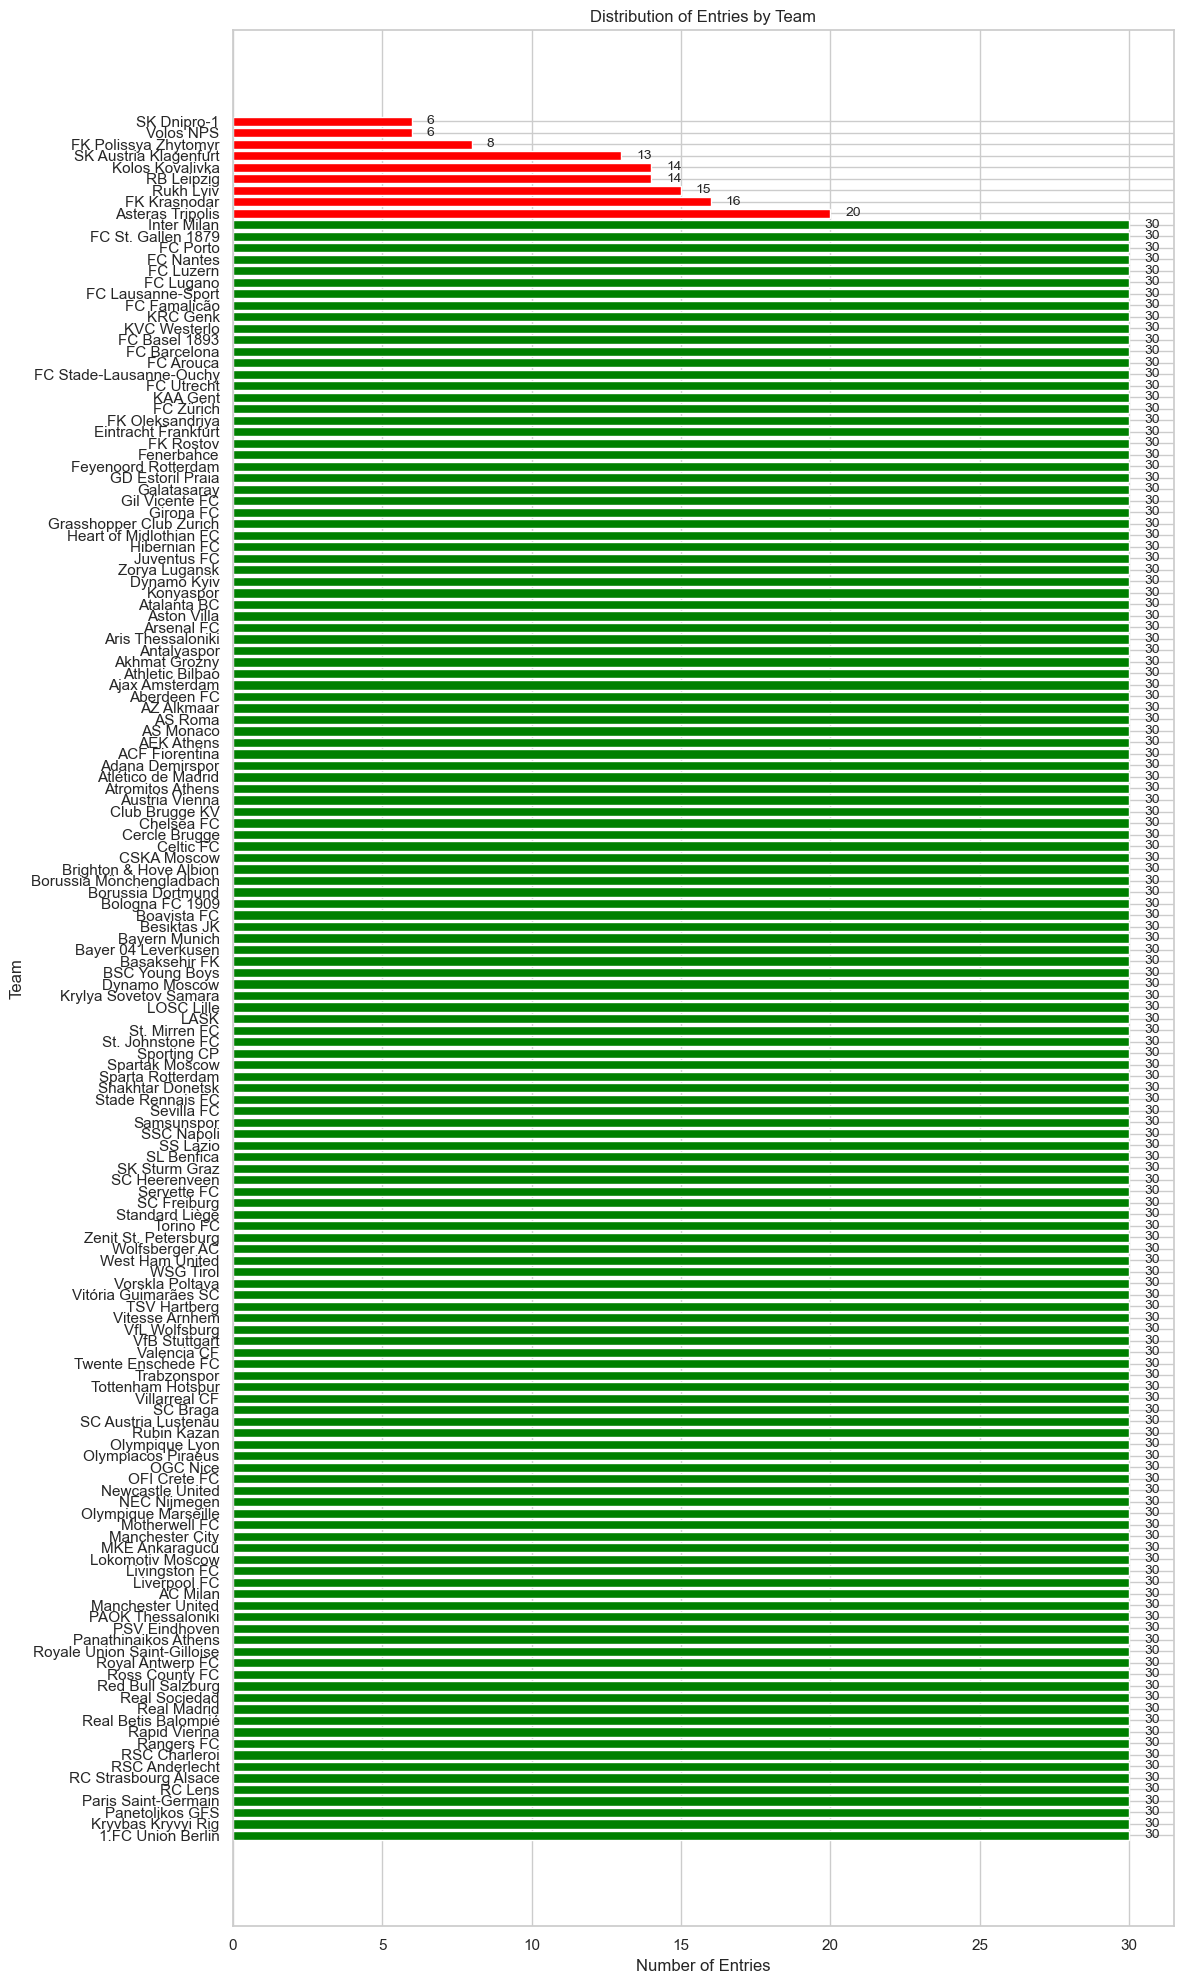

In [16]:
# Check the value counts for the 'team' column to identify any outliers or anomalies
team_value_counts = df['team'].value_counts()

# Define the thresholds using quantiles
low_threshold = team_value_counts.quantile(0.33)  # Lower third
high_threshold = team_value_counts.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in team_value_counts.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the horizontal bar chart with the assigned colors using Matplotlib directly
plt.figure(figsize=(12, 20))
bars = plt.barh(team_value_counts.index, team_value_counts.values, color=colors)

# Adjust the numbers on the side of each bar for better visibility
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width), 
             va='center', ha='left', fontsize=10)

plt.title('Distribution of Entries by Team')
plt.xlabel('Number of Entries')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

+ The number of entries **varied** across teams, with some teams having as few as **2** entries and others up to **30**. This variation could reflect differences in data availability or team prominence.
+ To ensure a comprehensive analysis, we decided to **keep** all teams in the dataset, including those with fewer entries, to maintain inclusivity in our analysis.

### e. Summary :

+ The dataset features **150** unique teams, including prominent clubs such as **Manchester City**, **Real Madrid**, **Bayern Munich**, and **Paris Saint-Germain**. 
+ The **`team`** column was converted from **`object`** to **`category`**.
+ There are **no missing** values in the team column.
+ We decided to **keep all teams** in the dataset, to maintain **inclusivity** in our analysis.

+ ### `competition` Column :

### a. Explore the column:

In [17]:
# Summary of the 'competition' column
competition_summary = df['competition'].describe()
print("=== Summary statistics for the 'competition' column ===\n")
print(competition_summary)
print("\n=======================================================")

=== Summary statistics for the 'competition' column ===

count           4342
unique             6
top       First Tier
freq            3260
Name: competition, dtype: object



In [18]:
# Frequency distribution of the 'competition' column
competition_distribution = df['competition'].value_counts()
competition_distribution

competition
First Tier     3260
Not First       552
Second Tier     417
Third Tier       90
Fourth Tier      20
Fifth Tier        3
Name: count, dtype: int64

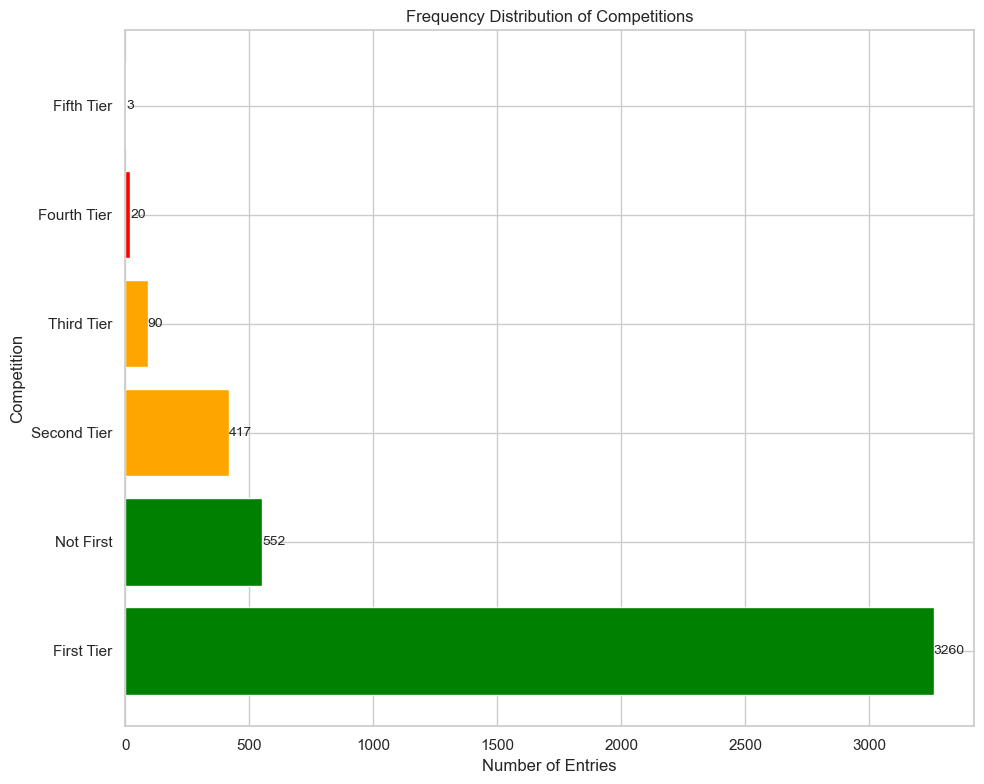

In [19]:
# Visualize the frequency distribution for the 'competition' column
plt.figure(figsize=(10, 8))

# Define the thresholds using quantiles
low_threshold = competition_distribution.quantile(0.33)  # Lower third
high_threshold = competition_distribution.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in competition_distribution.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the horizontal bar chart with the assigned colors using Matplotlib directly
bars = plt.barh(competition_distribution.index, competition_distribution.values, color=colors)

# Add the numbers on the side of each bar for better visibility
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width), 
             va='center', ha='left', fontsize=10)

plt.title('Frequency Distribution of Competitions')
plt.xlabel('Number of Entries')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()

+ The dataset includes **6** unique **competition** categories: **First Tier**, **Second Tier**, **Not First**, **Third Tier**, **Fourth Tier**, and **Fifth Tier**.
+ The **majority** of entries (**3,260**) belong to the **First Tier**, indicating top-division play.
+ The other categories are less represented, with **Not First** accounting for **552** entries and **Fifth Tier** being the least represented with only **3** entries.

In [20]:
percentage = (df[df['competition'] == 'Not First'].shape[0] / df.shape[0]) * 100

print(f"Number of 'Not First' in competition column : {df[df['competition'] == 'Not First'].shape[0]}")
print(f"Number of NANs in 'wins' columns : {df['wins'].isna().sum()}")
print(f"Number of NANs in 'ties' columns : {df['ties'].isna().sum()}")
print(f"Number of NANs in 'losses' columns : {df['losses'].isna().sum()}")
print(f"Number of NANs in 'goals_for' columns : {df['goals_for'].isna().sum()}")
print(f"Number of NANs in 'goals_against' columns : {df['goals_against'].isna().sum()}")
print(f"% in dataset: {percentage:.2f}%")

Number of 'Not First' in competition column : 552
Number of NANs in 'wins' columns : 552
Number of NANs in 'ties' columns : 552
Number of NANs in 'losses' columns : 552
Number of NANs in 'goals_for' columns : 552
Number of NANs in 'goals_against' columns : 552
% in dataset: 12.71%


In [21]:
df[df['competition'] == 'Not First'][["competition","wins","ties","losses","goals_for","goals_against"]]

,competition,wins,ties,losses,goals_for,goals_against
23,Not First,NaN,NaN,NaN,NaN,NaN
24,Not First,NaN,NaN,NaN,NaN,NaN
25,Not First,NaN,NaN,NaN,NaN,NaN
26,Not First,NaN,NaN,NaN,NaN,NaN
282,Not First,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4337,Not First,NaN,NaN,NaN,NaN,NaN
4338,Not First,NaN,NaN,NaN,NaN,NaN
4339,Not First,NaN,NaN,NaN,NaN,NaN
4340,Not First,NaN,NaN,NaN,NaN,NaN


+ **Situation Description :**
  
    + In the dataset, the competition column includes a category labeled "**Not First**" representing teams that did not play in the top division during the respective season. However, since the dataset also includes specific categories for the "**Second Tier**", "**Third Tier**", "**Fourth Tier**", and "**Fifth Tier**", the "**Not First**" label is **ambiguous** and does not clearly indicate which division these teams belong to. This raises the question of **where to appropriately categorize these** "**Not First**" **entries**.
      
    + Upon further **inspection**, it was found that all rows labeled as "**Not First**" have **missing values** in key performance-related columns: **`wins`**, **`ties`**, **`losses`**, **`goals_for`**, and **`goals_against`**.
      
    + Initially, an attempt was made to **fill** these **missing values** with **0** to indicate that **matches** were **not recorded**. However, this led to the creation of **large outliers** around **0**, which negatively impacted the analysis by **skewing** statistical summaries and introducing potential biases.
      
    + Additionally, filling these **missing values** with the **median** was considered but ultimately **rejected**. Using the **median** could introduce **misleading** data, reducing the **quality** and **credibility** of the analysis. Since the missing values are not random but rather indicate a lack of recorded matches, filling them with the median would inaccurately represent the teams' performance, compromising the integrity of the dataset.

+ **Decision :**

    + Given the **correlation** between the "**Not First**" label and the **missing performance** data, and the **negative impact** of filling these missing values with **0**, the best course of action is to **drop** all rows labeled as "**Not First**" from the dataset.

In [22]:
# Drop all rows where the 'competition' column is labeled as 'Not First'
df_cleaned = df[df['competition'] != 'Not First']

# Verify the shape of the cleaned dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4342, 20)
Cleaned dataset shape: (3790, 20)


+ Approximately **12.7%** (**552 entries**) of the dataset was **removed** due to the **ambiguous** "**Not First**" label and the associated missing data. This cleanup step was **necessary** to ensure the remaining dataset is of **higher quality** and **relevance**, with complete and accurate information for analysis.

In [23]:
# Summary of the 'competition' column after removing "Not First"
competition_summary = df_cleaned['competition'].describe()
print("=== Summary statistics for the 'competition' column ===\n")
print(competition_summary)
print("\n=======================================================")

=== Summary statistics for the 'competition' column ===

count           3790
unique             5
top       First Tier
freq            3260
Name: competition, dtype: object



In [24]:
competition_distribution = df_cleaned['competition'].value_counts()
competition_distribution

competition
First Tier     3260
Second Tier     417
Third Tier       90
Fourth Tier      20
Fifth Tier        3
Name: count, dtype: int64

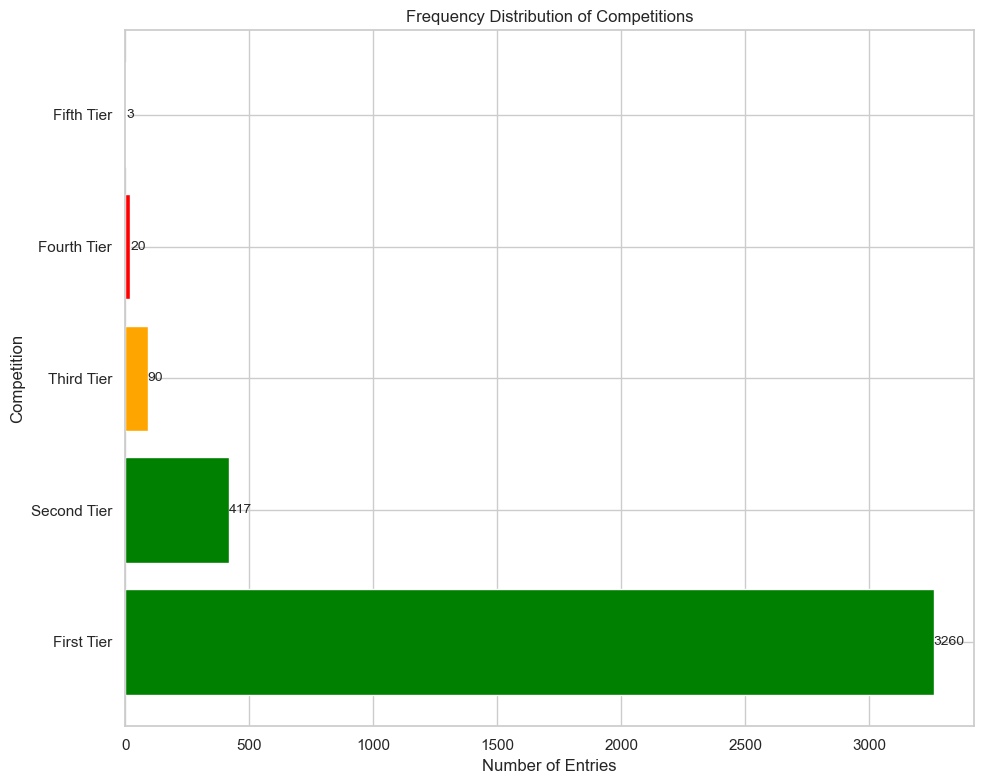

In [25]:
# Visualize the frequency distribution for the 'competition' column
plt.figure(figsize=(10, 8))

# Reverse the order of the competition distribution
competition_distribution = competition_distribution.sort_values(ascending=False)

# Define the thresholds using quantiles (after sorting)
low_threshold = competition_distribution.quantile(0.33)  # Lower third
high_threshold = competition_distribution.quantile(0.67) # Upper third

# Assign colors based on these thresholds after sorting
colors = []
for value in competition_distribution.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the horizontal bar chart with the assigned colors using Matplotlib directly
bars = plt.barh(competition_distribution.index, competition_distribution.values, color=colors)

# Add the numbers on the side of each bar for better visibility
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width), 
             va='center', ha='left', fontsize=10)

plt.title('Frequency Distribution of Competitions')
plt.xlabel('Number of Entries')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()

+ The dataset is **heavily** concentrated in the "**First Tier**" which accounts for **3,260** entries, making up the **majority** of the data.
+ The "**Second Tier**" follows with **417** entries, while the "**Third Tier**" has a significantly **smaller** representation with **90** entries.
+ The "**Fourth Tier**" and "**Fifth Tier**" categories are sparsely represented, with only **20** and **3** entries, respectively. 

### b. Check and Correct Data Type :

In [26]:
# Verify the data type of the "competition" column
competition_dtype = df_cleaned['competition'].dtype
print(f"The data type of the 'competition' column is: {competition_dtype}")

The data type of the 'competition' column is: object


In [27]:
df_cleaned.loc[:, 'competition'] = df_cleaned['competition'].astype('category')

+ The **`competition`** column was converted from **`object`** to **`category`** to enhance **memory efficiency** and **improve processing speed**. This conversion is ideal for columns with repeated values (**5 unique values**), reducing memory usage and ensuring data consistency throughout the analysis.

### c. Handle Missing Values :

In [28]:
# Check for missing values in the 'competition' column
missing_values_competition = df_cleaned['competition'].isnull().sum()
print(f"Missing values in 'competition' column: {missing_values_competition}")

Missing values in 'competition' column: 0


+ The **`competition`** column currently has **no missing** values based on our previous analysis.

### d. Identify and Fix Outliers :

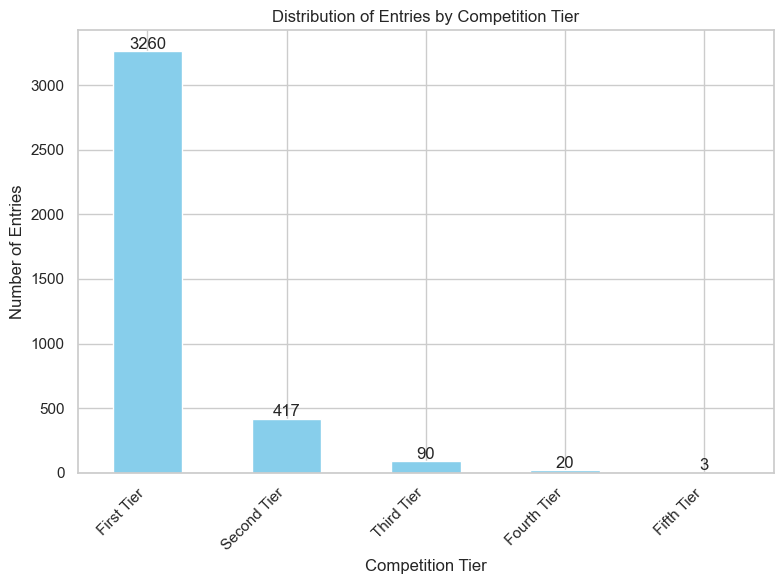

In [29]:
# Plot the value counts for the 'competition' column
plt.figure(figsize=(8, 6))
ax = competition_distribution.plot(kind='bar', color='skyblue')

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Entries by Competition Tier')
plt.xlabel('Competition Tier')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

+ The distribution revealed that the Fourth and Fifth Tiers had very few entries (20 and 3, respectively).

In [30]:
# Filter out the Fourth and Fifth Tiers from the data
filtered_data = df_cleaned[~df_cleaned['competition'].isin(['Fourth Tier', 'Fifth Tier'])]

# Check the new distribution in the 'competition' column after filtering
new_competition_value_counts = filtered_data['competition'].value_counts()
new_competition_value_counts

competition
First Tier     3260
Second Tier     417
Third Tier       90
Name: count, dtype: int64

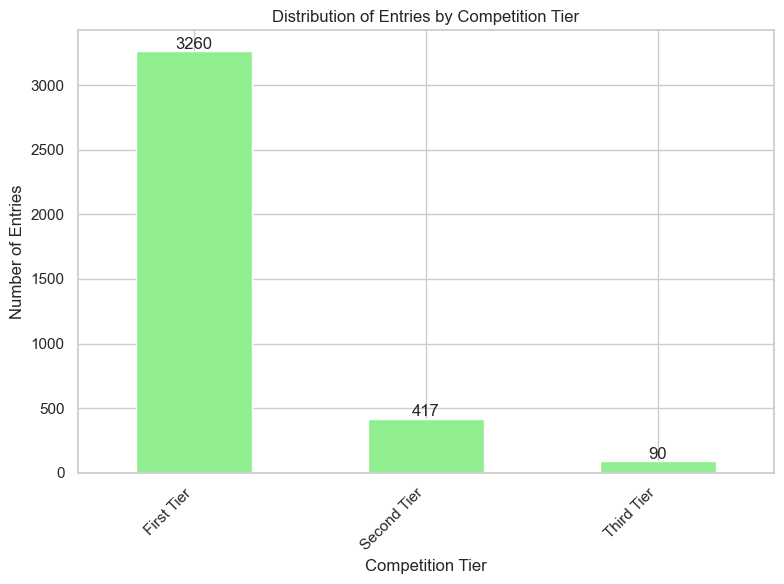

In [31]:
# Plot the value counts for the 'competition' column
plt.figure(figsize=(8, 6))
ax = new_competition_value_counts.plot(kind='bar', color='lightgreen')

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Entries by Competition Tier')
plt.xlabel('Competition Tier')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

+ Our project's focus on **financial and performance metrics across leagues**, we filtered out the **Fourth** and **Fifth** Tiers to ensure the data remains **consistent** and **comparable**. The remaining data now focuses on the **First**, **Second**, and **Third** Tiers, with **3,247**, **417**, and **90** entries respectively.

### e. Summary :

+ The dataset **originally** included an ambiguous "**Not First**" category in the competition column, which was **removed** due to **missing** key performance data, affecting **12.7%** of the entries.
+ The **cleaned** dataset is now dominated by "**First Tier**" entries (**3,260**), with fewer entries in lower tiers.
+ The **`competition`** column was converted from **`object`** to **`category`**.
+ **Outliers** : We filtered out the **Fourth** and **Fifth** Tiers to ensure the data remains **consistent** and **comparable**.

+ ### `position` Column :

### a. Explore the column:

In [32]:
# Summary of the 'position' column
position_summary = filtered_data['position'].describe()
print("=== Summary statistics for the 'position' column ===\n")
print(position_summary)
print("\n==================================================")

=== Summary statistics for the 'position' column ===

count     3767
unique      10
top        ≤10
freq      1278
Name: position, dtype: object



In [33]:
# Frequency distribution of the 'team' column
position_distribution = filtered_data['position'].value_counts()
position_distribution

position
≤10    1278
1       408
2       392
3       347
4       319
5       249
6       233
7       205
8       172
9       164
Name: count, dtype: int64

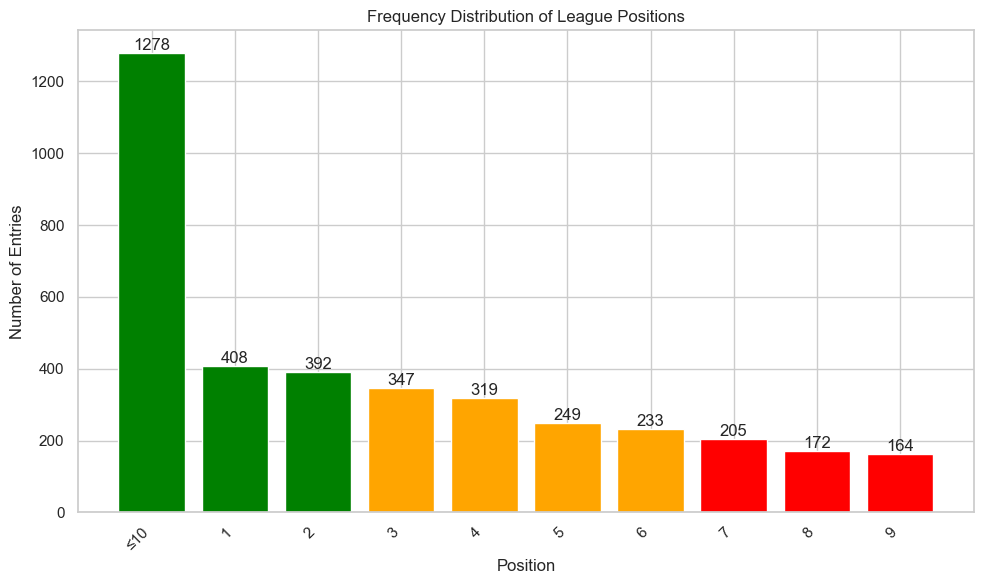

In [34]:
# Define the thresholds using quantiles
low_threshold = position_distribution.quantile(0.33)  # Lower third
high_threshold = position_distribution.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in position_distribution.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Visualize the frequency distribution for the 'position' column
plt.figure(figsize=(10, 6))
bars = plt.bar(position_distribution.index, position_distribution.values, color=colors)

# Add the numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.title('Frequency Distribution of League Positions')
plt.xlabel('Position')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

+ The most frequent value is '**≤10**', with **1,853** entries, indicating that many teams finished outside the top 9 or were not in the "**First Tier**".
+ Positions '**1**' to '**5**' are well-represented, with a **decreasing frequency** as the position number increases.
+ **Positions** '**6**' to '**9**' have **fewer** entries, reflecting **lower** league standings.

### b. Check and Correct Data Type :

In [35]:
# Verify the data type of the "position" column
position_dtype = filtered_data['position'].dtype
print(f"The data type of the 'position' column is: {position_dtype}")

The data type of the 'position' column is: object


+ **Situation Description** :
    + The **`position`** column in the dataset includes a **≤10** category, representing teams that finished **outside** the top **9** positions or were **not** in the "**First Tier**" This broad category raises the question of whether it should be split for more detailed analysis.

+ **Decision** :
  
    + The decision is to **leave** the **≤10** category **as is**, based on the following reasons:

        + **Simplicity** : The **≤10** category provides a **clear grouping** without adding unnecessary complexity.
        + **Consistency** : Keeping this category intact ensures **uniformity** across the dataset.
        + **Relevance** : The analysis focuses on **top-tier** teams, making detailed distinctions within **≤10** less critical.
        + **Practicality** : Splitting **≤10** may not add value and could overcomplicate the analysis.

In [36]:
filtered_data.loc[:, 'position'] = df_cleaned['position'].astype('category')

+ The **`position`** column was converted from **`object`** to **`category`** to enhance **memory efficiency** and **improve processing speed**. This conversion is ideal for columns with repeated values (**10 unique values**), reducing memory usage and ensuring data consistency throughout the analysis.

### c. Handle Missing Values :

In [37]:
# Check for missing values in the 'position' column
missing_values_position = filtered_data['position'].isnull().sum()
print(f"Missing values in 'position' column: {missing_values_position}")

Missing values in 'position' column: 0


+ The **`position`** column currently has **no missing** values based on our previous analysis.

### d. Identify and Fix Outliers :

+ We observed a significant **concentration** of entries in the **≤10** category, which groups all teams finishing in **10th** place or **lower**. This reflects the **natural** distribution of league standings, where more teams tend to finish in lower positions compared to the top ranks.

+ I decided to **retain** the **≤10** category in our analysis. This approach aligns with our project’s objective to comprehensively analyze financial efficiency and performance across all teams, not just the top performers. By including this broader range of data, we ensure that our insights cover the full spectrum of league positions, providing a more **inclusive** understanding of **how financial spending impacts team performance across different tiers and standings**.

### e. Summary :

+ The **`position`** column includes a **≤10** category (**1,853** entries), which groups teams finishing **outside** the top **9** or not in the "**First Tier**". Despite the broad nature of this category, it will be **left** as is for **simplicity**, **consistency**, **relevance**, and **practicality**.
+ The **`position`** column was converted from **`object`** to **`category`**.
+ The **`position`** column does **not contain** any **outliers**.

## 2. Numerical Columns 

## 2.1 Numerical Columns Columns (`int64`)

+ ### `season` Column :

### a. Explore the column:

In [38]:
# Summary statistics for the 'season' column
season_summary = filtered_data['season'].describe()
print("=== Summary statistics for the 'season' column ===\n")
print(season_summary)
print("\n===================================================")

=== Summary statistics for the 'season' column ===

count    3767.000000
mean       25.511548
std        31.407466
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        99.000000
Name: season, dtype: float64



C:\Users\info\AppData\Local\Temp\ipykernel_4168\3447403468.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=season_column, order=season_counts.index, palette=colors)


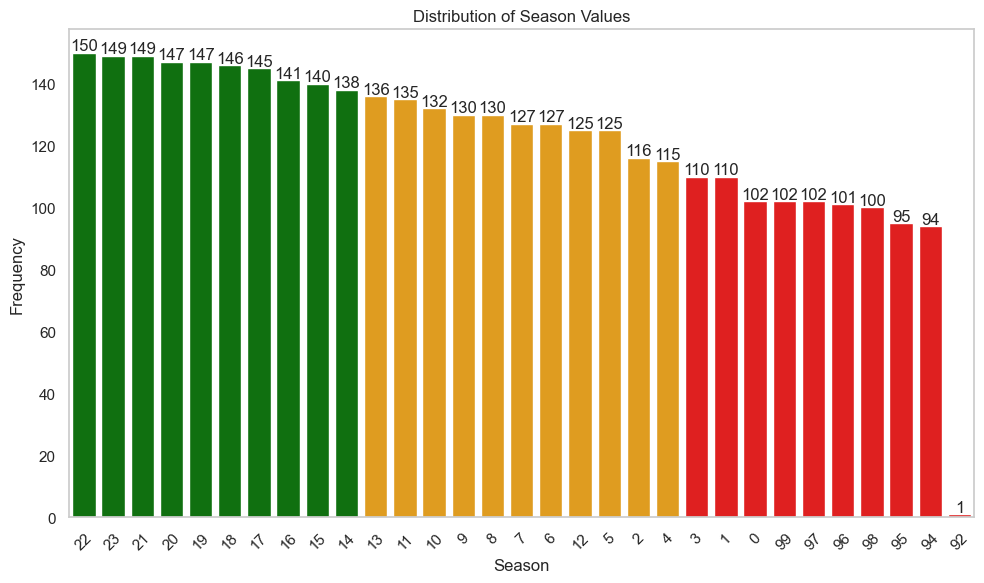

In [39]:
# Plot the distribution of the 'season' values
season_column = filtered_data["season"]
season_counts = season_column.value_counts()

# Define the thresholds using quantiles
low_threshold = season_counts.quantile(0.33)  # Lower third
high_threshold = season_counts.quantile(0.67) # Upper third

# Assign colors based on these thresholds
colors = []
for value in season_counts.values:
    if value >= high_threshold:
        colors.append('green')  # High frequency
    elif value <= low_threshold:
        colors.append('red')    # Low frequency
    else:
        colors.append('orange') # Medium frequency

# Plot the distribution with custom colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=season_column, order=season_counts.index, palette=colors)

# Add the numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Season Values')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

+ The most **recent seasons** (represented by values like 23, 22, 21, etc.) have the **highest frequencies**, indicating that our dataset includes more data from recent years. 
+ The recent seasons (from 18 to 23) have **similar frequencies**, each appearing around **150** times. 
+ **Older Seasons** with **Lower** Frequency.

### b. Check and Correct Data Type :

In [40]:
# Verify the data type of the "season" column
season_dtype = filtered_data['season'].dtype
print(f"The data type of the 'season' column is: {season_dtype}")

The data type of the 'season' column is: int64


+ The data type of the **`season`** column is **`int64`**, which is appropriate for representing numerical values. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [41]:
# Check for missing values in the 'season' column
missing_values_season = filtered_data['season'].isnull().sum()
print(f"Missing values in 'season' column: {missing_values_season}")

Missing values in 'season' column: 0


+ There are **no missing** values in this column, so the distribution reflects the complete data for the **`season`** column.

### d. Identify and Fix Outliers :

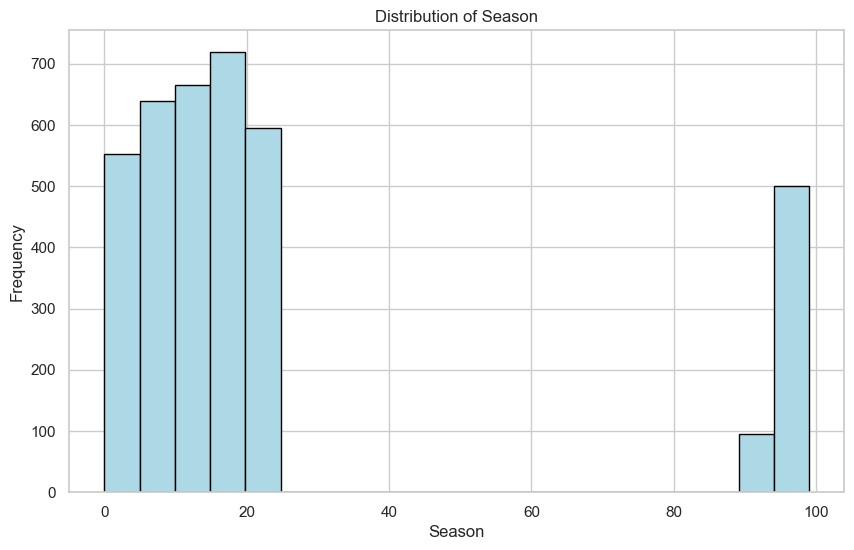

In [42]:
# Plot a histogram for the 'season' column
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['season'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

+ The initial dataset **included outliers**, such as values up to **99**, which fell **outside** the expected range.

In [43]:
# Filter out outliers from the 'season' column, keeping only values between 0 and 23
filtered_data = filtered_data[(filtered_data['season'] >= 0) & (filtered_data['season'] <= 23)]

+ We **filtered** the season column to retain only values between **00** and **23**, ensuring that the data accurately reflects the intended range.

In [44]:
# Check the new distribution of the 'season' column after filtering
new_season_description = filtered_data['season'].describe()
print("=== Summary statistics for the 'season' column after filtering ===\n")
print(new_season_description)
print("\n===================================================================")

=== Summary statistics for the 'season' column after filtering ===

count    3172.000000
mean       12.188209
std         6.839481
min         0.000000
25%         6.000000
50%        13.000000
75%        18.000000
max        23.000000
Name: season, dtype: float64



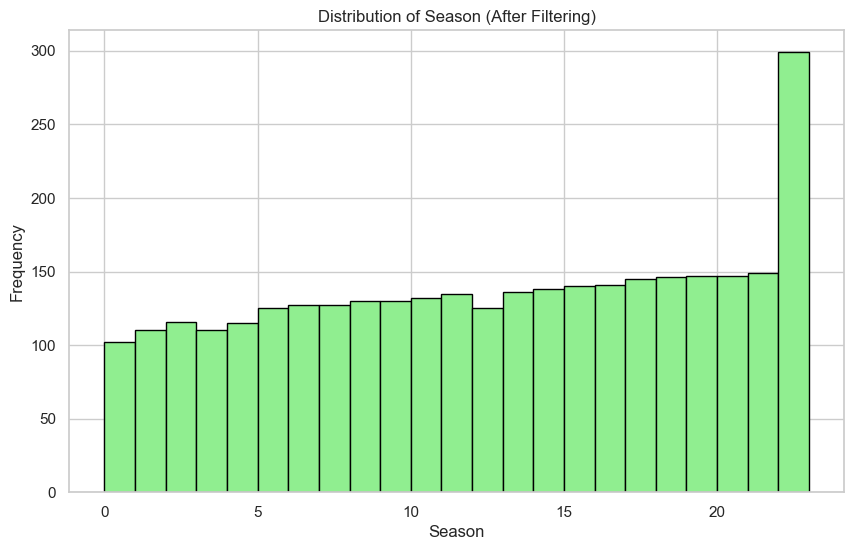

In [45]:
# Plot a histogram for the 'season' column after filtering outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['season'], bins=23, color='lightgreen', edgecolor='black')
plt.title('Distribution of Season (After Filtering)')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

+ The **distribution** appears fairly **uniform** across the **range** from **0** to **23**, with a slightly **increasing trend** as the season value increases.
+ The bar for **season 23** (representing the year 2023) is notably **higher** than the others. This could indicate that the most recent season has more data entries, which might be due to increased activity, better data availability, or simply that 2023 is the current or most recent season in our dataset.

### e. Summary :

+ The analysis of the **`season`** column in our dataset reveals a **higher frequency** of recent seasons, specifically the years represented by values like **23**, **22**, **21**... Seasons from **18** to **23** each appear approximately **150** times.
+ The **data type** for this column is **`int64`**, perfectly suitable for the numerical representation of years.
+ There are **no missing values** in this column, ensuring that the analysis reflects a complete dataset for the respective seasons.
+ We **filtered** the season column to retain only values between **00** and **23**.

+ ### `first_tier` Column :

### a. Explore the column:

In [46]:
# Summary statistics for the 'first_tier' column
first_tier_summary = filtered_data['first_tier'].describe()
print("=== Summary statistics for the 'first_tier' column ===\n")
print(first_tier_summary)
print("\n=================================================")

=== Summary statistics for the 'first_tier' column ===

count    3172.000000
mean        0.860025
std         0.347016
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: first_tier, dtype: float64



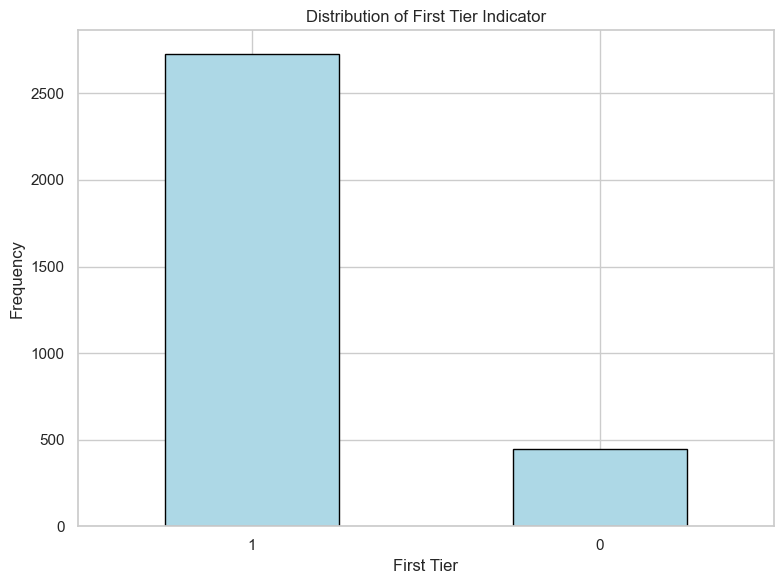

In [47]:
# Plot the distribution for the 'first_tier' column
plt.figure(figsize=(8, 6))
filtered_data['first_tier'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of First Tier Indicator')
plt.xlabel('First Tier')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

+ The **`first_tier`** column has **two distinct** values, likely indicating whether a team or entity belongs to the **First Tier** or **not**. These values are represented as **1** (for First Tier) and **0** (for non-First Tier).
+ The plot shows that the value **1** (First Tier) has a significantly **higher frequency**, with over **2728** occurrences. This suggests that the majority of the data in our dataset pertains to entities in the **First Tier**.

### b. Check and Correct Data Type :

In [48]:
# Verify the data type of the "first_tier" column
first_tier_dtype = filtered_data['first_tier'].dtype
print(f"The data type of the 'first_tier' column is: {first_tier_dtype}")

The data type of the 'first_tier' column is: int64


+ The **`first_tier`** column is currently stored as an integer (**`int64`**) in the dataset. This column represents **binary categorical** data.
+ **`first_tier`** represents **categorical** information rather than **continuous numerical** values, it is more appropriate to treat it as a **categorical** variable. Converting it to a **categorical** type ensures that it is handled correctly during analysis.

In [49]:
filtered_data['first_tier'] = filtered_data['first_tier'].astype('category')

In [50]:
# Verify the data type of the "first_tier" column
first_tier_dtype = filtered_data['first_tier'].dtype
print(f"The data type of the 'first_tier' column is: {first_tier_dtype}")

The data type of the 'first_tier' column is: category


+ The **`first_tier`** column has been **converted** to a **`categorical`** data type.

### c. Handle Missing Values :

In [51]:
# Check for missing values in the 'first_tier' column
missing_values_first_tier = filtered_data['first_tier'].isnull().sum()
print(f"Missing values in 'first_tier' column: {missing_values_first_tier}")

Missing values in 'first_tier' column: 0


+ There are **no missing** values in the **`first_tier`** column.

### d. Identify and Fix Outliers :

In [52]:
# Describe the 'first_tier' column to check for potential outliers or anomalies
first_tier_description = filtered_data['first_tier'].describe()
first_tier_description

count     3172
unique       2
top          1
freq      2728
Name: first_tier, dtype: int64

+ Since this column is **binary** and the distribution looks typical for such data (with no values outside the expected range of **0** or **1**), there don't appear to be any **outliers** or **anomalies** that need handling.

### e. Summary :

+ The **`first_tier`** column, originally stored as an **integer** (**`int64`**), has been **converted** to a **`categorical`** type to reflect its binary nature more accurately.
+ Analysis of the **distribution** reveals a predominant presence of **First Tier** teams, with over **3000** occurrences of the value **1**.
+ There are **no missing values**.
+ There are **no outlier values**.

## 2.2 Numerical Columns (`float64`)

+ ### `revenue` Column :

### a. Explore the column:

In [53]:
# Summary statistics for the 'revenue' column
revenue_summary = filtered_data['revenue'].describe()
print("=== Summary statistics for the 'revenue' column ===\n")
print(revenue_summary)
print("\n=================================================")

=== Summary statistics for the 'revenue' column ===

count    3172.000000
mean       15.823082
std        29.878338
min         0.000000
25%         0.193750
50%         3.550000
75%        18.200000
max       367.250000
Name: revenue, dtype: float64



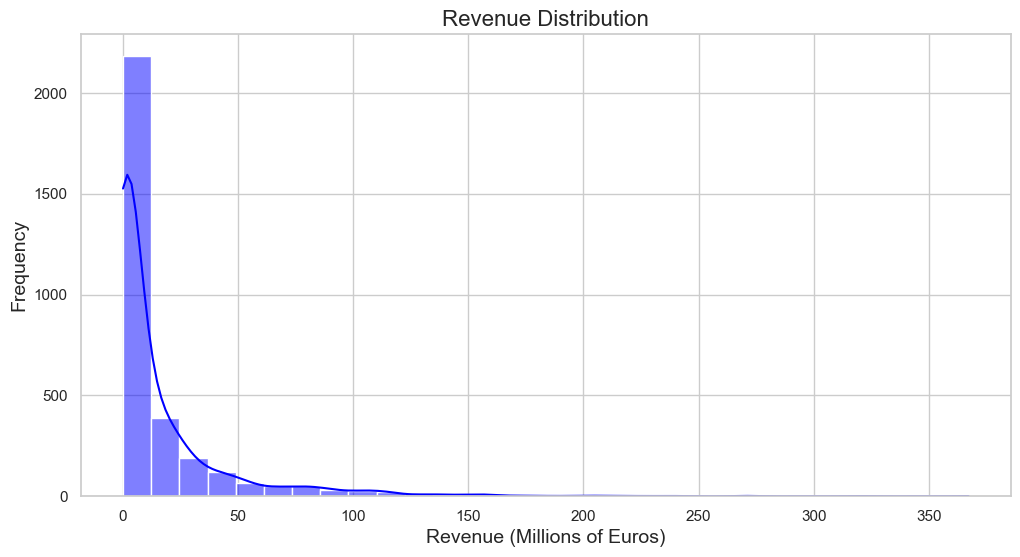

In [54]:
# Checking the distribution of the 'revenue' column

plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['revenue'], kde=True, color='blue', bins=30)
plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Revenue (Millions of Euros)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

+ The `revenue` data shows that most teams have modest earnings from player sales, with a few teams generating significantly higher revenue, which causes the **right skew**.
+ The high **standard deviation** highlights the variability in financial performance among teams, with only a minority reaching the higher revenue thresholds.
+ The **right-skewed** distribution is expected in this context, as **not** all teams participate **equally** in the **transfer market**.

### b. Check and Correct Data Type :

In [55]:
# Verify the data type of the "revenue" column
revenue_dtype = filtered_data['revenue'].dtype
print(f"The data type of the 'revenue' column is: {revenue_dtype}")

The data type of the 'revenue' column is: float64


+ The `revenue` column is currently stored as a `float64` datatype, which is typically appropriate for representing continuous numerical data like financial figures.

### c. Handle Missing Values :

In [56]:
# Check for missing values in the 'spent' column
missing_values_revenue = filtered_data['revenue'].isnull().sum()
print(f"Missing values in 'spent' column: {missing_values_revenue}")

Missing values in 'spent' column: 0


+ The `revenue` column currently has **no missing values** based on our previous analysis.

### d. Identify and Fix Outliers :

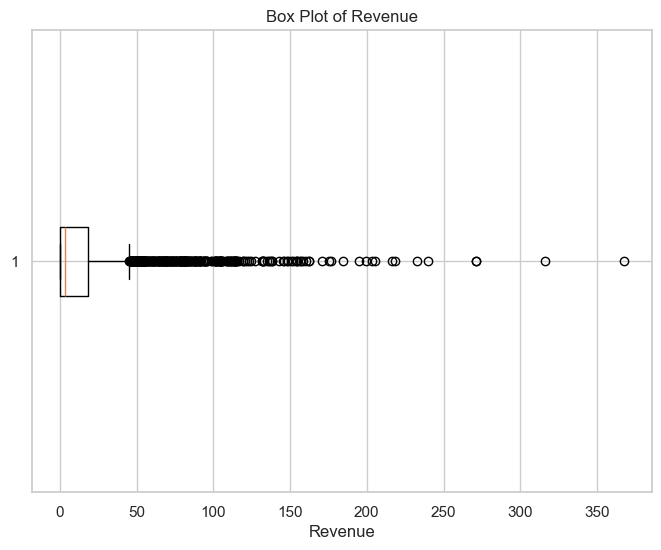

In [57]:
# Create a box plot for the 'revenue' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['revenue'], vert=False)
plt.title('Box Plot of Revenue')
plt.xlabel('Revenue')
plt.show()

+ **Problematic** :

    + The **`revenue`** column exhibited a highly **right-skewed** distribution, with most values **clustered** at the **lower end** and a few extremely high values acting as outliers.
      
    + This skewness posed a problem for the analysis because:
      
        + It could **distort** the **correlation** between financial spending and team performance.
        + It could **obscure trends** and **patterns**, particularly in statistical analyses that assume a normal distribution.
        + **Extreme outliers** could disproportionately influence the results, leading to misleading conclusions.
          

+ **Decision** :
  
    + I Chose **Log Transformation**:

        + The **log transformation** reduces **skewness**, making the distribution more normal-like, which is essential for many statistical techniques.
        + Unlike outlier removal, **log transformation retains** all data points, ensuring a comprehensive analysis.
        + **Log transformation** is often used in **financial** data to handle large ranges and reduce the impact of extreme values.

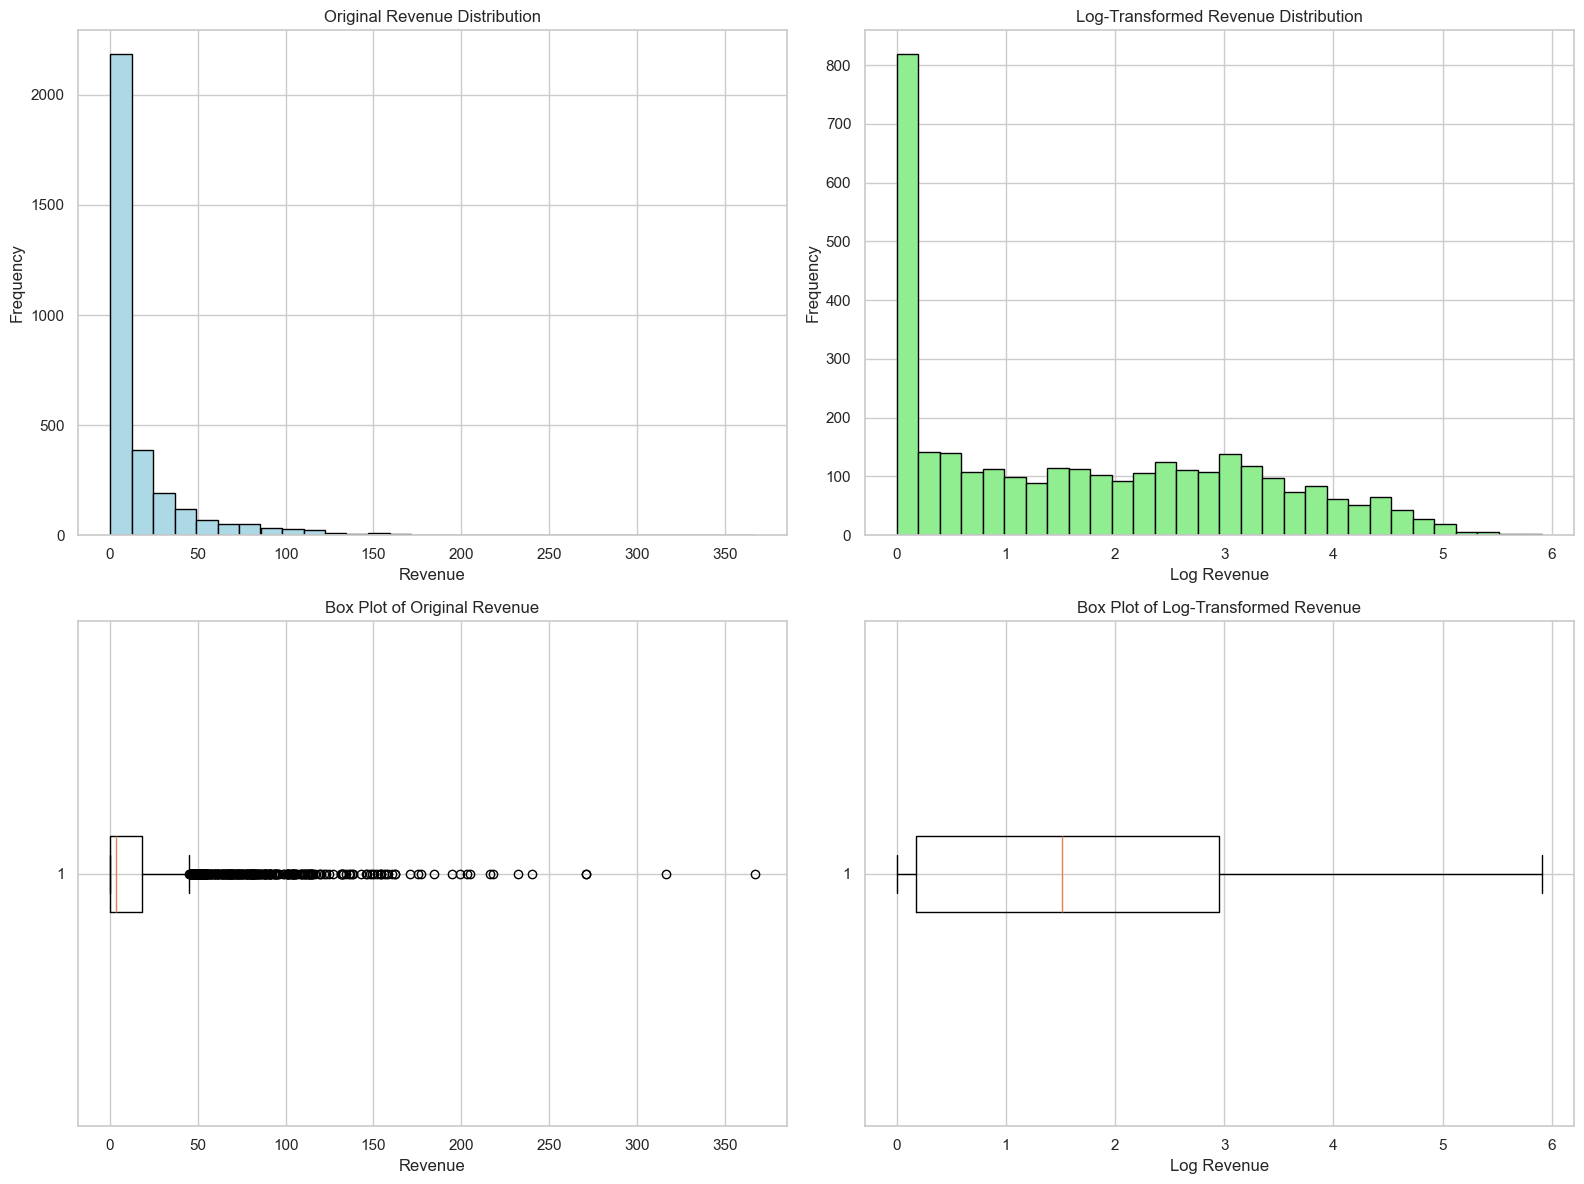

In [58]:
# Apply log transformation to the 'revenue' column, adding 1 to avoid log(0)
filtered_data['log_revenue'] = np.log1p(filtered_data['revenue'])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original revenue distribution (Histogram)
axes[0, 0].hist(filtered_data['revenue'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Revenue Distribution')
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed revenue distribution (Histogram)
axes[0, 1].hist(filtered_data['log_revenue'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Log-Transformed Revenue Distribution')
axes[0, 1].set_xlabel('Log Revenue')
axes[0, 1].set_ylabel('Frequency')

# Original revenue distribution (Boxplot)
axes[1, 0].boxplot(filtered_data['revenue'], vert=False)
axes[1, 0].set_title('Box Plot of Original Revenue')
axes[1, 0].set_xlabel('Revenue')

# Log-transformed revenue distribution (Boxplot)
axes[1, 1].boxplot(filtered_data['log_revenue'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed Revenue')
axes[1, 1].set_xlabel('Log Revenue')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

+ **Before** Transformation:

    + The **original `revenue`** data was **heavily skewed** to the right, with a **few extreme** values pulling the mean upwards.
    + **Extreme values** had a disproportionate influence, potentially skewing analysis results and obscuring underlying patterns.

+ **After** Transformation:

    + The **log transformation** resulted in a more **normalized** distribution, with values **spread** more evenly across the range.
    + The transformation **minimized** the influence of **outliers**, making the data more suitable for **correlation** and **trend** analysis.
    + The data is now more interpretable and ready for robust statistical analysis, particularly in understanding the relationship between revenue and performance metrics.

### e. Summary :

+ Most teams have **modest revenue** from player sales, with a few generating significantly higher amounts, leading to a **right-skewed** distribution and **high variability**.
+ **No conversion** is necessary for the `revenue` column; it should remain as `float64` to accurately represent the data.
+ There are **no missing** values in the `revenue` column, so no further handling is required.
+ I chose to apply **log transformation** to the **`revenue`** data for **handling outliers**.

+ ### `spent` Column :

### a. Explore the column:

In [59]:
# Summary statistics for the 'spent' column
spent_summary = filtered_data['spent'].describe()
print("=== Summary statistics for the 'spent' column ===\n")
print(spent_summary)
print("\n=================================================")

=== Summary statistics for the 'spent' column ===

count    3172.000000
mean       19.406403
std        38.371314
min         0.000000
25%         0.150000
50%         3.865000
75%        20.500000
max       611.490000
Name: spent, dtype: float64



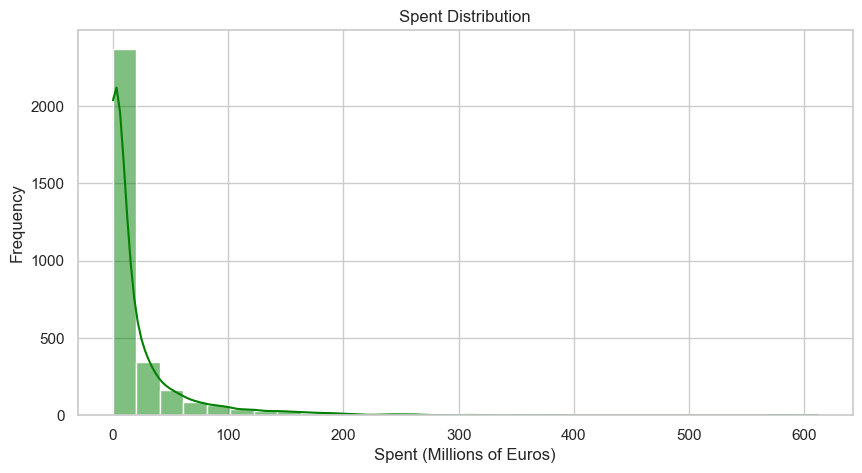

In [60]:
# Visualizing the distribution of the 'spent' column
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['spent'], kde=True, color='green', bins=30)
plt.title('Spent Distribution')
plt.xlabel('Spent (Millions of Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ On average, teams **`spent`** about **19.40** million euros on player acquisitions.
+ The high standard deviation indicates a significant **spread** in spending, with some teams spending much more than others.
+ Some teams **did not spend** any money on player acquisitions. (**Minimum** : **0** million euros)
+ The histogram shows a **right-skewed** distribution, similar to what we observed with the **`revenue`** column. Most teams have **low spending**, with a small number of teams spending significantly more.
+ The distribution indicates that the majority of teams operate with modest budgets, while a few have the financial power to invest heavily in player acquisitions.

### b. Check and Correct Data Type :

In [61]:
# Verify the data type of the "spent" column
spent_dtype = filtered_data['spent'].dtype
print(f"The data type of the 'spent' column is: {spent_dtype}")

The data type of the 'spent' column is: float64


+ The **`spent`** column is currently stored as **`float64`**, which is appropriate for representing financial data that includes decimal values.

### c. Handle Missing Values :

In [62]:
# Check for missing values in the 'spent' column
missing_values_spent = filtered_data['spent'].isnull().sum()
print(f"Missing values in 'spent' column: {missing_values_spent}")

Missing values in 'spent' column: 0


+ The **`spent`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

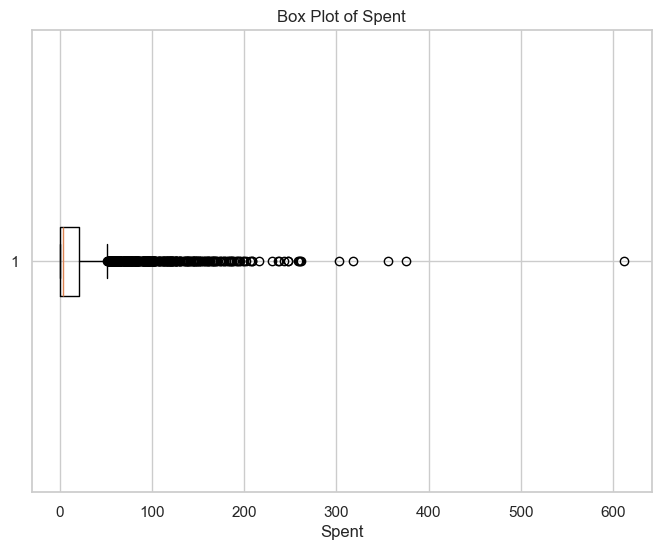

In [63]:
# Create a box plot for the 'spent' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['spent'], vert=False)
plt.title('Box Plot of Spent')
plt.xlabel('Spent')
plt.show()

+ **Problematic**:

    + The **`spent`** column exhibited a **right-skewed** distribution, with most values concentrated at the **lower end** and a **few extremely high** values acting as **outliers**.
      
    + This skewness presented challenges for analysis, as:
      
         + It could **distort correlations** between financial spending and team performance.
         + It could **obscure trends** and **patterns**, particularly in analyses that assume a normal distribution.
         + **Extreme outliers** could disproportionately influence the results, leading to biased conclusions.
      

+ **Decision** :
  
    + I Chose **Log Transformation**:

        + **Log transformation** was chosen to **reduce** the **skewness** and bring the distribution **closer to normal**. This makes the data more suitable for various statistical analyses.
        + Unlike outlier removal, **log transformation retains** all data points, ensuring that no information is lost.
        + **Log transformation** is commonly used in financial data to manage large ranges and reduce the impact of extreme values, making it ideal for this column.

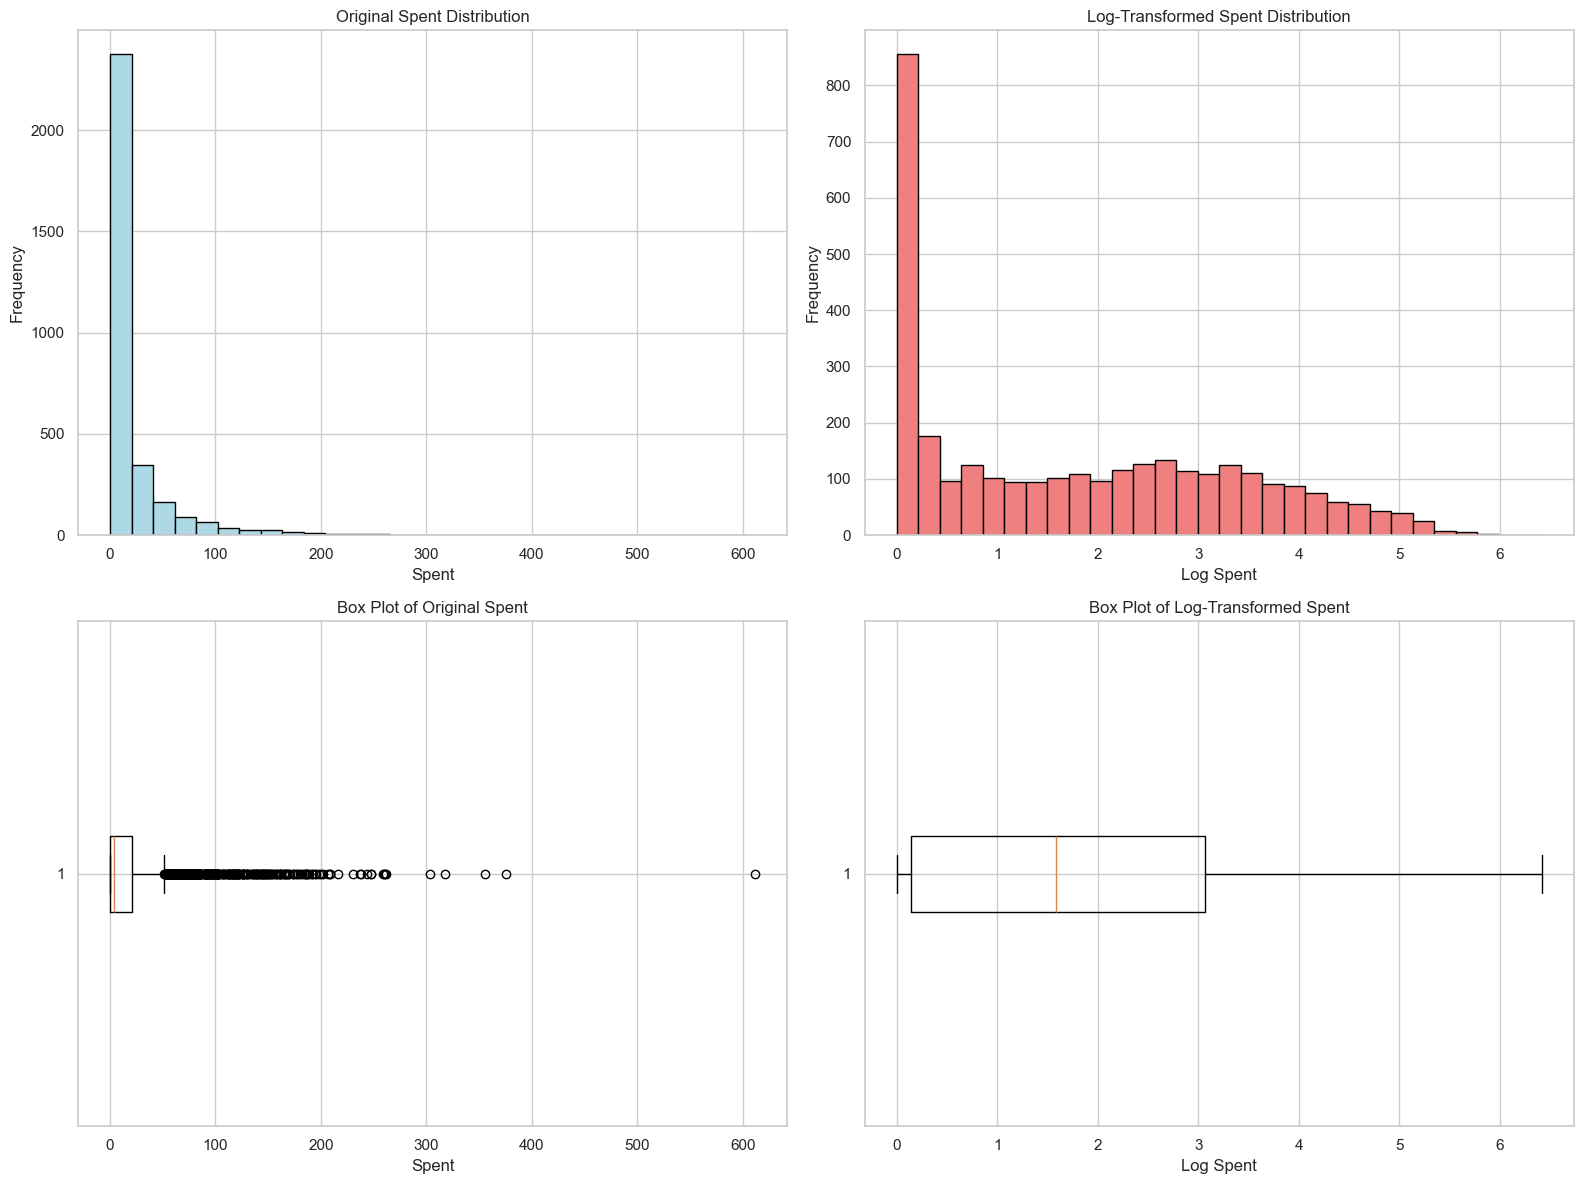

In [64]:
# Apply log transformation to the 'spent' column, adding a small constant to avoid log(0)
filtered_data['log_spent'] = np.log1p(filtered_data['spent'])
# Plot side-by-side comparison of the original and log-transformed spent (histograms and box plots)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original spent distribution (Histogram)
axes[0, 0].hist(filtered_data['spent'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Spent Distribution')
axes[0, 0].set_xlabel('Spent')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed spent distribution (Histogram)
axes[0, 1].hist(filtered_data['log_spent'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log-Transformed Spent Distribution')
axes[0, 1].set_xlabel('Log Spent')
axes[0, 1].set_ylabel('Frequency')

# Original spent distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['spent'], vert=False)
axes[1, 0].set_title('Box Plot of Original Spent')
axes[1, 0].set_xlabel('Spent')

# Log-transformed spent distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_spent'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed Spent')
axes[1, 1].set_xlabel('Log Spent')

plt.tight_layout()
plt.show()

+ **Histograms** :
  
    + **Before Log Transformation**:

        + The **original histogram** shows a heavily **right-skewed** distribution, with the majority of values **clustered** near the lower end (**close to 0**) and a long tail extending towards higher spending amounts.
        + A **small number** of teams have extremely high spending values (up to **611.49**), which dominate the distribution and can distort any analysis related to averages or correlations.
  
    + **After Log Transformation**:
      
        + The **log-transformed** histogram shows a distribution that is more evenly **spread out**, though still somewhat right-skewed. The transformation **compresses the range** of spending values, bringing them closer together and making the distribution more normal-like.
        + The transformed data provides a more **balanced** view, where differences in spending are easier to analyze without being overshadowed by extreme values.

+ **Box-plots** :
 
    + **Before Log Transformation**:

        + The box plot reveals **numerous outliers**, represented as points far from the main cluster of data. These outliers indicate that there are teams with spending amounts much higher than the rest, which could disproportionately affect the results of any statistical analysis or modeling.
  
    + **After Log Transformation**:
      
        + The box plot for the **log-transformed** data shows a significant reduction in the influence of outliers. The **spread** is more consistent, and the extreme values that were once outliers are now within a more **reasonable range**, making the data more robust for analysis.

### e. Summary :

+ The **`spent`** column, like the **`revenue`** column, is characterized by a **right-skewed** distribution, with most teams spending **modestly** and a few outliers representing teams with significantly higher expenditures.
+ The high **standard deviation** reflects the **variability** in spending among teams.
+ The **`spent`** column is stored as **`float64`**, which is suitable for financial data with decimal values.
+ There are **no missing** values in the **`spent`** column, so no imputation or special handling is needed.
+ I chose to apply **log transformation** to the **`revenue`** data for **handling outliers**.

+ ### `wins` Column :

### a. Explore the column:

In [65]:
# Summary statistics for the 'wins' column
wins_summary = filtered_data['wins'].describe()
print("=== Summary statistics for the 'wins' column ===\n")
print(wins_summary)
print("\n=================================================")

=== Summary statistics for the 'wins' column ===

count    3172.000000
mean       15.851198
std         5.697620
min         2.000000
25%        11.000000
50%        15.000000
75%        20.000000
max        34.000000
Name: wins, dtype: float64



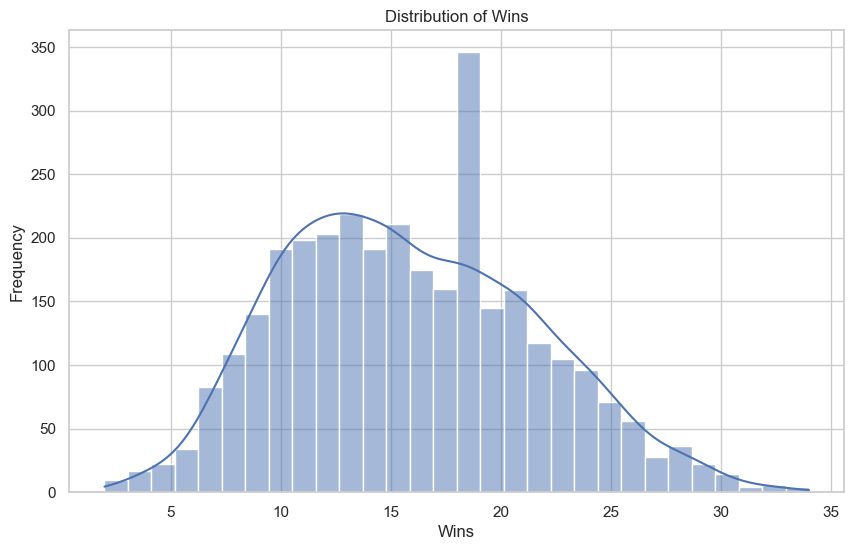

In [66]:
# Plotting the distribution of the 'wins' column
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['wins'].dropna(), bins=30, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ On **average**, teams **won** about **15** matches per season.
+ The **wins** vary significantly across teams and seasons, with a standard deviation of about **5.69**- wins.
+ The team with the **fewest wins** in a season recorded only **2** wins, indicating a very **poor** performance.
+ The distribution is **right-skewed**, meaning most teams tend to win a **moderate** number of matches (**between 10 and 20**), while fewer teams win an exceptionally high number of matches.
+ The **peak** between **10** and **20** wins suggests that this **range** is typical for most teams across seasons.

### b. Check and Correct Data Type :

In [67]:
# Verify the data type of the "wins" column
wins_dtype = filtered_data['wins'].dtype
print(f"The data type of the 'wins' column is: {wins_dtype}")

The data type of the 'wins' column is: float64


+ The **`wins`** column contains **integer** values, representing counts (the number of wins). Ensuring it is stored as **`int64`** guarantees that it is processed correctly as whole numbers.

In [68]:
# Convert the 'wins' column to integer type
filtered_data['wins'] = filtered_data['wins'].astype('int64')

In [69]:
# Verify the data type of the "wins" column
wins_dtype = filtered_data['wins'].dtype
print(f"The data type of the 'wins' column is: {wins_dtype}")

The data type of the 'wins' column is: int64


### c. Handle Missing Values :

In [70]:
# Check for missing values in the 'wins' column
missing_values_wins = filtered_data['wins'].isnull().sum()
print(f"Missing values in 'wins' column: {missing_values_wins}")

Missing values in 'wins' column: 0


+ The **`wins`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

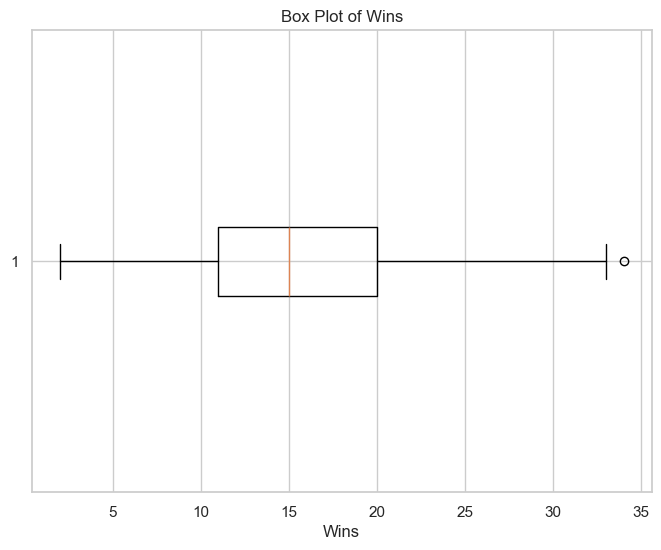

In [71]:
# Create a box plot for the 'wins' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['wins'], vert=False)
plt.title('Box Plot of Wins')
plt.xlabel('Wins')
plt.show()

In [72]:
df[df['wins'] == 34]

,league,team,season,revenue,spent,competition,position,wins,ties,losses,league_spent,relative,net,goals_for,goals_against,5_season_agg,5_season_net,5_season_league_agg,5_season_relative,first_tier
3525,Scotland,Celtic FC,17,3.5,9.4,First Tier,1,34.0,4.0,0.0,11.62,0.80895,-5.9,106.0,25.0,47.64,23.56,51.22,0.930105,1


+ For the **`wins`** column, the most appropriate action is to **retain** the original data without applying **any transformations**. The **outliers**  are **minimal** and within the expected **range** for a sports season.

### e. Summary :

+ The distribution of wins is **right-skewed**, with most teams winning **between 10** and **20** matches.
+ **Converting** **`wins`** to integer (**`int64`**) ensures accurate processing as whole numbers.
+ There are **no missing** values in the **`wins`** column, so no imputation or special handling is needed.
+ There are **no outlier** values.

+ ### `ties` Column :

### a. Explore the column:

In [73]:
# Summary statistics for the 'ties' column
ties_summary = filtered_data['ties'].describe()
print("=== Summary statistics for the 'ties' column ===\n")
print(ties_summary)
print("\n=================================================")

=== Summary statistics for the 'ties' column ===

count    3172.000000
mean        8.463430
std         3.067554
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        26.000000
Name: ties, dtype: float64



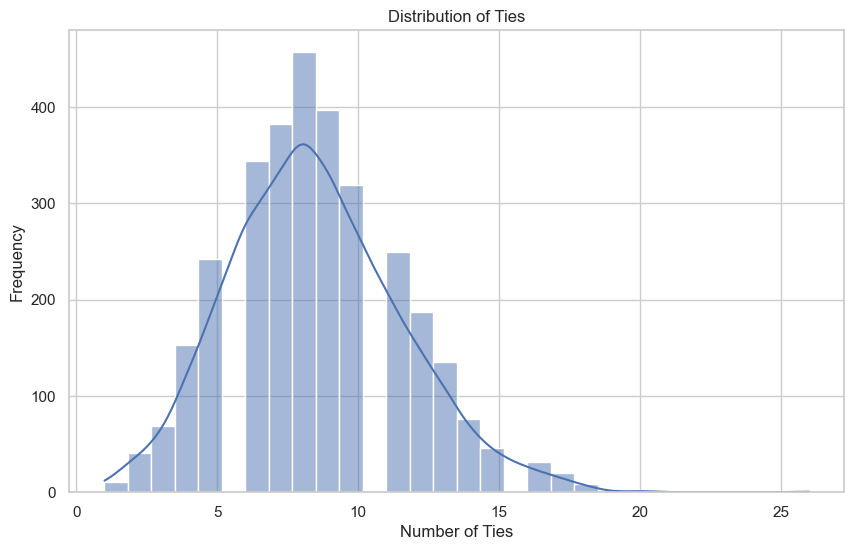

In [74]:
# Plotting the distribution of the 'ties' column
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['ties'], bins=30, kde=True)
plt.title('Distribution of Ties')
plt.xlabel('Number of Ties')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **average** of **8.46** ties per season suggests that teams typically have a **moderate** number of draws, with variability as indicated by the standard deviation.
+ The peak is  **between 8** and **10** ties.

### b. Check and Correct Data Type :

In [75]:
# Verify the data type of the "ties" column
ties_dtype = filtered_data['ties'].dtype
print(f"The data type of the 'ties' column is: {ties_dtype}")

The data type of the 'ties' column is: float64


+ The **`ties`** column contains **integer** values, representing counts. Ensuring it is stored as **`int64`** guarantees that it is processed correctly as whole numbers.

In [76]:
# Convert the 'ties' column to integer type
filtered_data['ties'] = filtered_data['ties'].astype('int64')

In [77]:
# Verify the data type of the "ties" column
ties_dtype = filtered_data['ties'].dtype
print(f"The data type of the 'ties' column is: {ties_dtype}")

The data type of the 'ties' column is: int64


### c. Handle Missing Values :

In [78]:
# Check for missing values in the 'ties' column
missing_values_ties = filtered_data['ties'].isnull().sum()
print(f"Missing values in 'ties' column: {missing_values_ties}")

Missing values in 'ties' column: 0


+ The **`ties`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

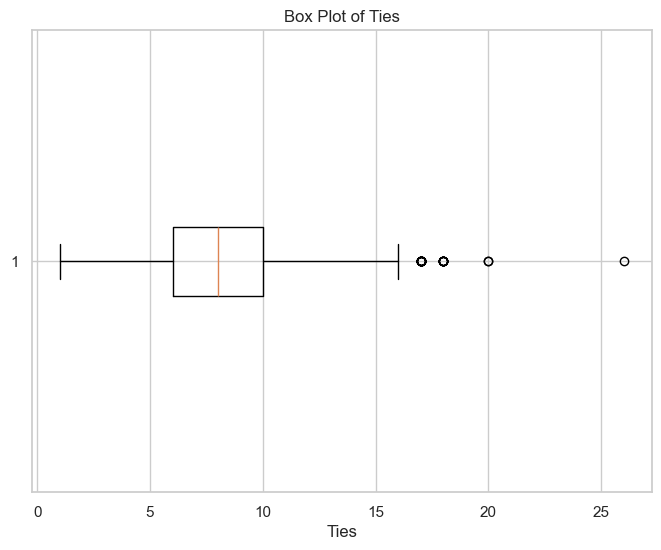

In [79]:
# Create a box plot for the 'ties' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['ties'], vert=False)
plt.title('Box Plot of Ties')
plt.xlabel('Ties')
plt.show()

+ The **outliers** are **minimal** and within a logical range, the best approach is to **leave** the data as is, similar to the **`ties`** column. This approach will preserve the natural **variability** in the data without the need for transformations.

### e. Summary :

+ The distribution shows **one peak** **between 8** and **10** ties.
+ The data type of the **`ties`** column was converted  to **`int64`**.
+ There are **no missing** values in the **`ties`** column, so no imputation or special handling is needed.
+ There are **no outlier** values.

+ ### `losses` Column :

### a. Explore the column:

In [80]:
# Summary statistics for the 'losses' column
losses_summary = filtered_data['losses'].describe()
print("=== Summary statistics for the 'losses' column ===\n")
print(losses_summary)
print("\n=================================================")

=== Summary statistics for the 'losses' column ===

count    3172.000000
mean       10.047289
std         4.745989
min         0.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        28.000000
Name: losses, dtype: float64



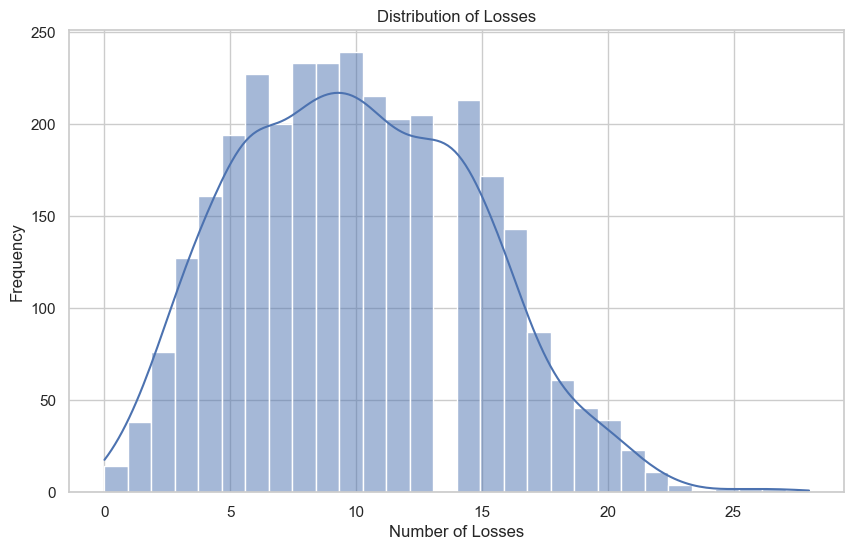

In [81]:
# Plotting the distribution of the 'losses' column
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['losses'], bins=30, kde=True)
plt.title('Distribution of Losses')
plt.xlabel('Number of Losses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **average** of **10.04** losses suggests that most teams experience a **moderate** number of defeats per season, though some variability is expected as indicated by the standard deviation.
+ Most teams tend to **lose between 5** and **15** matches in a season, a smaller number of teams experience either very few or very many losses. The slight **skew** toward higher losses suggests that while it's less common, there are teams that struggle significantly in certain seasons, leading to a higher number of defeats.

### b. Check and Correct Data Type :

In [82]:
# Verify the data type of the "losses" column
losses_dtype = filtered_data['losses'].dtype
print(f"The data type of the 'losses' column is: {losses_dtype}")

The data type of the 'losses' column is: float64


+ The **`losses`** column contains **integer** values, representing counts. Ensuring it is stored as **`int64`** guarantees that it is processed correctly as whole numbers.

In [83]:
# Convert the 'losses' column to integer type
filtered_data['losses'] = filtered_data['losses'].astype('int64')

In [84]:
# Verify the data type of the "losses" column
losses_dtype = filtered_data['losses'].dtype
print(f"The data type of the 'losses' column is: {losses_dtype}")

The data type of the 'losses' column is: int64


### c. Handle Missing Values :

In [85]:
# Check for missing values in the 'losses' column
missing_values_losses = filtered_data['losses'].isnull().sum()
print(f"Missing values in 'losses' column: {missing_values_losses}")

Missing values in 'losses' column: 0


+ The **`losses`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

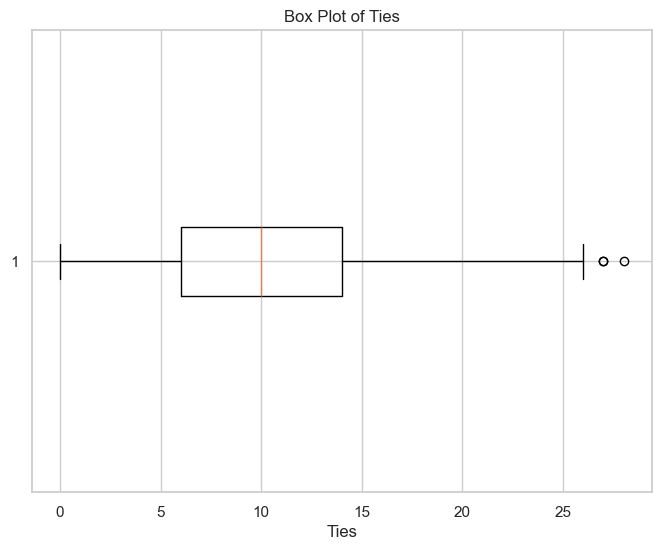

In [86]:
# Create a box plot for the 'ties' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['losses'], vert=False)
plt.title('Box Plot of Ties')
plt.xlabel('Ties')
plt.show()

+ The best approach is to **leave** the data as is, similar to the **`wins`** and **`ties`** columns. This approach will preserve the natural **variability** in the data without the need for transformations.

### e. Summary :

+ Most teams tend to **lose between 5** and **15** matches per season.
+ The **`losses`** column was converted  to **`int64`**.
+ There are **no missing** values in the **`losses`** column, so no imputation or special handling is needed.
+ There are **no outlier** values.

+ ### `league_spent` Column :

### a. Explore the column:

In [87]:
# Summary statistics for the 'losses' column
league_spent_summary = filtered_data['league_spent'].describe()
print("=== Summary statistics for the 'league_spent' column ===\n")
print(league_spent_summary)
print("\n========================================================")

=== Summary statistics for the 'league_spent' column ===

count    3172.000000
mean      250.165728
std       388.150086
min         1.730000
25%        26.880000
50%        95.140000
75%       317.330000
max      3100.000000
Name: league_spent, dtype: float64



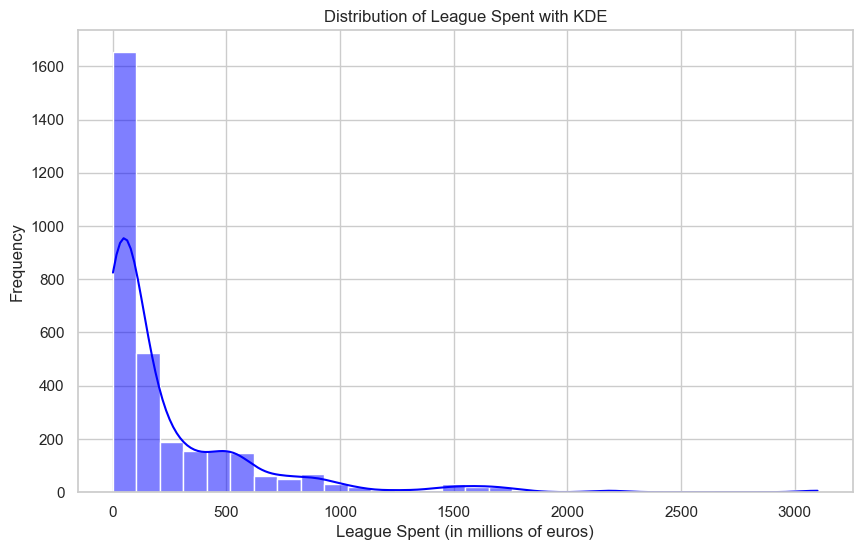

In [88]:
# Plotting the histogram of the "league_spent" column
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['league_spent'], bins=30, kde=True, color='blue')
plt.title('Distribution of League Spent with KDE')
plt.xlabel('League Spent (in millions of euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The data indicates a **wide range** of **spending** among the leagues, with a significant spread from the minimum to the maximum values. The high standard deviation and the difference between the quartiles suggest that there are likely **some leagues** with **very high spending**.
+ The plot indicates that most of the league spending is **concentrated** at the **lower** end of the scale, with a long tail extending towards higher spending amounts. This suggests that while most leagues have relatively **modest spending**, there are a few that spend significantly more, which skews the distribution.

### b. Check and Correct Data Type :

In [89]:
# Verify the data type of the "league_spent" column
league_spent_dtype = filtered_data['league_spent'].dtype
print(f"The data type of the 'league_spent' column is: {league_spent_dtype}")

The data type of the 'league_spent' column is: float64


+ The datatype of the **`league_spent`** column is **`float64`**, which is appropriate for representing numerical data, especially monetary values. There is **no need to convert** it.

### c. Handle Missing Values :

In [90]:
# Check for missing values in the 'league_spent' column
missing_values_league_spent = filtered_data['league_spent'].isnull().sum()
print(f"Missing values in 'league_spent' column: {missing_values_league_spent}")

Missing values in 'league_spent' column: 0


+ There are **no missing values** in the **`league_spent`** column, so no handling is necessary for this column.

### d. Identify and Fix Outliers :

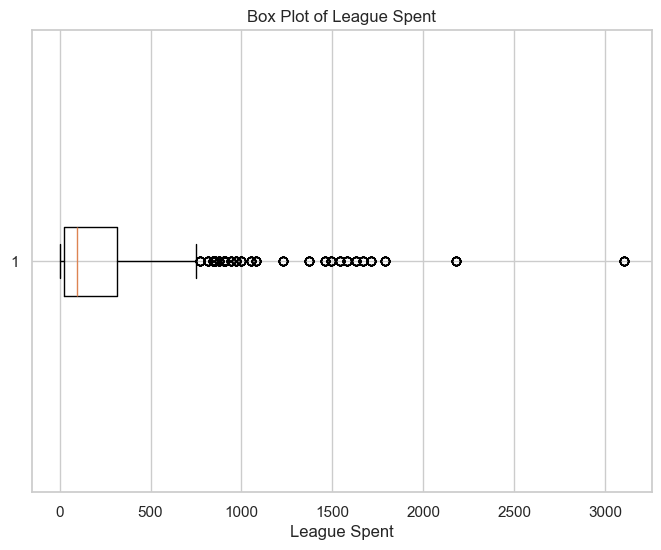

In [91]:
# Create a box plot for the 'league_spent' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['league_spent'], vert=False)
plt.title('Box Plot of League Spent')
plt.xlabel('League Spent')
plt.show()

+ There are several **extreme outliers**, particularly beyond **1,000**, indicating that some leagues have significantly higher spending compared to others.
+ **log transformation** could be a good approach to **normalize** the distribution and **reduce** the impact of these **outliers**. This approach would be consistent with the transformations applied to other financial columns like revenue and spent.

+ **Problematic** :

    + The **`league_spent`** column exhibited a heavily **right-skewed** distribution, with most values concentrated at the **lower end** and a few extremely high values acting as significant outliers.
      
    + This **skewness** posed challenges for analysis, as:
      
        + It could **distort** comparisons between **leagues**, especially when analyzing the relationship between **spending** and **team performance**.
        + The **extreme outliers** could disproportionately influence the analysis, leading to potential misinterpretations of financial efficiency across leagues.
   

+ **Decision** :
   
     + I Chose **Log Transformation**:

        + The **log transformation** was chosen to **reduce skewness** and bring the distribution closer to **normal**. This makes the data more suitable for various statistical analyses and comparisons.
        + **Log transformation reduces** the impact of **extreme** values, allowing for a more balanced analysis of spending across different leagues.
        + Unlike removing outliers, log transformation **retains** all data points, ensuring that no information is lost.

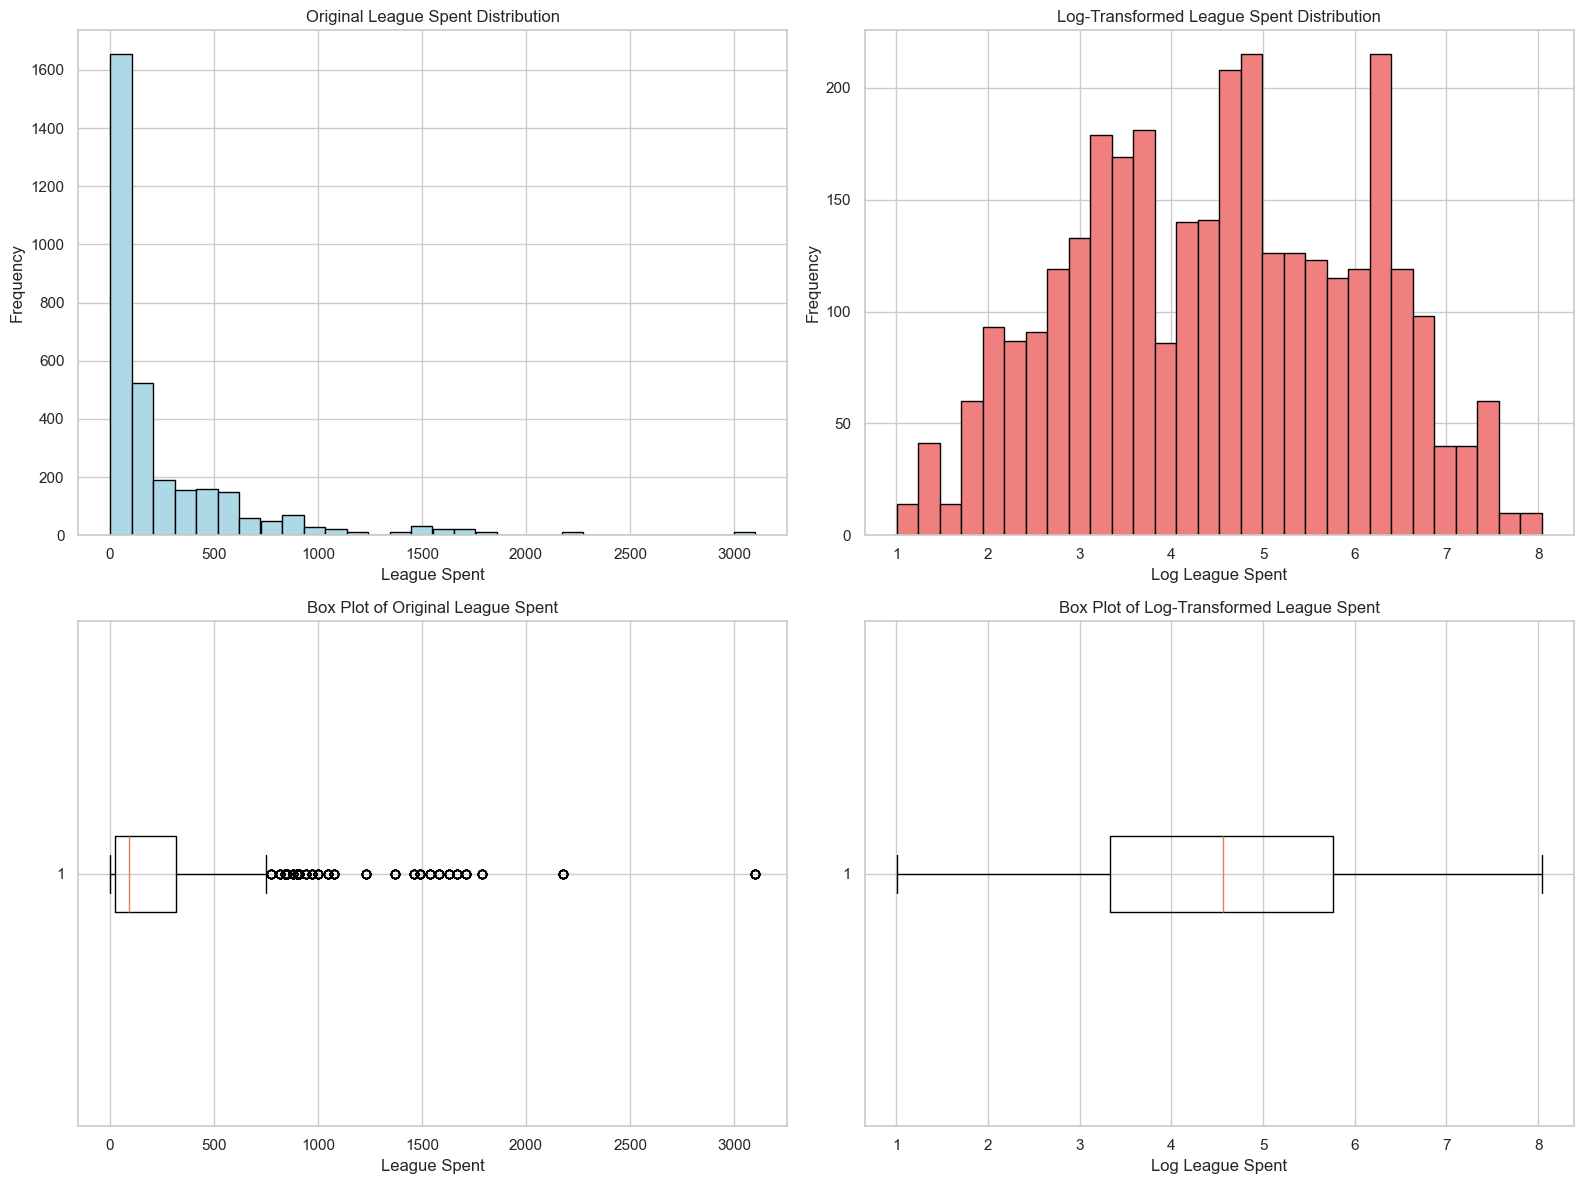

In [92]:
# Apply log transformation to the 'league_spent' column, adding 1 to avoid log(0)
filtered_data['log_league_spent'] = np.log1p(filtered_data['league_spent'])

# Plot side-by-side comparison of the original and log-transformed league_spent (histograms and box plots)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original league_spent distribution (Histogram)
axes[0, 0].hist(filtered_data['league_spent'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original League Spent Distribution')
axes[0, 0].set_xlabel('League Spent')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed league_spent distribution (Histogram)
axes[0, 1].hist(filtered_data['log_league_spent'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log-Transformed League Spent Distribution')
axes[0, 1].set_xlabel('Log League Spent')
axes[0, 1].set_ylabel('Frequency')

# Original league_spent distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['league_spent'], vert=False)
axes[1, 0].set_title('Box Plot of Original League Spent')
axes[1, 0].set_xlabel('League Spent')

# Log-transformed league_spent distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_league_spent'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed League Spent')
axes[1, 1].set_xlabel('Log League Spent')

plt.tight_layout()
plt.show()

+ **Histograms** :
  
    + **Before Log Transformation**:
      
        + The **original histogram** shows a heavily **right-skewed** distribution, with most spending values **clustered** at the lower end (**close to 0**) and a long tail extending towards higher spending amounts.
        + A small number of leagues have **extremely high** spending values (**up to 3,100**), which dominate the distribution and can distort any analysis related to averages or correlations.
          
    + **After Log Transformation**:
      
        + The **log-transformed** histogram shows a more **balanced** and normalized distribution. The transformation compresses the range of spending values, bringing them closer together and reducing the skewness.
        + The transformed data provides a more even spread, making differences in spending easier to analyze without being overshadowed by extreme values.
      

+ **Box plots** :

    + **Before Log Transformation**:
      
        + The box plot reveals **numerous outliers**, represented as points far from the main cluster of data. These outliers indicate that some leagues have spending amounts much higher than the rest, which could disproportionately affect the results of any statistical analysis or modeling.
          
    + **After Log Transformation**:
      
        + The box plot for the **log-transformed** data shows a significant reduction in the influence of outliers. The **spread** is more consistent, and the extreme values that were once outliers are now within a more reasonable range, making the data more robust for analysis.

+ The **log transformation** successfully **normalized** the data, **reduced** the impact of **outliers**, and provided a more accurate and **balanced** foundation for analyzing how league spending **correlates** with performance across different leagues.

### e. Summary :

+ The **`league_spent`** column shows a wide range of spending among leagues, with most values **concentrated at the lower end**.
+ The data type is **`float64`** and there are **no missing values** in this column. **No conversion** or **handling** is **needed**.
+ I chose to apply **log transformation** to the **`revenue`** data for **handling outliers**.

+ ### `relative` Column :

### a. Explore the column:

In [93]:
# Summary statistics for the 'relative' column
relative_summary = filtered_data['relative'].describe()
print("=== Summary statistics for the 'relative' column ===\n")
print(relative_summary)
print("\n====================================================")

=== Summary statistics for the 'relative' column ===

count    3172.000000
mean        0.093837
std         0.145101
min         0.000000
25%         0.002630
50%         0.037925
75%         0.117299
max         1.000000
Name: relative, dtype: float64



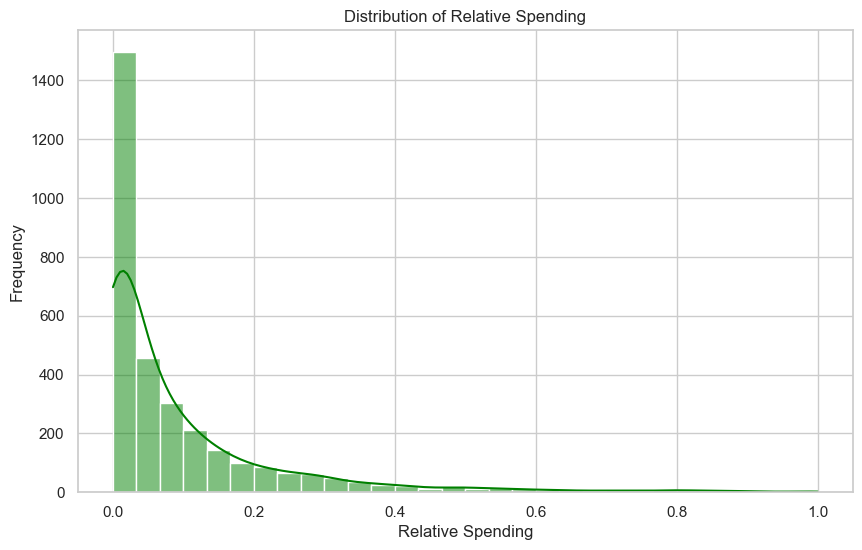

In [94]:
# Visualizing the distribution of the "relative" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['relative'], bins=30, kde=True, color='green')
plt.title('Distribution of Relative Spending')
plt.xlabel('Relative Spending')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The histogram shows that the **majority** of values are **clustered** towards the lower end, with a significant number of entries at **zero**.
+ The distribution also has a **long tail**, indicating that a few teams spend a disproportionately higher percentage of their league's total spending.

### b. Check and Correct Data Type :

In [95]:
# Verify the data type of the "relative" column
relative_dtype = filtered_data['relative'].dtype
print(f"The data type of the 'relative' column is: {relative_dtype}")

The data type of the 'relative' column is: float64


+ The data type of the **`relative`** column is **`float64`**, which is appropriate for representing numerical values, especially **ratios** like relative spending.

### c. Handle Missing Values :

In [96]:
# Check for missing values in the 'relative' column
missing_values_relative = filtered_data['relative'].isnull().sum()
print(f"Missing values in 'relative' column: {missing_values_relative}")

Missing values in 'relative' column: 0


+ There are **no missing values** in the **`relative`** column, so no handling is necessary for this column.

### d. Identify and Fix Outliers :

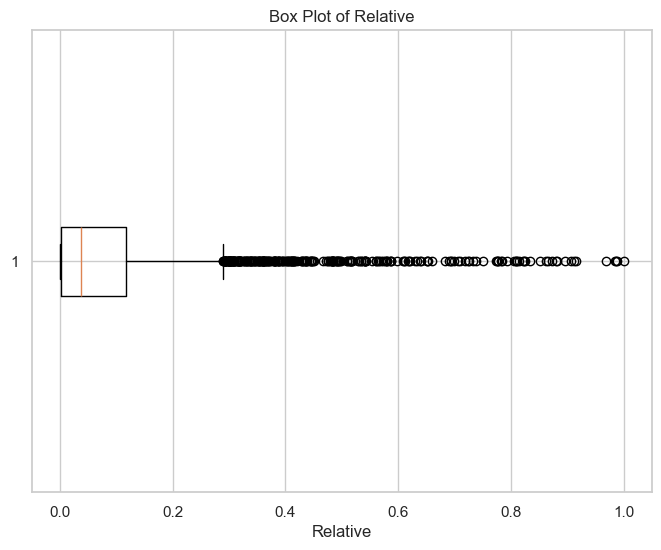

In [97]:
# Create a box plot for the 'relative' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['relative'], vert=False)
plt.title('Box Plot of Relative')
plt.xlabel('Relative')
plt.show()

+ The box plot shows a significant number of **outliers** on the right side of the distribution, particularly **beyond 0.2**.
+ These **outliers** indicate that while most teams have a **low relative** value, a few teams have disproportionately **high** values, which could potentially skew the analysis.

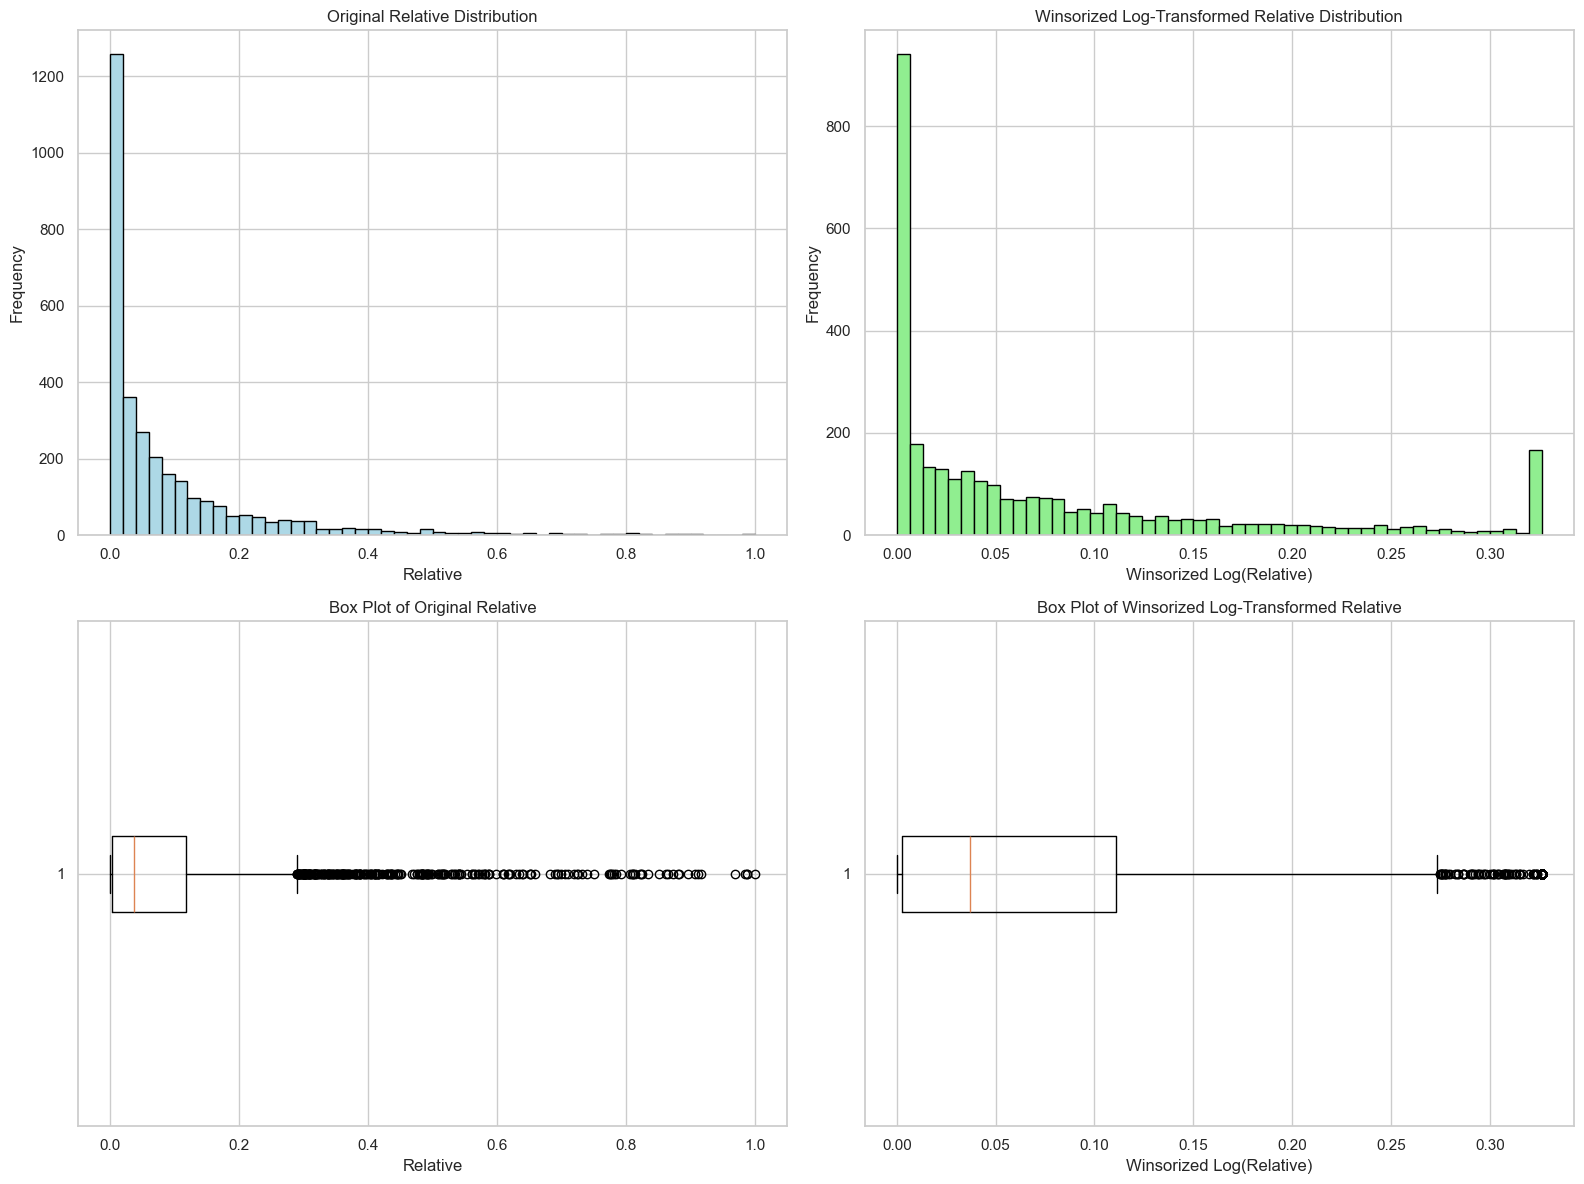

In [98]:
# Apply log transformation to the 'relative' column, adding 1 to avoid log(0)
filtered_data['log_relative'] = np.log1p(filtered_data['relative'])

# Apply Winsorization at the 5th and 95th percentiles
filtered_data['log_relative_winsorized'] = mstats.winsorize(filtered_data['log_relative'], limits=[0.05, 0.05])
# Create subplots to compare original, log-transformed, and Winsorized data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original relative distribution (Histogram)
axes[0, 0].hist(filtered_data['relative'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Relative Distribution')
axes[0, 0].set_xlabel('Relative')
axes[0, 0].set_ylabel('Frequency')

# Winsorized relative distribution (Histogram)
axes[0, 1].hist(filtered_data['log_relative_winsorized'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Winsorized Log-Transformed Relative Distribution')
axes[0, 1].set_xlabel('Winsorized Log(Relative)')
axes[0, 1].set_ylabel('Frequency')

# Original relative distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['relative'], vert=False)
axes[1, 0].set_title('Box Plot of Original Relative')
axes[1, 0].set_xlabel('Relative')

# Winsorized relative distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_relative_winsorized'], vert=False)
axes[1, 1].set_title('Box Plot of Winsorized Log-Transformed Relative')
axes[1, 1].set_xlabel('Winsorized Log(Relative)')

plt.tight_layout()
plt.show()

+ **Histograms** :
  
    + **Before Winsorized Log-Transformed**:
      
        + The histogram of the original relative data shows a heavily **right-skewed** distribution with most values concentrated **near zero** and a **long tail** extending towards higher values.
  
    + **After Winsorized Log-Transformed**:
      
        + After applying the **log transformation** and **Winsorization**, the histogram shows a more **balanced** distribution with **reduced** skewness. The influence of extreme values has been significantly reduced, making the data more suitable for analysis.

+ **Box plots** :
  
    + **Before Winsorized Log-Transformed** :
      
        + The box plot reveals a large number of **outliers** on the **higher end** of the distribution. These outliers could significantly impact the analysis, leading to skewed results.
          
    + After Winsorized Log-Transformed Histogram:
      
        + The **Winsorized log-transformed** box plot shows **fewer** and **less severe outliers**. The data is more **centralized**, with a narrower interquartile range (**IQR**), indicating that the majority of the data points are now closer together, which is ideal for further analysis.

### e. Summary :

+ The distribution shows that the **majority** of values are **clustered** towards the lower end, with a significant number of entries at **zero**.
+ The distribution also has a **long tail**, indicating that a few teams spend a disproportionately higher percentage of their league's total spending.
+ The data type is **`float64`** and there are **no missing values** in this column. **No conversion** or **handling** is **needed**.
+ After applying **log transformation** and **Winsorization**, the histogram reveals a more **balanced** distribution with reduced skewness, making the data more suitable for analysis.
+ The **Winsorized log-transformed** box plot shows **fewer and less** severe **outliers**, with a narrower interquartile range (IQR), indicating that the data is now more **centralized** and closer together, which is ideal for further analysis.

+ ### `net` Column :

### a. Explore the column:

In [99]:
# Summary statistics for the 'net' column
net_summary = filtered_data['net'].describe()
print("=== Summary statistics for the 'net' column ===\n")
print(net_summary)
print("\n================================================")

=== Summary statistics for the 'net' column ===

count    3172.000000
mean       -3.583321
std        29.901655
min      -543.630000
25%        -4.635000
50%         0.000000
75%         2.900000
max       221.400000
Name: net, dtype: float64



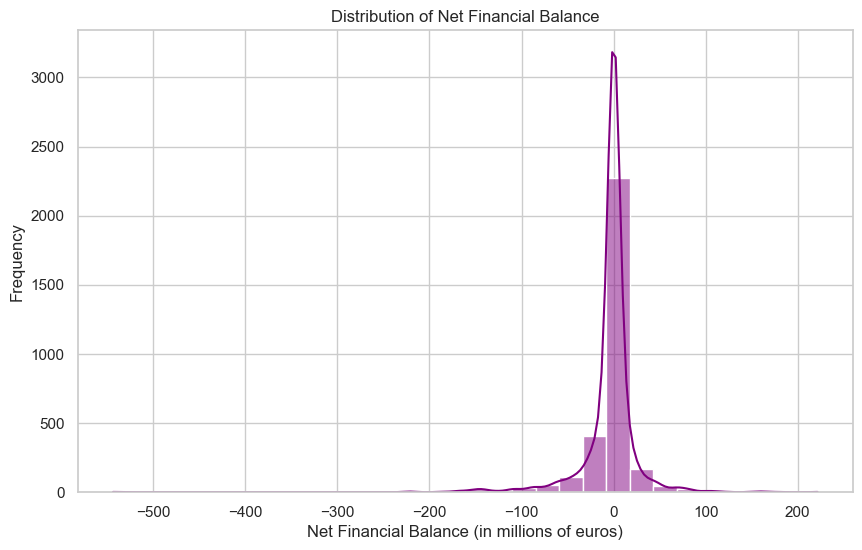

In [100]:
# Visualizing the distribution of the "net" column using seaborn

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['net'], bins=30, kde=True, color='purple')
plt.title('Distribution of Net Financial Balance')
plt.xlabel('Net Financial Balance (in millions of euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`net`** column (**`revenue`** minus **`spent`**) and has a **wide range**, from a significant **negative** balance (-543.63 million euros, that means teams spend more than they earn) to a **high** **positive** balance (221.40 million euros).
+ **On average**, teams are **spending** slightly **more** than they **earn**. (mean =  -3.58)
+ The **histogram** shows that the **majority** of teams have a net balance **clustered around zero**, with a long tail extending towards both significant deficits and surpluses. The **Kernel Density Estimate** curve provides a smooth estimation of the distribution, highlighting the central concentration and the spread of values.

### b. Check and Correct Data Type :

In [101]:
# Verify the data type of the "net" column
net_dtype = filtered_data['net'].dtype
print(f"The data type of the 'net' column is: {net_dtype}")

The data type of the 'net' column is: float64


+ The data type of the **`net`** column is **`float64`**, which is appropriate for representing numerical values, especially financial data like net balances. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [102]:
# Check for missing values in the 'net' column
missing_values_net = filtered_data['net'].isnull().sum()
print(f"Missing values in 'net' column: {missing_values_net}")

Missing values in 'net' column: 0


+ There are **no missing values** in the **`net`** column. This means the data is complete and does not require any handling for missing values.

### d. Identify and Fix Outliers :

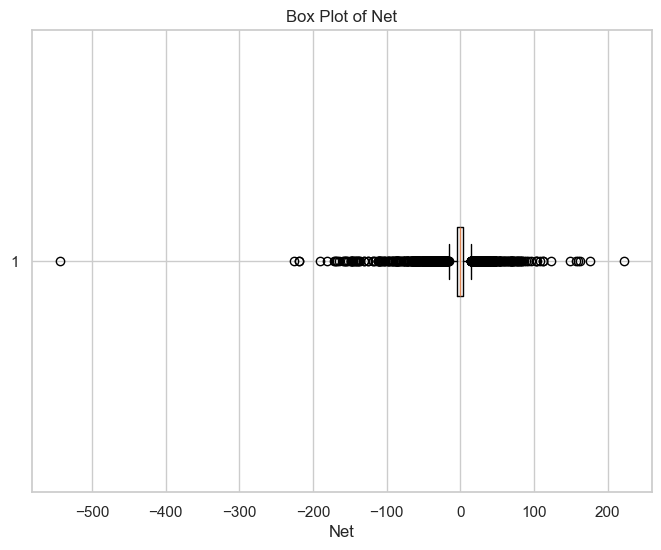

In [103]:
# Create a box plot for the 'net' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['net'], vert=False)
plt.title('Box Plot of Net')
plt.xlabel('Net')
plt.show()

+ There are **many outliers**, particularly on the **negative side**, with some extreme values going as low as **-543.63**. These outliers suggest that a few teams have very high negative net spending, which could significantly affect the overall analysis.

+ **Problematic** :

    + The **`net`** column represents the financial balance (**`revenue`** minus **`spent`**) of teams across different leagues. The data exhibited a **heavily** **skewed** distribution with **extreme negative values**, which could distort the analysis if left unaddressed.
    + These **extreme outliers** might be representative of teams with very **poor** financial efficiency, but their disproportionate influence could overshadow the general trends and **correlations** we aim to study.

+ **Decision** :
  
    + Chose **Cube Root Transformation**:
      
        + Unlike **log transformation**, which requires **positive** values, the **cube root transformation** can handle **both negative** and **positive** numbers without needing to shift the data.
        + The transformation effectively **normalizes** the data, **reducing skewness** and making the distribution more **symmetric**.
        + Compressing the range of extreme values, the **cube root** transformation reduces the influence of **outliers**, allowing for a more **balanced** and **accurate** analysis.

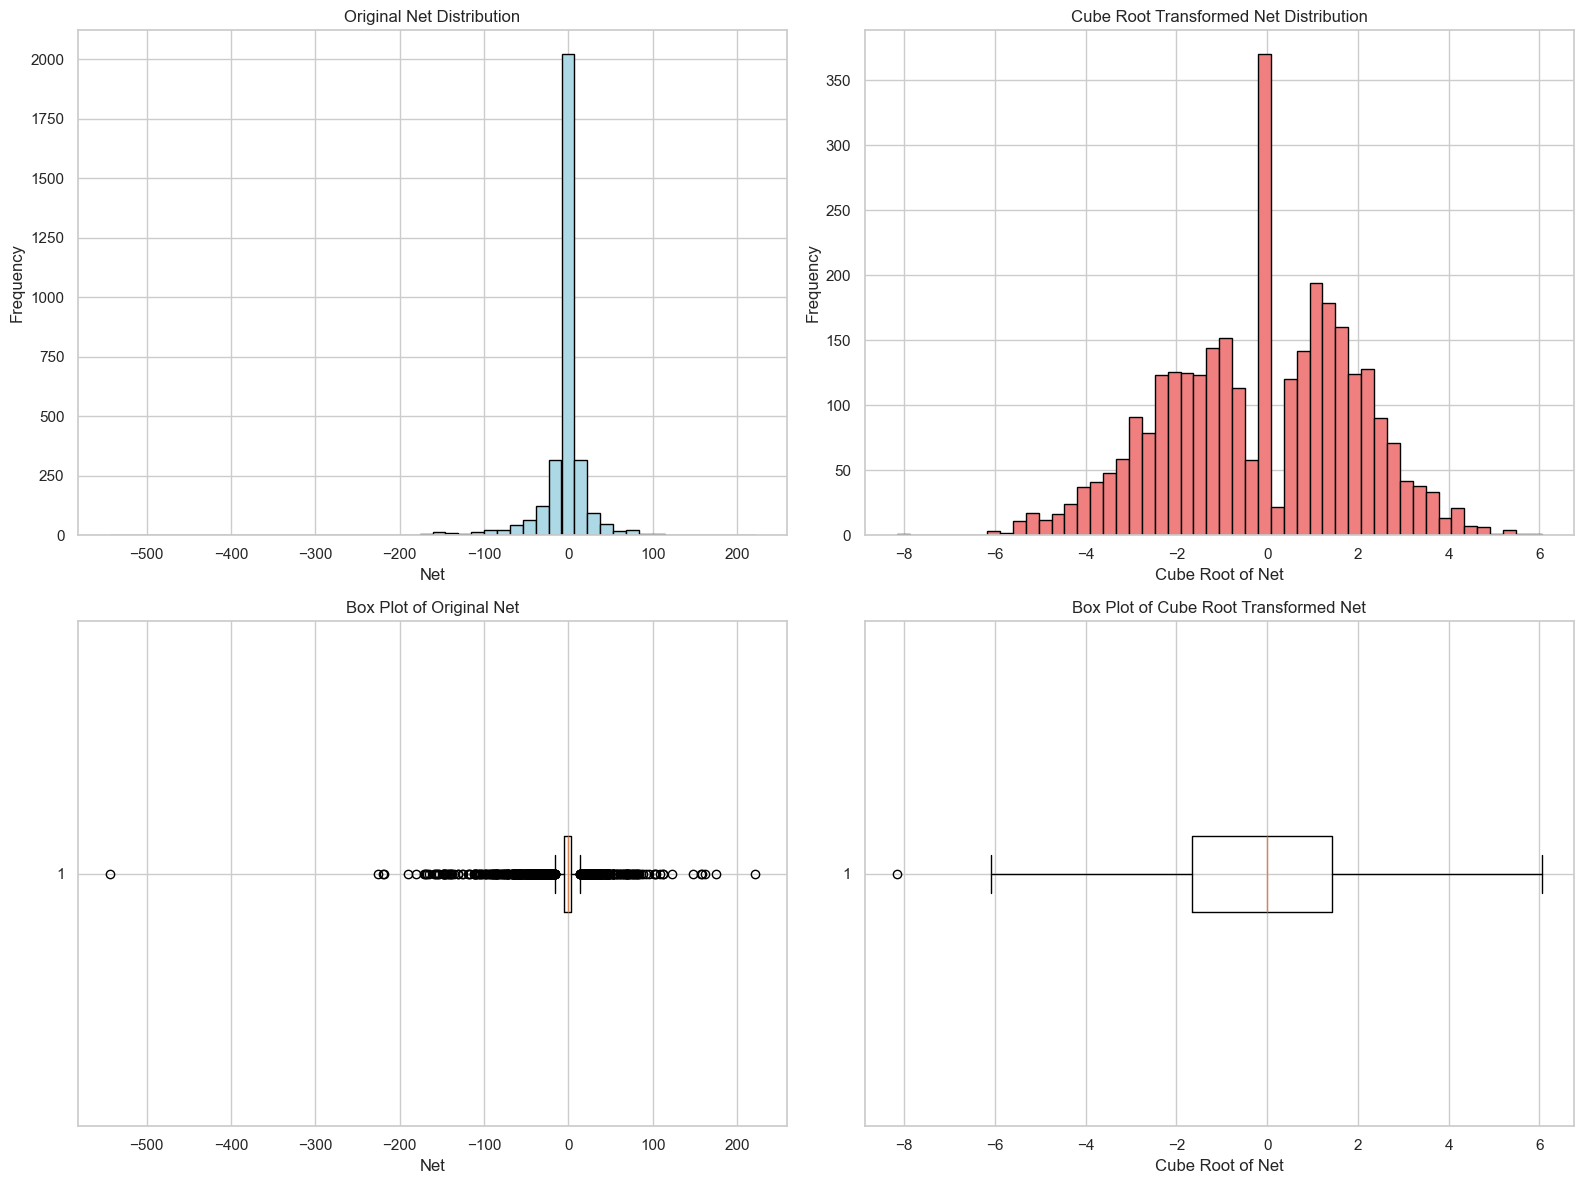

In [104]:
# Apply the cube root transformation to the 'net' column
filtered_data['net_cube_root'] = np.cbrt(filtered_data['net'])

# Create subplots to compare original and transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original net distribution (Histogram)
axes[0, 0].hist(filtered_data['net'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Net Distribution')
axes[0, 0].set_xlabel('Net')
axes[0, 0].set_ylabel('Frequency')

# Transformed net distribution (Histogram)
axes[0, 1].hist(filtered_data['net_cube_root'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Cube Root Transformed Net Distribution')
axes[0, 1].set_xlabel('Cube Root of Net')
axes[0, 1].set_ylabel('Frequency')

# Original net distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['net'], vert=False)
axes[1, 0].set_title('Box Plot of Original Net')
axes[1, 0].set_xlabel('Net')

# Transformed net distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['net_cube_root'], vert=False)
axes[1, 1].set_title('Box Plot of Cube Root Transformed Net')
axes[1, 1].set_xlabel('Cube Root of Net')

plt.tight_layout()
plt.show()

+ **Histograms** :

    + **Before Transformation**:
      
        + The original **net** data is **heavily skewed**, with the majority of values **concentrated** **near zero** and a significant number of extreme **outliers**, especially on the **negative** side. This skewness can distort the overall analysis, making it difficult to draw accurate conclusions about the financial efficiency of teams across different leagues.

    + **After Transformation**:

        + The **cube root transformation** has **normalized** the distribution, **reducing skewness** and providing a more **balanced** and **symmetrical** distribution. The transformed data now exhibits a more even spread, making it more suitable for analysis.

+ **Box Plots** :


    + **Before Transformation**:
          
        + The box plot highlights the presence of **numerous outliers**, particularly on the negative side. These **outliers** represent teams with substantial **negative net** values, which could disproportionately influence statistical metrics like the mean and variance.

    + **After Transformation**:

        + The number and severity of outliers have been significantly reduced. The transformed data is more **centralized**, with a more **compact interquartile** range (IQR), which makes it easier to analyze without the distortion caused by extreme values.

+ This approach ensures that your analysis is robust, accurate, and aligned with our project objectives, and to draw more meaningful insights from the financial data.

### e. Summary :

+ The **`net`** column, shows a **wide range** from a significant **negative** balance (**-543.63** million euros) to a high **positive** balance (**221.40** million euros). On average, teams **spend slightly more than they earn**, with a **mean net** balance of **-3.58** million euros.
+ The distribution of net balances is mostly **clustered around zero**, with some teams experiencing considerable deficits or surpluses.
+ The data type of the **`net`** column is **`float64`**, suitable for financial data, and there are **no missing values**, ensuring the dataset is complete and accurate for analysis.
+ I chose to apply **Cube Root Transformation** to the **`net`** data for **handling outliers**.

+ ### `goals_for` Column :

### a. Explore the column:

In [105]:
# Summary statistics for the 'goals_for' column
goals_for_summary = filtered_data['goals_for'].describe()
print("=== Summary statistiacs for the 'goals_for' column ===\n")
print(goals_for_summary)
print("\n====================================================")

=== Summary statistiacs for the 'goals_for' column ===

count    3172.000000
mean       53.943253
std        16.787332
min        13.000000
25%        42.000000
50%        52.000000
75%        64.000000
max       121.000000
Name: goals_for, dtype: float64



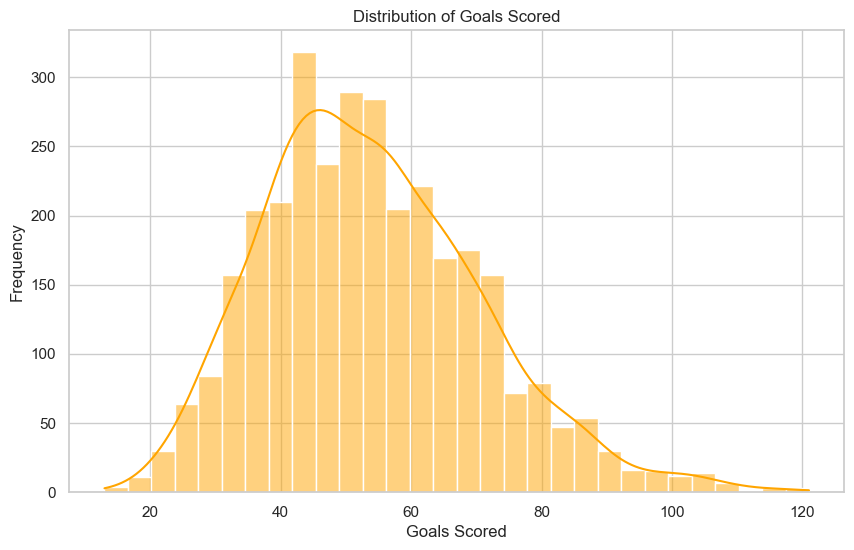

In [106]:
# Visualizing the distribution of the "goals_for" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['goals_for'], bins=30, kde=True, color='orange')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`goals_for`** column has values ranging from **13** to **121** goals.
+ The **average** number of **goals scored** is approximately **53**, with most teams scoring between **42** and **64** goals.
+ The distribution is **fairly wide**, indicating variability in team performance.
+ The distribution of goals scored by teams shows a **right-skewed** pattern.
+ There is a **peak** in the frequency around **50** goals, which aligns with the **median** value observed earlier.

### b. Check and Correct Data Type :

In [107]:
# Verify the data type of the "goals_for" column
goals_for_dtype = filtered_data['goals_for'].dtype
print(f"The data type of the 'goals_for' column is: {goals_for_dtype}")

The data type of the 'goals_for' column is: float64


+ The **`goals_for`** column contains **integer** values, representing counts. Ensuring it is stored as **`int64`** guarantees that it is processed correctly as whole numbers.

In [108]:
# Convert the 'goals_for' column to integer type
filtered_data['goals_for'] = filtered_data['goals_for'].astype('int64')

In [109]:
# Verify the data type of the "goals_for" column
goals_for_dtype = filtered_data['goals_for'].dtype
print(f"The data type of the 'goals_for' column is: {goals_for_dtype}")

The data type of the 'goals_for' column is: int64


### c. Handle Missing Values :

In [110]:
# Check for missing values in the 'goals_for' column
missing_values_goals_for = filtered_data['goals_for'].isnull().sum()
print(f"Missing values in 'goals_for' column: {missing_values_goals_for}")

Missing values in 'goals_for' column: 0


+ The **`goals_for`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

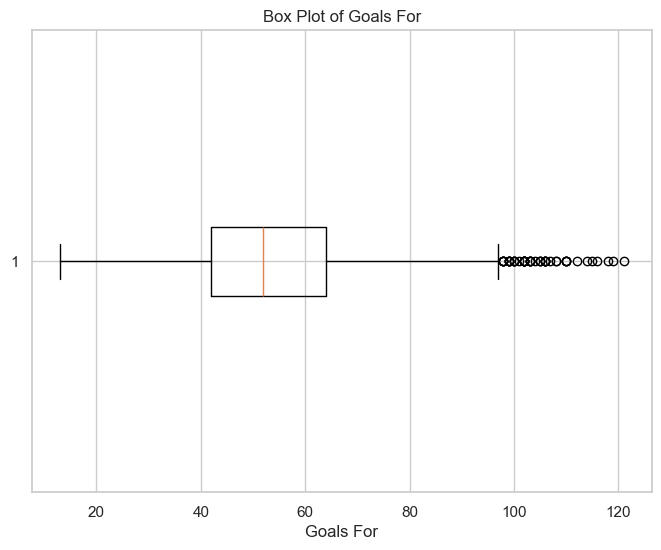

In [111]:
# Create a box plot for the 'goals_for' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['goals_for'], vert=False)
plt.title('Box Plot of Goals For')
plt.xlabel('Goals For')
plt.show()

+ The box plot shows a **concentration of outliers** on the **higher end** of the distribution, starting from around **85** goals and extending up to **121** goals. These outliers indicate teams that have scored significantly more goals than the majority, which could skew the analysis if not properly managed.

In [112]:
filtered_data[filtered_data['goals_for']==121]

,league,team,season,revenue,spent,competition,position,wins,ties,losses,...,5_season_net,5_season_league_agg,5_season_relative,first_tier,log_revenue,log_spent,log_league_spent,log_relative,log_relative_winsorized,net_cube_root
311,Spain,Real Madrid,12,8.0,56.0,First Tier,1,32,4,2,...,-387.3,2166.66,0.280478,1,2.197225,4.043051,5.995506,0.130838,0.130838,-3.634241


+ **Problematic**:

    + The **`goals_for`** column represents the number of goals scored by teams. The original data exhibited significant **right skewness** and a substantial number of **outliers**, particularly on the **higher end** of the distribution.
    + These outliers could **distort** the analysis, leading to **misleading** conclusions about the relationship between **goals scored** and other **performance metrics**.

+ **Decision** :

    + I Chose **Square Root** Transformation:
        + The **square root** transformation is particularly effective for **count data** like goals scored. It **compresses the range** of higher values, reducing the impact of outliers while maintaining the relative differences between teams. This transformation helps to normalize the data, making it more suitable for statistical analysis.
        + By applying the **square root** transformation, the influence of extreme values is reduced, ensuring that they do not disproportionately affect the analysis. This helps maintain the integrity of the data while allowing for meaningful comparisons between teams.
        + The **square root **transformation retains the interpretability of the goals scored, as it still reflects the underlying performance metric in a more **normalized** form.

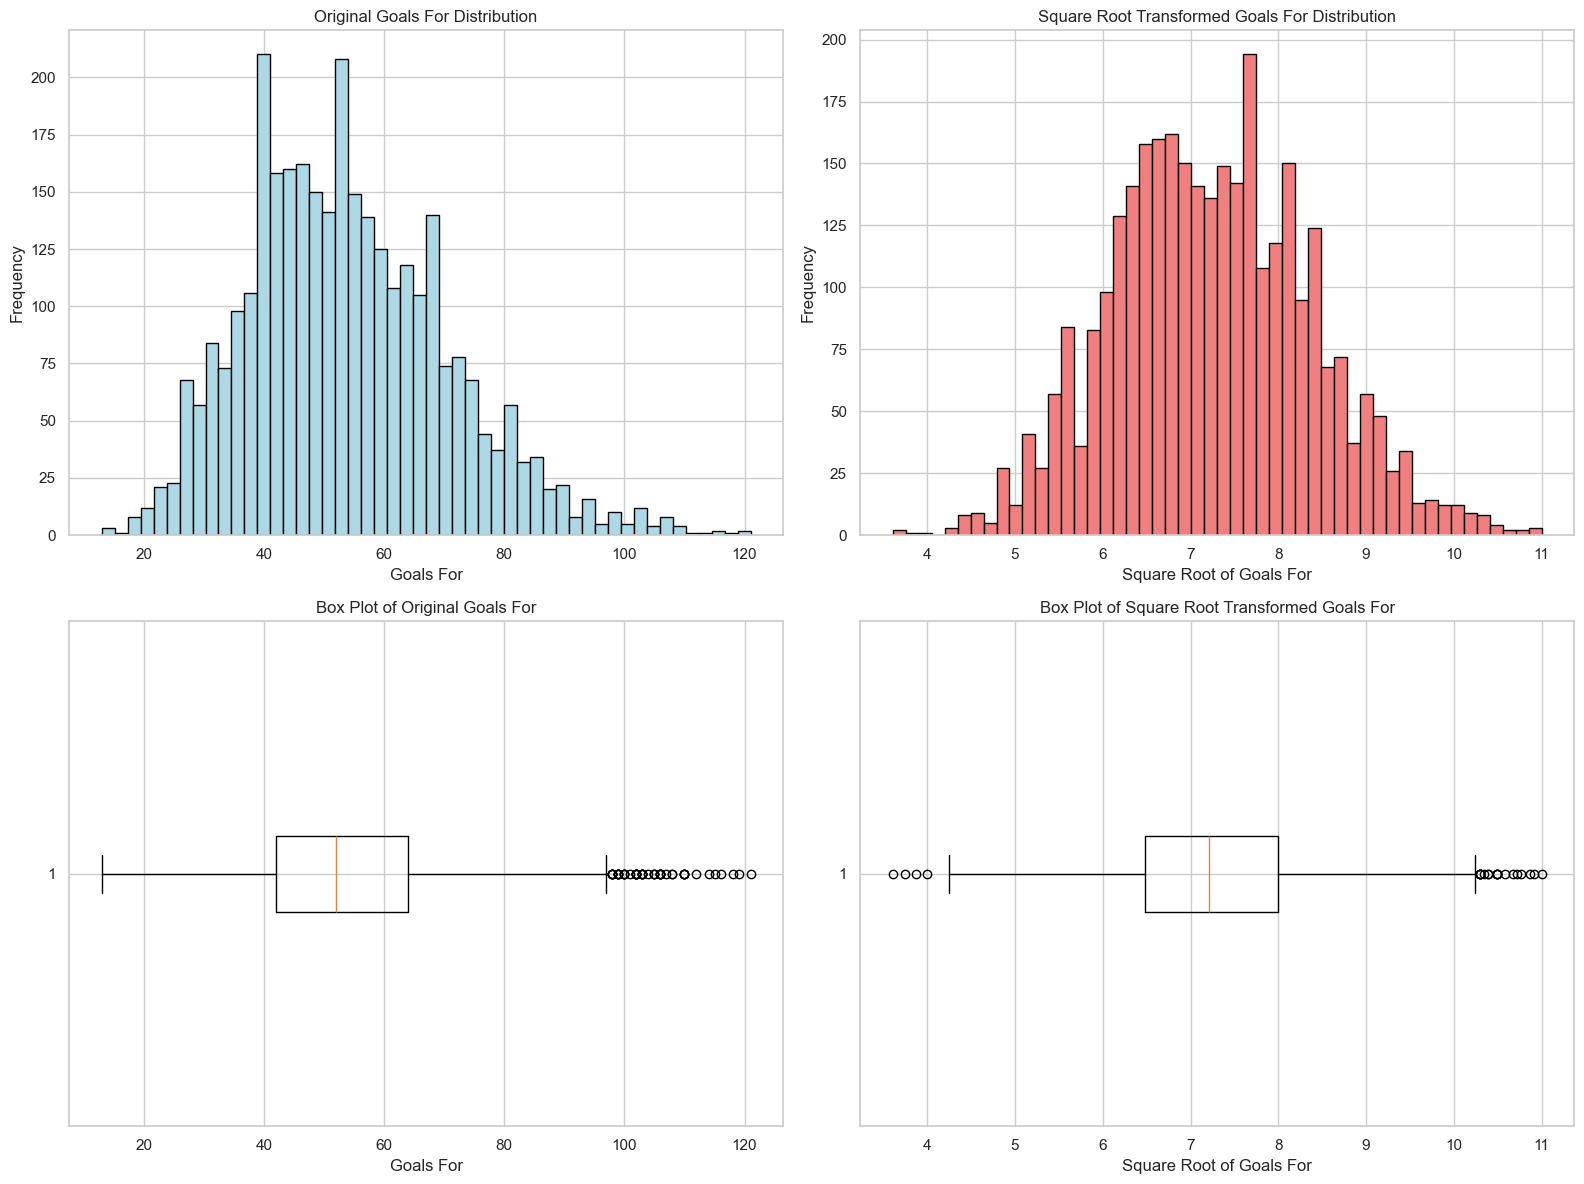

In [113]:
# Apply square root transformation to the 'goals_for' column
filtered_data['sqrt_goals_for'] = np.sqrt(filtered_data['goals_for'])

# Create subplots to compare original and square root transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original goals_for distribution (Histogram)
axes[0, 0].hist(filtered_data['goals_for'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Goals For Distribution')
axes[0, 0].set_xlabel('Goals For')
axes[0, 0].set_ylabel('Frequency')

# Transformed goals_for distribution (Histogram)
axes[0, 1].hist(filtered_data['sqrt_goals_for'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Square Root Transformed Goals For Distribution')
axes[0, 1].set_xlabel('Square Root of Goals For')
axes[0, 1].set_ylabel('Frequency')

# Original goals_for distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['goals_for'], vert=False)
axes[1, 0].set_title('Box Plot of Original Goals For')
axes[1, 0].set_xlabel('Goals For')

# Transformed goals_for distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['sqrt_goals_for'], vert=False)
axes[1, 1].set_title('Box Plot of Square Root Transformed Goals For')
axes[1, 1].set_xlabel('Square Root of Goals For')

plt.tight_layout()
plt.show()

+ **Histograms**:
    + **Before Transformation**:
      
        + The original histogram shows a **right-skewed** distribution with most teams scoring between **20** and **80** goals. The distribution has a long tail extending towards higher values, indicating the presence of some teams with significantly higher goal-scoring records.

    + **After Square Root Transformation**:

        + The **square root** transformation has **reduced** the **skewness** in the data, resulting in a more **balanced** and **symmetric** distribution. The extreme values have been **compressed**, making the data more evenly spread and easier to analyze.

+ **Box plots**:

    + **Before Transformation**:

        + The original box plot highlights a significant number of **outliers** starting from around **85** goals. These outliers represent teams that have scored substantially more goals than the majority, potentially skewing the analysis.

    + **After Square Root Transformation**:

        + The transformed box plot shows **fewer** and **less severe outliers**, with a more **compact interquartile range** (IQR). This indicates that the majority of the data points are now closer together, reducing the impact of outliers on the analysis.

+ This approach ensures that your analysis is robust, accurate, and aligned with your project objectives, enabling you to draw more meaningful insights from the performance data.

### e. Summary :

+ The **`goals_for`** ranges from **0** to **121** goals, with an average of **48**, and most teams scoring between **38** and **63** goals.
+ The distribution is **right-skewed**, with a peak **around 50** goals.
+ The data type of the **`goals_for`** column was converted to **`int64`**, there are **no missing values**, ensuring the dataset is complete and accurate for analysis.
+ I chose to apply **Square Root Transformation** to the **`goals_for`** data for **handling outliers**.

+ ### `goals_against` Column :

### a. Explore the column:

In [114]:
# Summary statistics for the 'goals_against' column
goals_against_summary = filtered_data['goals_against'].describe()
print("=== Summary statistics for the 'goals_against' column ===\n")
print(goals_against_summary)
print("\n==========================================================")

=== Summary statistics for the 'goals_against' column ===

count    3172.000000
mean       40.494641
std        12.262463
min         9.000000
25%        32.000000
50%        40.000000
75%        49.000000
max        82.000000
Name: goals_against, dtype: float64



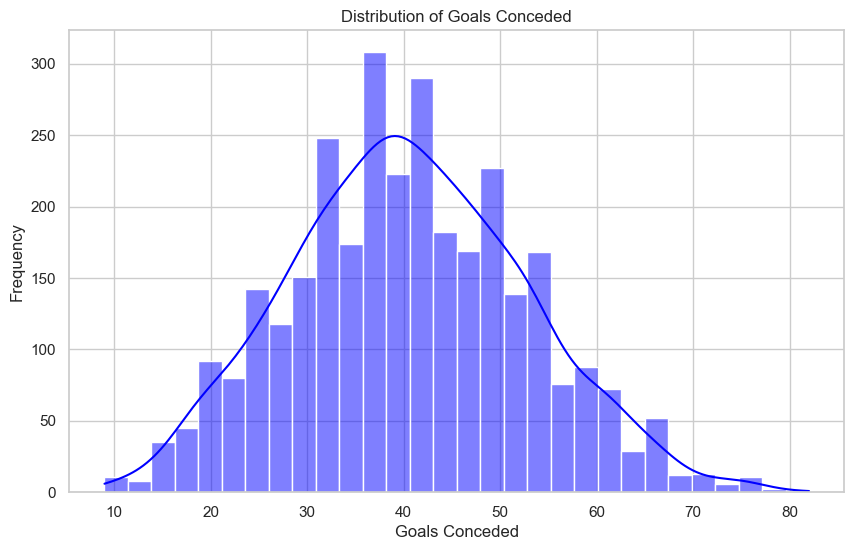

In [115]:
# Visualizing the distribution of the "goals_against" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['goals_against'], bins=30, kde=True, color='blue')
plt.title('Distribution of Goals Conceded')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`goals_against`** column ranges from **9** to **82** goals.
+ On **average**, teams concede around **40** goals, with most teams conceding between **32** and **49** goals.
+ The **distribution** of goals conceded by teams appears to be **approximately normal**, with a **central peak** around **40** goals. 
+ The data shows **variability** in defensive performance across teams, with some teams conceding significantly more goals than others.

### b. Check and Correct Data Type :

In [116]:
# Verify the data type of the "goals_against" column
goals_against_dtype = filtered_data['goals_against'].dtype
print(f"The data type of the 'goals_against' column is: {goals_against_dtype}")

The data type of the 'goals_against' column is: float64


+ The **`goals_against`** column contains **integer** values, representing counts. Ensuring it is stored as **`int64`** guarantees that it is processed correctly as whole numbers.

In [117]:
# Convert the 'goals_against' column to integer type
filtered_data['goals_against'] = filtered_data['goals_against'].astype('int64')

In [118]:
# Verify the data type of the "goals_against" column
goals_against_dtype = filtered_data['goals_against'].dtype
print(f"The data type of the 'goals_against' column is: {goals_against_dtype}")

The data type of the 'goals_against' column is: int64


### c. Handle Missing Values :

In [119]:
# Check for missing values in the 'goals_against' column
missing_values_goals_against = filtered_data['goals_against'].isnull().sum()
print(f"Missing values in 'goals_against' column: {missing_values_goals_against}")

Missing values in 'goals_against' column: 0


+ The **`goals_against`** column has **no missing values**, there's **no need** for any imputation or special handling for this aspect.

### d. Identify and Fix Outliers :

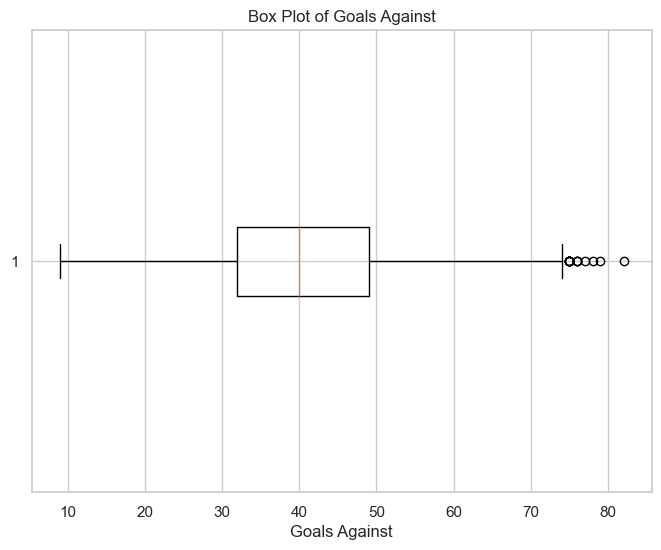

In [120]:
# Create a box plot for the 'goals_against' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['goals_against'], vert=False)
plt.title('Box Plot of Goals Against')
plt.xlabel('Goals Against')
plt.show()

+ The box plot shows a **concentration** of **outliers** on the **higher end** of the distribution, starting from around **74** goals and extending up to **82** goals. These **outliers** indicate teams that have conceded significantly more goals than the majority, which could skew the analysis if not properly managed.
+ Given that the **`goals_against`** data is count-based, similar to goals_for, a **square root transformation** could be effective here as well, as it would **reduce the impact** of higher values while keeping the data interpretable.

+ **Problematic** :

    + The **`goals_against`** column represents the number of **goals conceded** by teams. The original data exhibited significant **right skewness** and a substantial number of outliers, particularly on the **higher end** of the distribution.
    + These **outliers** could **distort** the analysis, leading to **misleading** conclusions about the **relationship** between goals conceded and other performance metrics.

+ **Decision** :
  
    + I Chose **Square Root Transformation**:

        + The **square root transformation** is particularly effective for **count data** like goals conceded. It **compresses the range** of higher values, **reducing** the **impact** of **outliers** while maintaining the relative differences between teams.
        + This transformation helps to **normalize** the data, making it more suitable for statistical analysis.
        + By applying the **square root transformation**, the influence of extreme values is **reduced**, ensuring that they do not disproportionately affect the analysis.
        + This helps maintain the **integrity** of the data while allowing for meaningful comparisons between teams.
        + The **square root transformation** retains the interpretability of the goals conceded, as it still reflects the underlying performance metric in a more normalized form.

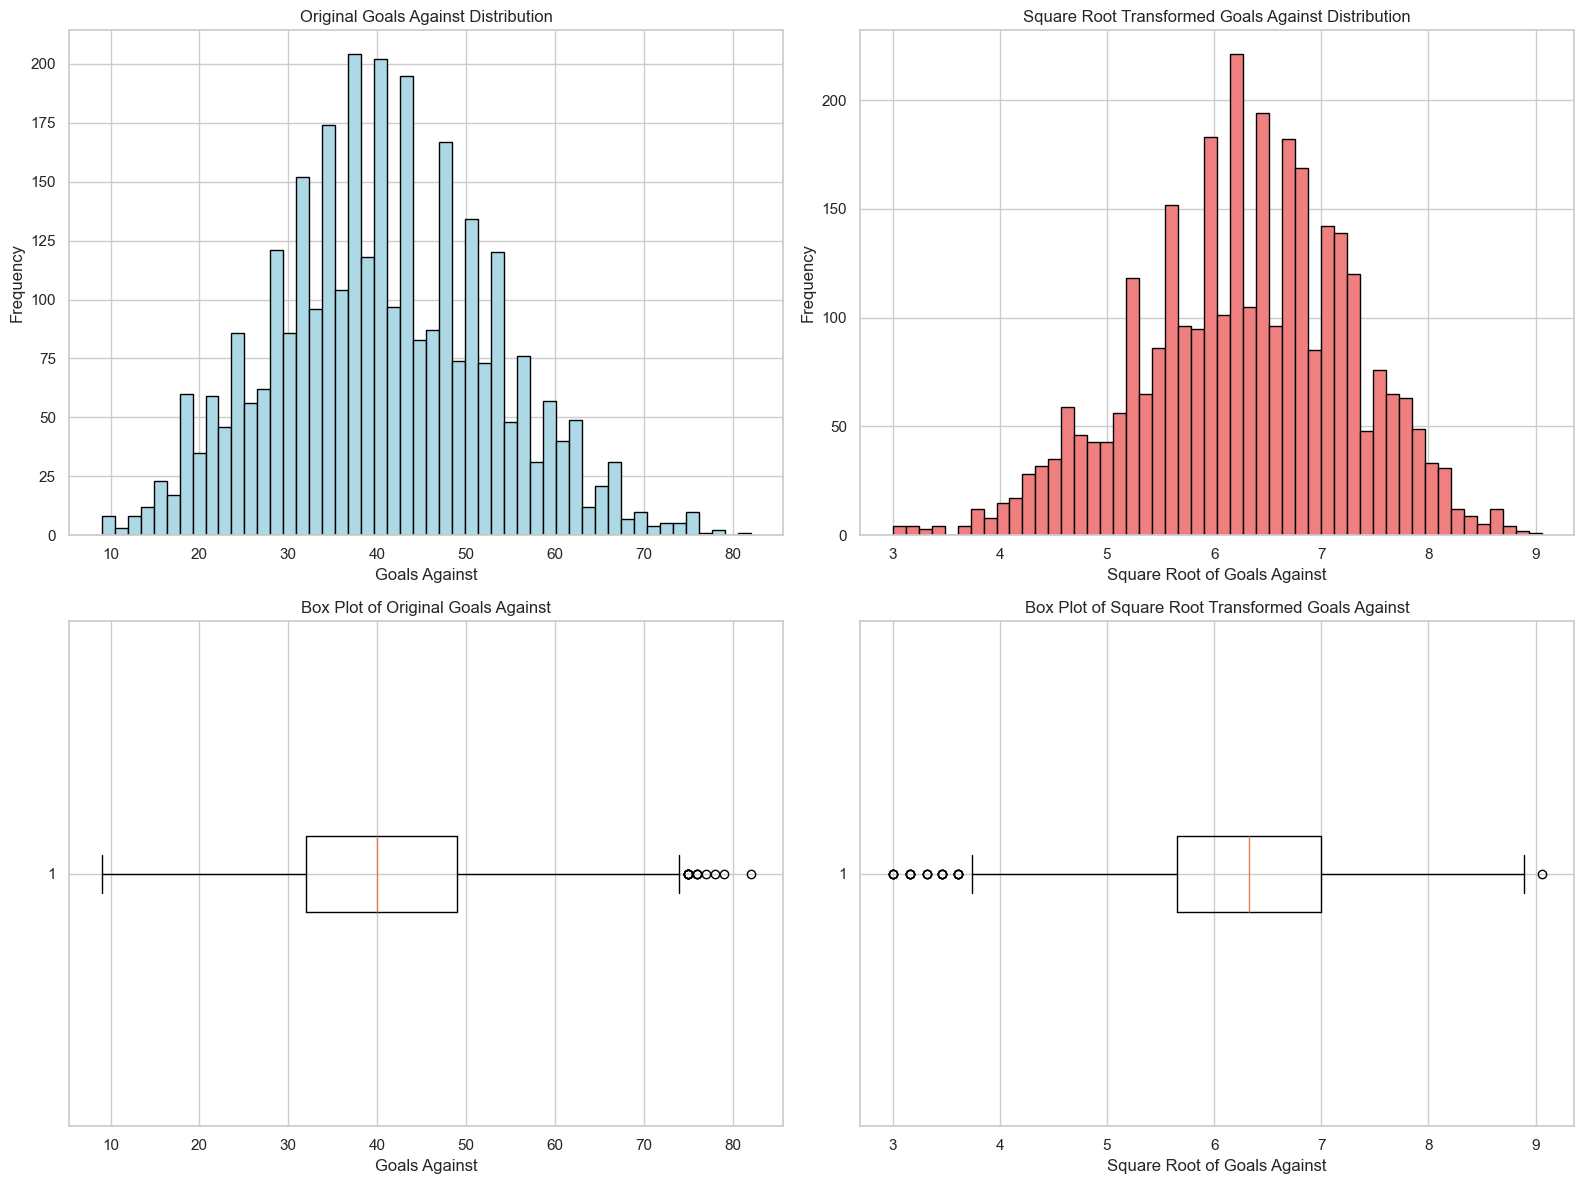

In [121]:
# Apply square root transformation to the 'goals_against' column
filtered_data['sqrt_goals_against'] = np.sqrt(filtered_data['goals_against'])

# Create subplots to compare original and square root transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original goals_against distribution (Histogram)
axes[0, 0].hist(filtered_data['goals_against'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Goals Against Distribution')
axes[0, 0].set_xlabel('Goals Against')
axes[0, 0].set_ylabel('Frequency')

# Transformed goals_against distribution (Histogram)
axes[0, 1].hist(filtered_data['sqrt_goals_against'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Square Root Transformed Goals Against Distribution')
axes[0, 1].set_xlabel('Square Root of Goals Against')
axes[0, 1].set_ylabel('Frequency')

# Original goals_against distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['goals_against'], vert=False)
axes[1, 0].set_title('Box Plot of Original Goals Against')
axes[1, 0].set_xlabel('Goals Against')

# Transformed goals_against distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['sqrt_goals_against'], vert=False)
axes[1, 1].set_title('Box Plot of Square Root Transformed Goals Against')
axes[1, 1].set_xlabel('Square Root of Goals Against')

plt.tight_layout()
plt.show()

+ **Histograms** :

    + **Before Transformation**:
      
        + The original histogram shows a **right-skewed** distribution, with most teams conceding between **20** and **60** goals. The distribution has a **long tail** extending towards higher values, indicating that some teams have conceded significantly more goals.

    + **After Square Root Transformation**:
    
        + The **square root transformation** has **reduced** the skewness in the data, resulting in a more **balanced** and **symmetric** distribution. The extreme values have been **compressed**, making the data more evenly **spread** and **easier** to analyze.

+ **Box plots** :

    + **Before Transformation**:
      
        + The original box plot highlights a significant **number of outliers** starting from around **65** goals and extending up to **82** goals. These outliers represent teams with substantially higher goals conceded, potentially skewing the analysis.
          
    + **After Square Root Transformation**:
      
        + The transformed box plot shows **fewer and less severe outliers**, with a more **compact interquartile range** (IQR). This indicates that the majority of the data points are now closer together, reducing the impact of outliers on the analysis.

### e. Summary :

+ The **`goals_against`**'s distribution is approximately normal, with a central peak around 40 goals, 
+ The data type of the **`goals_against`** column was converted to **`int64`**, there are **no missing values**, ensuring the dataset is complete and accurate for analysis.
+ I chose to apply **Square Root Transformation** to the **`goals_against`** data for **handling outliers**.

+ ### `5_season_agg` Column :

### a. Explore the column:

In [122]:
# Summary statistics for the '5_season_agg' column
season_agg_summary = filtered_data['5_season_agg'].describe()
print("=== Summary statistics for the '5_season_agg' column ===\n")
print(season_agg_summary)
print("\n========================================================")

=== Summary statistics for the '5_season_agg' column ===

count    3172.000000
mean       85.417253
std       149.466212
min         0.000000
25%         1.527000
50%        21.350000
75%        96.200000
max      1230.490000
Name: 5_season_agg, dtype: float64



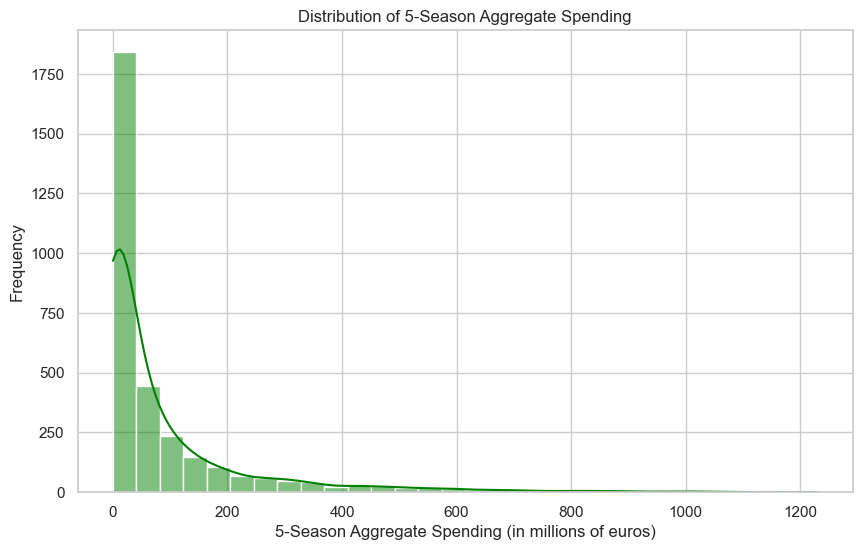

In [123]:
# Visualizing the distribution of the "5_season_agg" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['5_season_agg'], bins=30, kde=True, color='green')
plt.title('Distribution of 5-Season Aggregate Spending')
plt.xlabel('5-Season Aggregate Spending (in millions of euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`5_season_agg`**'s' data shows a **wide range** of spending, with values ranging from **0** to **1230.49** million euros.
+ The **average** spending is approximately **85.41** million euros, but there is significant **variability**, as indicated by a **high standard deviation**.
+ Most teams have spent **modest** amounts, with a **median** of **14.64** million euros.
+ The **distribution** is highly **right-skewed**, with the majority of teams spending relatively **small amounts** over the five-season period. This is evidenced by the high frequency of values **close to zero**.
+ This disparity highlights the differences in **financial strategies** and **resources** among teams over a five-season period.

### b. Check and Correct Data Type :

In [124]:
# Verify the data type of the "5_season_agg" column
season_agg_dtype = filtered_data['5_season_agg'].dtype
print(f"The data type of the '5_season_agg' column is: {season_agg_dtype}")

The data type of the '5_season_agg' column is: float64


+ The data type of the **`5_season_agg`** column is **`float64`**, which is appropriate for representing numerical values, especially financial data. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [125]:
# Check for missing values in the '5_season_agg' column
missing_values_season_agg = filtered_data['5_season_agg'].isnull().sum()
print(f"Missing values in '5_season_agg' column: {missing_values_season_agg}")

Missing values in '5_season_agg' column: 0


+ There are **no missing values** in the **`5_season_agg`** column. This means the data is complete and does not require any handling for missing values.

### d. Identify and Fix Outliers :

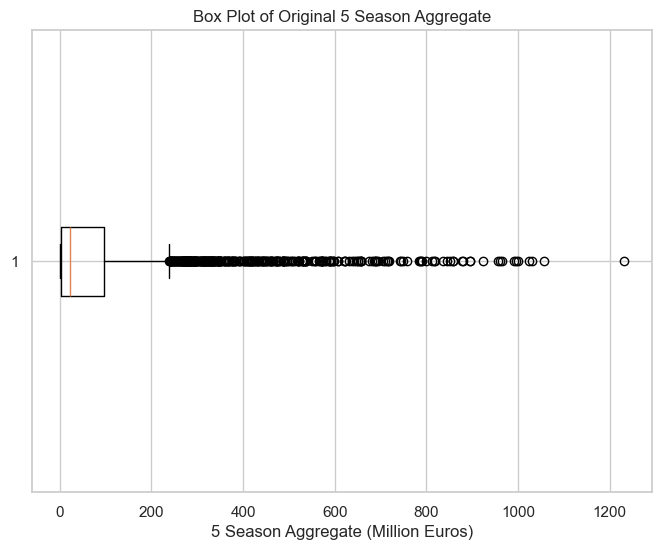

In [126]:
# Create a box plot for the original '5_season_agg' column to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['5_season_agg'], vert=False)
plt.title('Box Plot of Original 5 Season Aggregate')
plt.xlabel('5 Season Aggregate (Million Euros)')
plt.show()

+ There are significant **outliers** on the **higher end** of the distribution, indicating that some teams have spent substantially more than others over the past five seasons.

+ **Problematic** :

    + The **`5_season_agg`** column represents the aggregate spending by teams over the past **five** seasons.
    + The original data exhibited significant **right skewness** and a substantial number of outliers, particularly on the **higher end** of the distribution.
    + These **outliers** could **distort** the analysis, leading to **misleading** conclusions about the **relationship** between **financial** **spending** and **team performance**.

+ **Decision** :

    + I Chose **Log Transformation**:

        + The **log transformation** is particularly effective for **financial** data, which often exhibits **skewness**. It **compresses** the range of higher values, **reducing the impact of outlier**s while maintaining the relative differences between teams. This transformation helps to normalize the data, making it more suitable for statistical analysis.
        + By applying the **log transformation**, the influence of extreme values is **reduced**, ensuring that they do not disproportionately affect the analysis. This helps maintain the **integrity** of the data while allowing for meaningful comparisons between teams.
        + The **log transformation** retains the interpretability of the financial spending data, as it still reflects the underlying financial strategy in a more normalized form.

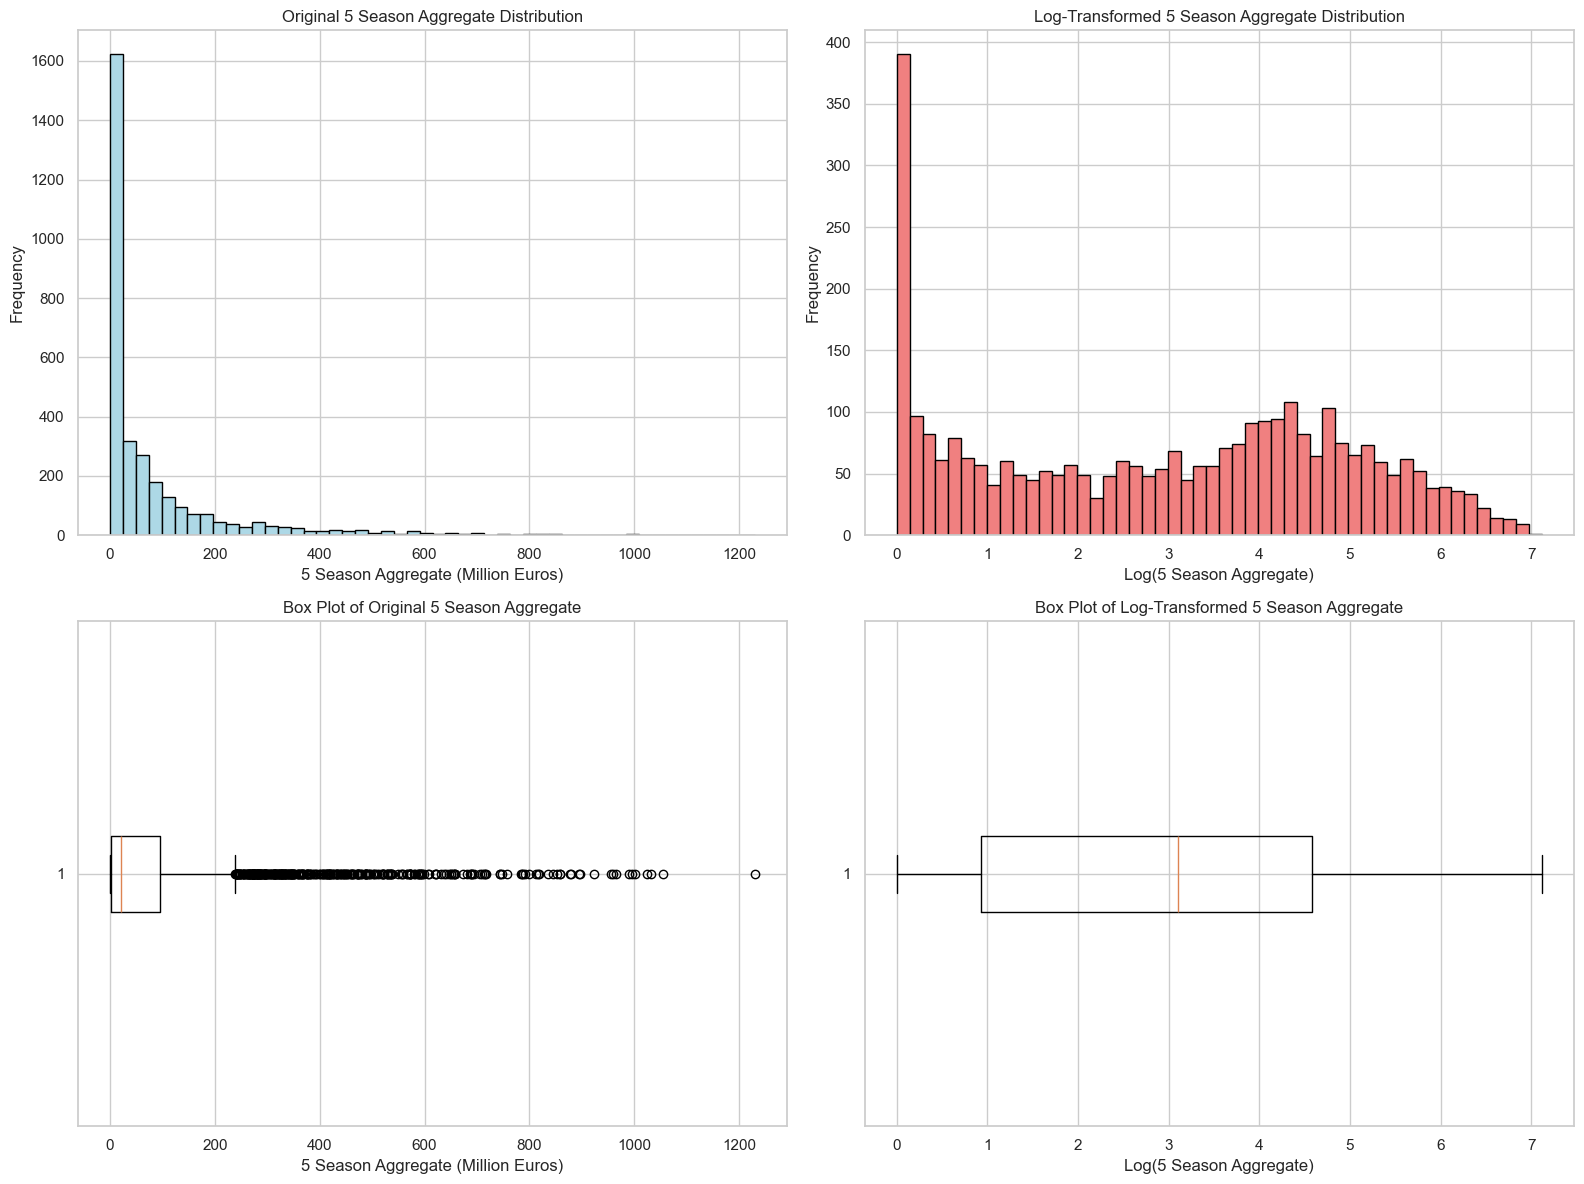

In [127]:
# Apply log transformation to the '5_season_agg' column, adding a small constant to avoid log(0)
filtered_data['log_5_season_agg'] = np.log1p(filtered_data['5_season_agg'])

# Create subplots to compare original and log-transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original 5_season_agg distribution (Histogram)
axes[0, 0].hist(filtered_data['5_season_agg'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original 5 Season Aggregate Distribution')
axes[0, 0].set_xlabel('5 Season Aggregate (Million Euros)')
axes[0, 0].set_ylabel('Frequency')

# Transformed 5_season_agg distribution (Histogram)
axes[0, 1].hist(filtered_data['log_5_season_agg'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log-Transformed 5 Season Aggregate Distribution')
axes[0, 1].set_xlabel('Log(5 Season Aggregate)')
axes[0, 1].set_ylabel('Frequency')

# Original 5_season_agg distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['5_season_agg'], vert=False)
axes[1, 0].set_title('Box Plot of Original 5 Season Aggregate')
axes[1, 0].set_xlabel('5 Season Aggregate (Million Euros)')

# Transformed 5_season_agg distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_5_season_agg'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed 5 Season Aggregate')
axes[1, 1].set_xlabel('Log(5 Season Aggregate)')

plt.tight_layout()
plt.show()

+ **Histograms** :
  
    + **Before Transformation**:
      
        + The original histogram displays a strong **right-skewness**, with a majority of teams spending under **200** million euros over five seasons. There is a **long tail** extending towards the higher values, with a few teams spending much more, up to over **1,200** million euros. This indicates a highly uneven distribution of spending across teams.
          
    + **After Log Transformation**:
      
        + The **log transformation** has significantly **reduced the skewness**, leading to a more **balanced** and symmetrical distribution. The extreme values have been compressed, making the overall spending patterns across teams more comparable. The distribution is now more evenly spread, with fewer extreme deviations.

  

      
+ **Box plots** :
  
    + **Before Transformation**:
      
        + The original box plot reveals a **significant number of outliers** starting from around **300** million euros and extending up to the maximum value. These outliers suggest that certain teams have exceptionally **high spending** over the five-season period, which could skew any financial analysis if not handled appropriately.
          
    + **After Log Transformation**:
      
        + The **log-transformed** box plot shows a more **compact interquartile range** (IQR), with fewer and less severe outliers. The transformation has successfully reduced the impact of extreme values, bringing the majority of data points closer together and making the dataset easier to analyze.

+ The **log transformation** was highly effective in **normalizing** the distribution of the **`5_season_agg`** column and reducing the impact of extreme outliers. By **compressing the range** of higher values, the transformation made the data more suitable for analysis, allowing for meaningful comparisons between teams' financial strategies over the five-season period.

### e. Summary :

+ The **`5_season_agg`** column range from **0** to **1230.49** million euros.
+ The **average** spending is approximately **85.41** million euros, though there is significant variability, with most teams spending **modest** amounts (median of 21.35 M).
+ The distribution is **highly right-skewed**, indicating that while a majority of teams spend relatively little, a few teams invest heavily.
+ The data type of the **`5_season_agg`** column is **`float64`**, appropriate for financial data.
+ There are **no missing values**, ensuring the dataset is complete for analysis.
+ I chose to apply **log transformation** to the **`5_season_agg`** data for **handling outliers**.

+ ### `5_season_net` Column :

### a. Explore the column:

In [128]:
# Summary statistics for the '5_season_net' column
season_net_summary = filtered_data['5_season_net'].describe()
print("=== Summary statistics for the '5_season_net' column ===\n")
print(season_net_summary)
print("\n========================================================")

=== Summary statistics for the '5_season_net' column ===

count    3172.000000
mean      -16.766078
std        87.137853
min      -724.780000
25%       -18.625000
50%         0.410000
75%         9.035000
max       493.680000
Name: 5_season_net, dtype: float64



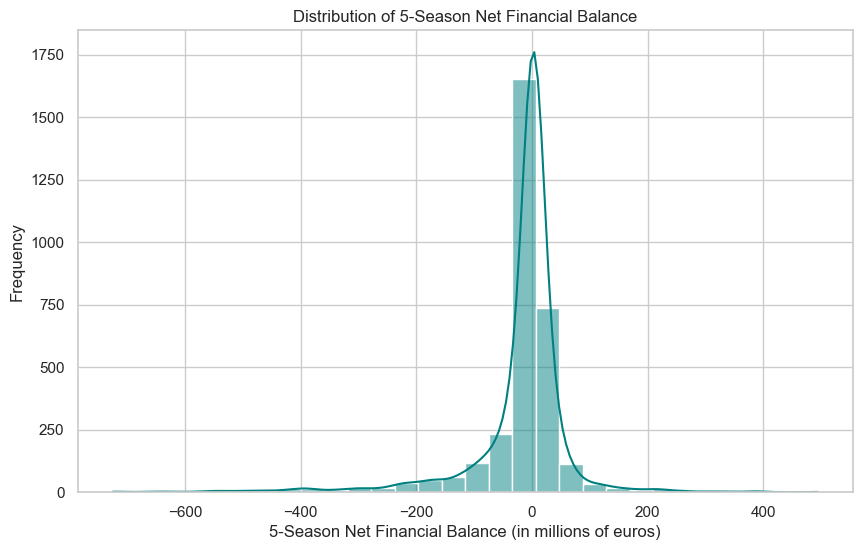

In [129]:
# Visualizing the distribution of the "5_season_net" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['5_season_net'], bins=30, kde=True, color='teal')
plt.title('Distribution of 5-Season Net Financial Balance')
plt.xlabel('5-Season Net Financial Balance (in millions of euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`5_season_net`** column range from **-724.78** million to **493.68** million euros.
+ On **average**, teams have a **negative net** balance of **-16.76** million, indicating that most teams **spend more** than they **earn** over this period.
+ The **distribution** of the **`5_season_net`** column is fairly **symmetric**, centered around **zero**. This indicates that while some teams have a net surplus, others have a net deficit, with most values **clustering** close to the **center**.

### b. Check and Correct Data Type :

In [130]:
# Verify the data type of the "5_season_net" column
season_net_dtype = filtered_data['5_season_net'].dtype
print(f"The data type of the '5_season_net' column is: {season_net_dtype}")

The data type of the '5_season_net' column is: float64


+ The data type of the **`5_season_net`** column is **`float64`**, which is appropriate for representing numerical values, especially financial data. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [131]:
# Check for missing values in the '5_season_net' column
missing_values_season_net = filtered_data['5_season_net'].isnull().sum()
print(f"Missing values in '5_season_net' column: {missing_values_season_net}")

Missing values in '5_season_net' column: 0


+ There are **no missing values** in the **`5_season_net`** column. This means the data is complete and does not require any handling for missing values.

### d. Identify and Fix Outliers :

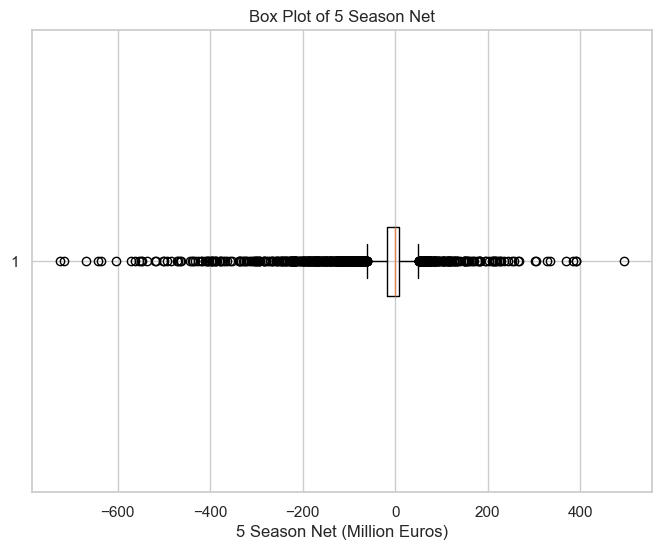

In [132]:
# Create a box plot for the '5_season_net' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['5_season_net'], vert=False)
plt.title('Box Plot of 5 Season Net')
plt.xlabel('5 Season Net (Million Euros)')
plt.show()

+ The box plot shows a **significant number of outliers** on **both ends** of the distribution, with values ranging from around **-600** million euros to **+400** million euros. These outliers represent teams with extreme net spending (either positive or negative) over the five-season period, which could potentially skew the analysis if not properly managed.
+ Given the nature of the **`5_season_net column`**, with significant variability and **outliers on both ends**, **Winsorization** offers a **balanced** approach that effectively reduces the influence of extreme values while preserving the **integrity** and **interpretability** of the data. This makes it the most appropriate method for achieving reliable and meaningful insights in our project.

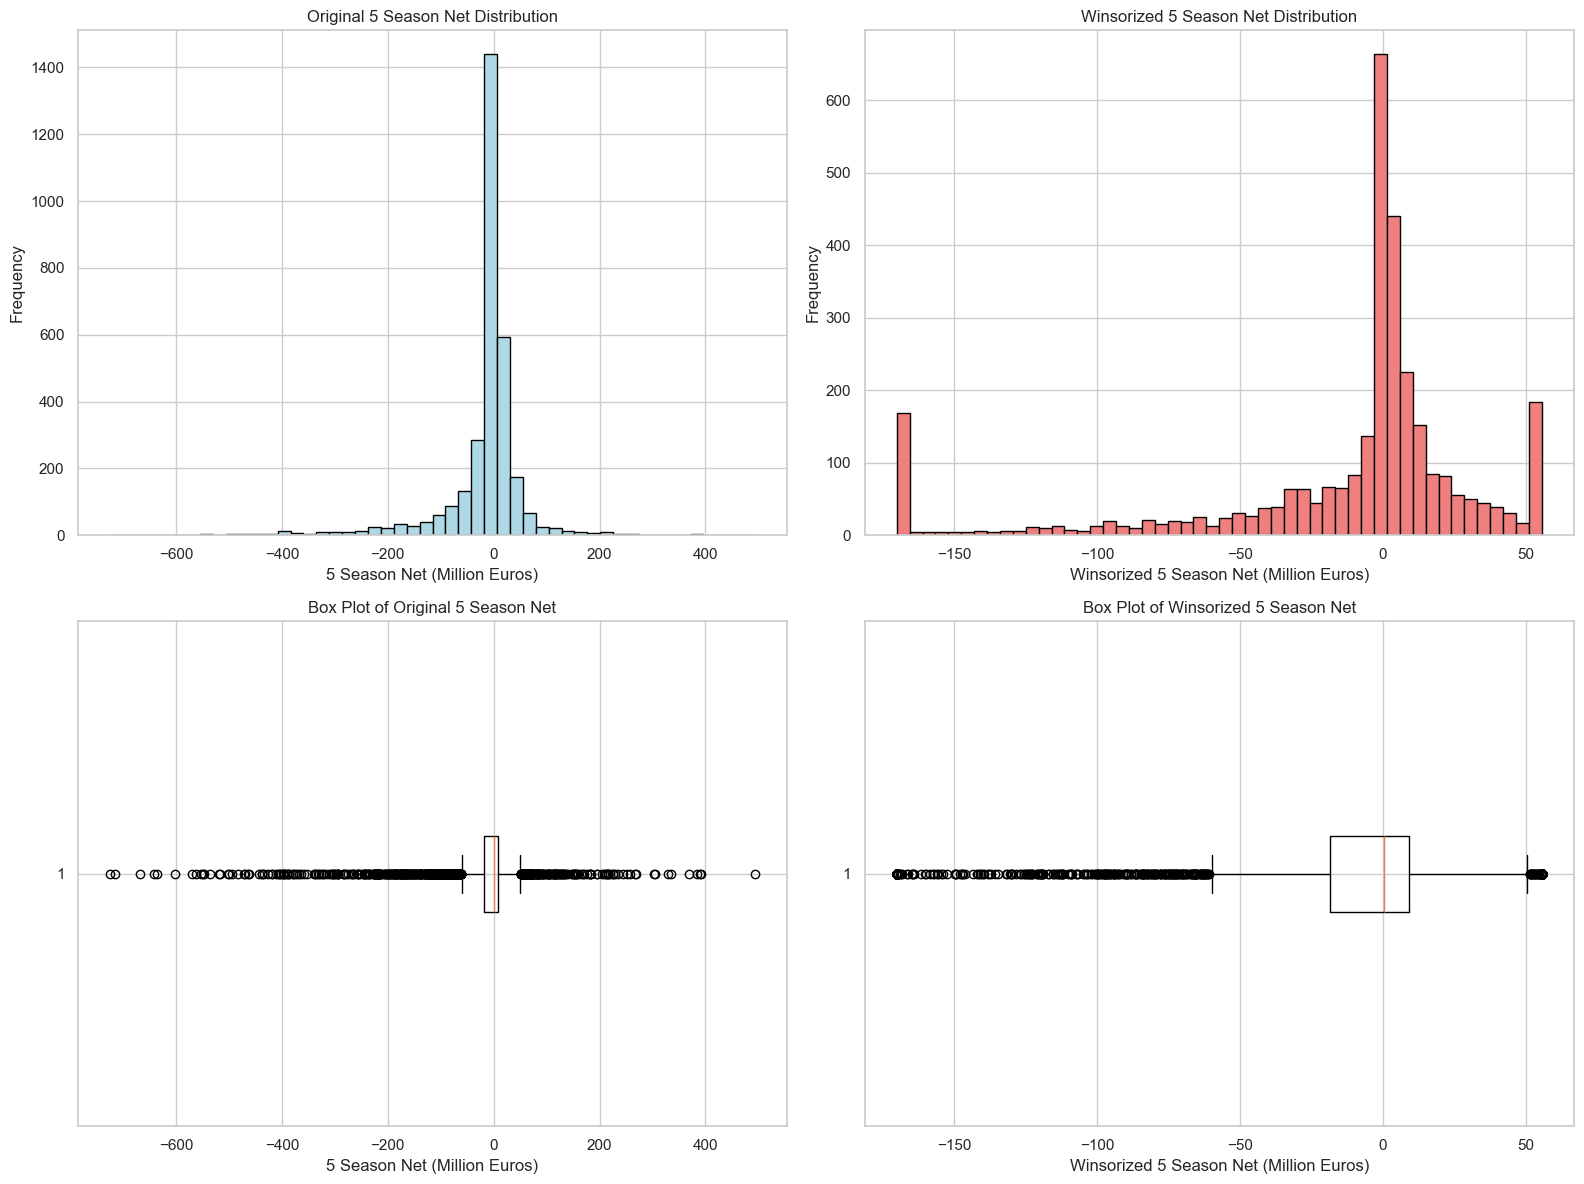

In [133]:
# Apply Winsorization at the 5th and 95th percentiles
filtered_data['winsorized_5_season_net'] = mstats.winsorize(filtered_data['5_season_net'], limits=[0.05, 0.05])

# Create subplots to compare original and Winsorized data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original 5_season_net distribution (Histogram)
axes[0, 0].hist(filtered_data['5_season_net'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original 5 Season Net Distribution')
axes[0, 0].set_xlabel('5 Season Net (Million Euros)')
axes[0, 0].set_ylabel('Frequency')

# Winsorized 5_season_net distribution (Histogram)
axes[0, 1].hist(filtered_data['winsorized_5_season_net'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Winsorized 5 Season Net Distribution')
axes[0, 1].set_xlabel('Winsorized 5 Season Net (Million Euros)')
axes[0, 1].set_ylabel('Frequency')

# Original 5_season_net distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['5_season_net'], vert=False)
axes[1, 0].set_title('Box Plot of Original 5 Season Net')
axes[1, 0].set_xlabel('5 Season Net (Million Euros)')

# Winsorized 5_season_net distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['winsorized_5_season_net'], vert=False)
axes[1, 1].set_title('Box Plot of Winsorized 5 Season Net')
axes[1, 1].set_xlabel('Winsorized 5 Season Net (Million Euros)')

plt.tight_layout()
plt.show()

+ **Histograms** :

    + **Before Winsorization**:

        + The original histogram shows a distribution **centered** around **zero**, with a narrow peak at **zero** and **long tails** extending towards **both** extreme **negative** and **positive** values. The **tails** indicate the presence of significant outliers, particularly extreme values in both the deficit and surplus ends of the financial spectrum.
        
    + **After Winsorization**:
        
        + After **Winsorization**, the histogram shows a more **balanced** distribution. The extreme values on **both** **ends** have been **capped**, resulting in shorter **tails** and a more **concentrated** distribution around the **center**. This capping reduces the influence of the most extreme **outliers** while retaining the general shape of the data.
          

+ **Box plots** :

    + **Before Winsorization**:
        
        + The original box plot reveals a substantial number of **outliers** on **both** the **negative** and **positive** sides. Some values are as extreme as **-600** million euros and **+400** million euros. These **outliers** suggest that certain teams had exceptionally high net spending, either heavily **negative** or **positive**, which could potentially **skew** any financial analysis.
        
    + **After Winsorization**:
        
        + The **Winsorized** box plot demonstrates a much more **compact interquartile range** (IQR), with **fewer** and **less severe outliers**. The extreme values have **been capped**, bringing the data closer to the **central** distribution, and **reducing the impact of outliers** on the analysis. The distribution is now **more symmetric**, making the data easier to analyze and interpret.

+ **Winsorization** effectively **reduced** the influence of extreme values in the **`5_season_net`** column. The distribution is now more **balanced**, with **fewer outliers**, making the data more suitable for comparative analysis.
+ By **capping** the outliers rather than transforming the entire dataset, **Winsorization** preserved the original scale and relative differences, making the data easier to interpret and compare.
+ The **Winsorized** data is more manageable and **less** likely to produce skewed results. This ensures that your analysis remains robust, accurate, and aligned with your project objectives, enabling you to draw more reliable conclusions about financial performance.

### e. Summary :

+ The **`5_season_net`**'s range is from **-724.78** million to **493.68** million euros. 
+ On average, most teams **spend more** than they **earn** during this period.
+ The distribution is **fairly symmetric** and centered **around zero**, with most values **clustering** near the **center**.
+ The **data type** of the **`5_season_net`** column is **`float64`**, **appropriate** for financial data.
+ There are **no missing** values, ensuring the dataset is complete for analysis.
+ I chose to apply **Winsorized** to the **`5_season_net`** data for **handling outliers**.

+ ### `5_season_league_agg` Column :

### a. Explore the column:

In [134]:
# Summary statistics for the '5_season_league_agg' column
season_league_agg_summary = filtered_data['5_season_league_agg'].describe()
print("=== Summary statistics for the '5_season_league_agg' column ===\n")
print(season_league_agg_summary)
print("\n==============================================================")

=== Summary statistics for the '5_season_league_agg' column ===

count    3172.000000
mean     1100.948631
std      1626.781252
min         6.155000
25%       123.920000
50%       451.550000
75%      1409.970000
max      9810.000000
Name: 5_season_league_agg, dtype: float64



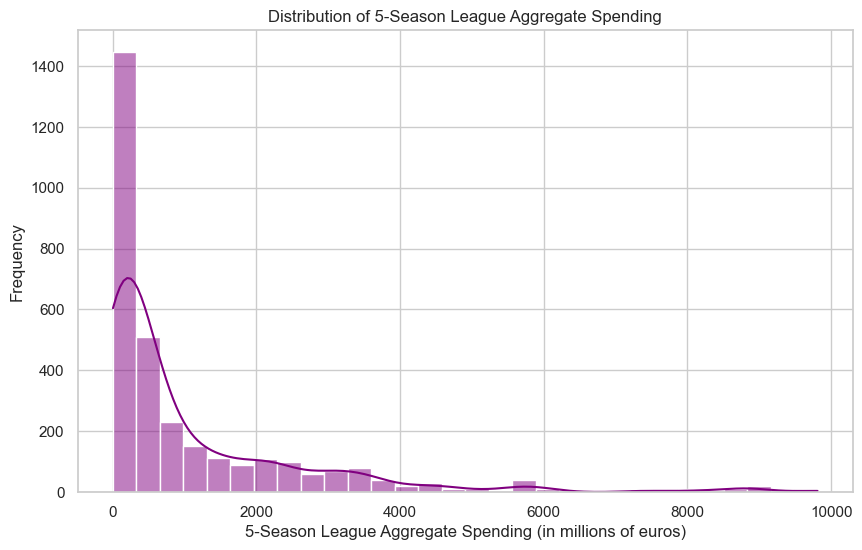

In [135]:
# Visualizing the distribution of the "5_season_league_agg" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['5_season_league_agg'], bins=30, kde=True, color='purple')
plt.title('Distribution of 5-Season League Aggregate Spending')
plt.xlabel('5-Season League Aggregate Spending (in millions of euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **`5_season_league_agg`** range from **6.15** million to **9810** million.
+ The **median** spending is **451.55** million , indicating that half of the leagues spend less than this amount, while the other half spends more.
+ The wide range and large disparities in spending highlight the differences in **financial capabilities** and **strategies** among different leagues.
+ The **distribution** is highly **right-skewed**, with most leagues having lower aggregate spending over five seasons.

### b. Check and Correct Data Type :

In [136]:
# Verify the data type of the "5_season_league_agg" column
season_league_agg_dtype = filtered_data['5_season_league_agg'].dtype
print(f"The data type of the '5_season_league_agg' column is: {season_league_agg_dtype}")

The data type of the '5_season_league_agg' column is: float64


+ The data type of the **`5_season_league_agg`** column is **`float64`**, which is appropriate for representing numerical values, especially financial data. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [137]:
# Check for missing values in the '5_season_league_agg' column
missing_values_season_league_agg = filtered_data['5_season_league_agg'].isnull().sum()
print(f"Missing values in '5_season_league_agg' column: {missing_values_season_league_agg}")

Missing values in '5_season_league_agg' column: 0


+ There are **no missing values** in the **`5_season_league_agg`** column. This means the data is complete and does not require any handling for missing values.

### d. Identify and Fix Outliers :

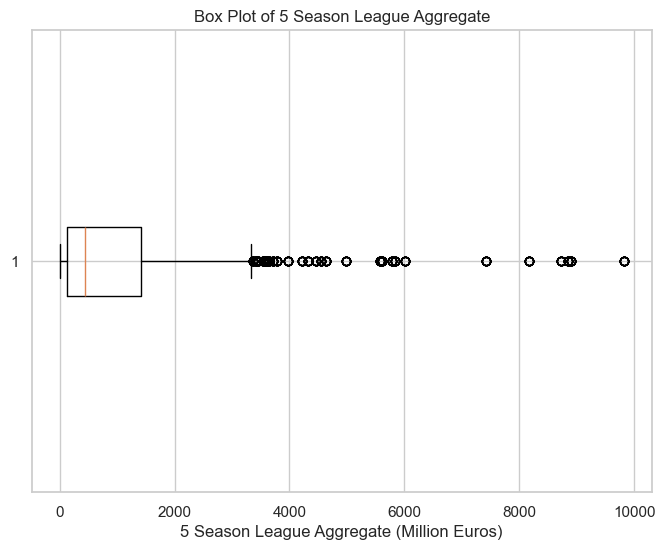

In [138]:
# Create a box plot for the '5_season_league_agg' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['5_season_league_agg'], vert=False)
plt.title('Box Plot of 5 Season League Aggregate')
plt.xlabel('5 Season League Aggregate (Million Euros)')
plt.show()

+ The box plot shows a **significant number of outliers** on the **higher end** of the distribution, starting from around **2,000** million euros and extending up to nearly **10,000** million euros. These outliers represent leagues with exceptionally high aggregate spending or performance over the five-season period, which could potentially skew the analysis if not managed properly.

+ The values in the **`5_season_league_agg`** column vary** widely**, ranging from as low as a few million euros to nearly **10 billion euros**. This wide range indicates significant differences in financial activities across leagues, which can complicate comparative analysis.
+ **log transformation** was applied to the **`5_season_league_agg`** column

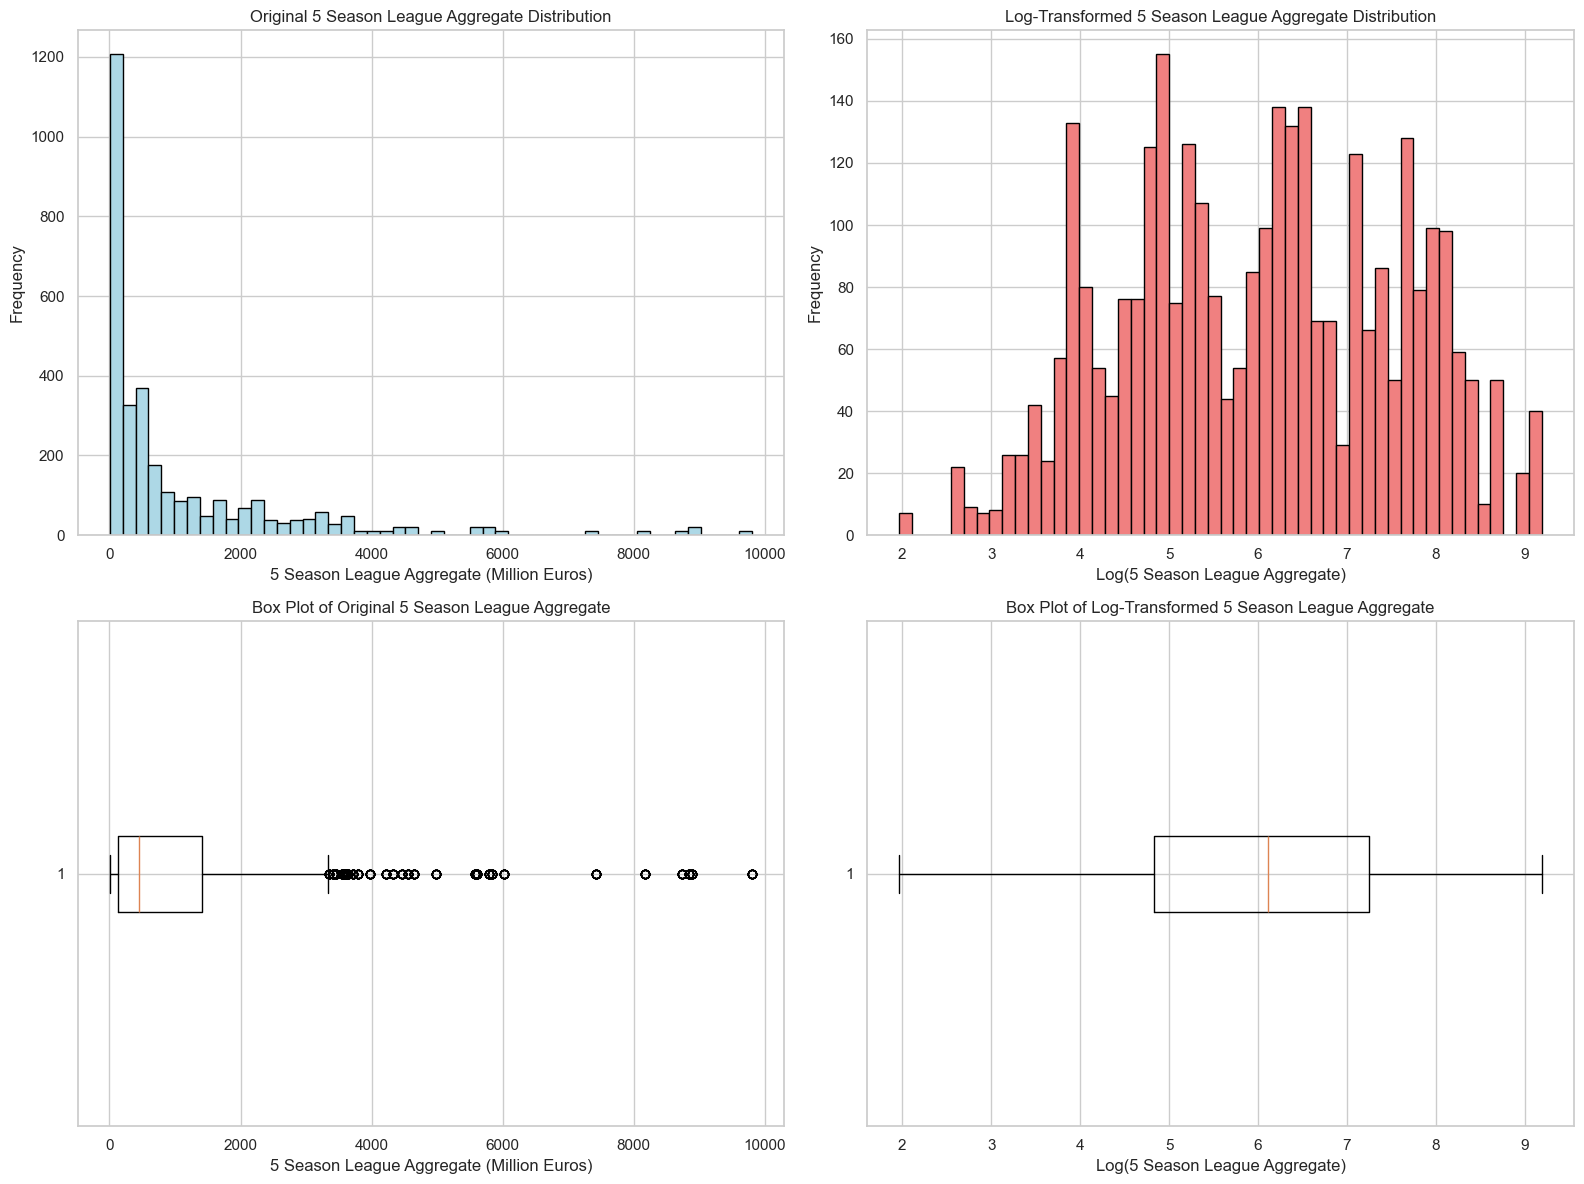

In [139]:
# Apply log transformation to the '5_season_league_agg' column, adding a small constant to avoid log(0)
filtered_data['log_5_season_league_agg'] = np.log1p(filtered_data['5_season_league_agg'])

# Create subplots to compare original and log-transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original 5_season_league_agg distribution (Histogram)
axes[0, 0].hist(filtered_data['5_season_league_agg'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original 5 Season League Aggregate Distribution')
axes[0, 0].set_xlabel('5 Season League Aggregate (Million Euros)')
axes[0, 0].set_ylabel('Frequency')

# Transformed 5_season_league_agg distribution (Histogram)
axes[0, 1].hist(filtered_data['log_5_season_league_agg'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log-Transformed 5 Season League Aggregate Distribution')
axes[0, 1].set_xlabel('Log(5 Season League Aggregate)')
axes[0, 1].set_ylabel('Frequency')

# Original 5_season_league_agg distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['5_season_league_agg'], vert=False)
axes[1, 0].set_title('Box Plot of Original 5 Season League Aggregate')
axes[1, 0].set_xlabel('5 Season League Aggregate (Million Euros)')

# Transformed 5_season_league_agg distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_5_season_league_agg'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed 5 Season League Aggregate')
axes[1, 1].set_xlabel('Log(5 Season League Aggregate)')

plt.tight_layout()
plt.show()

+ **Histograms** :

    + **Before Transformation**:
      
        + The original histogram shows a **strong right-skewness**, with most league aggregates falling under **2,000 million euros**. However, there is a **long tail** extending towards much higher values, with some leagues reaching nearly **10,000 million euros**. This indicates significant variability and the presence of extreme outliers.
          
    + **After Log Transformation**:
      
        + The log transformation has significantly **reduced the skewness**, resulting in a more **balanced and symmetric** distribution. The extreme values have been **compressed**, making the overall spending patterns across leagues more comparable. The distribution is now more evenly **spread**, with fewer extreme deviations.

+ **Box plots** :

    + **Before Transformation**:
      
        + The original box plot highlights a **large number of outliers** starting from around **2,000** million euros, with some values extending close to **10,000 million euros**. These outliers suggest that certain leagues had exceptionally high aggregate spending or performance over the five-season period, which could skew the analysis.

    + **After Log Transformation**:
      
        + The **log-transformed** box plot shows fewer and less severe outliers, with a more **compact interquartile range** (IQR). The transformation has successfully **reduced the impact of extreme values**, bringing the majority of data points closer together and making the dataset easier to analyze.

### e. Summary :

+ The **`5_season_league_agg`** column reflects the total spending by leagues over a five-season period, with values ranging from **6.15** million to **9810** million.
+ The **median** spending is **451.55** million.
+ The **distribution** is highly **right-skewed**, with most leagues having lower aggregate spending, while a few leagues spend significantly more.
+ The **data type** of the **`5_season_league_agg`** column is **`float64`**, **appropriate** for financial data.
+ There are **no missing** values, ensuring the dataset is complete for analysis.
+ I chose to apply **log transformation** to the **`5_season_league_agg`** data for **handling outliers**.
+ The **log transformation** was effective in **normalizing** the distribution of the **`5_season_league_agg`** column, significantly reducing skewness and making the data more suitable for analysis.
+ The **log transformation** **compressed** the extreme values, **reducing** their influence on the overall analysis. This makes the data more balanced and easier to interpret.
+ The transformed data is more **manageable**, with **fewer extreme outliers** distorting the results. This ensures that your analysis remains robust and aligned with the **project objectives**, enabling you to draw more reliable conclusions about league-level performance over the five-season period.

+ ### `5_season_relative` Column :

### a. Explore the column:

In [140]:
# Summary statistics for the '5_season_relative' column
season_relative_summary = filtered_data['5_season_relative'].describe()
print("=== Summary statistics for the '5_season_relative' column ===\n")
print(season_relative_summary)
print("\n=============================================================")

=== Summary statistics for the '5_season_relative' column ===

count    3172.000000
mean        0.094949
std         0.137280
min         0.000000
25%         0.007681
50%         0.044218
75%         0.126635
max         2.226247
Name: 5_season_relative, dtype: float64



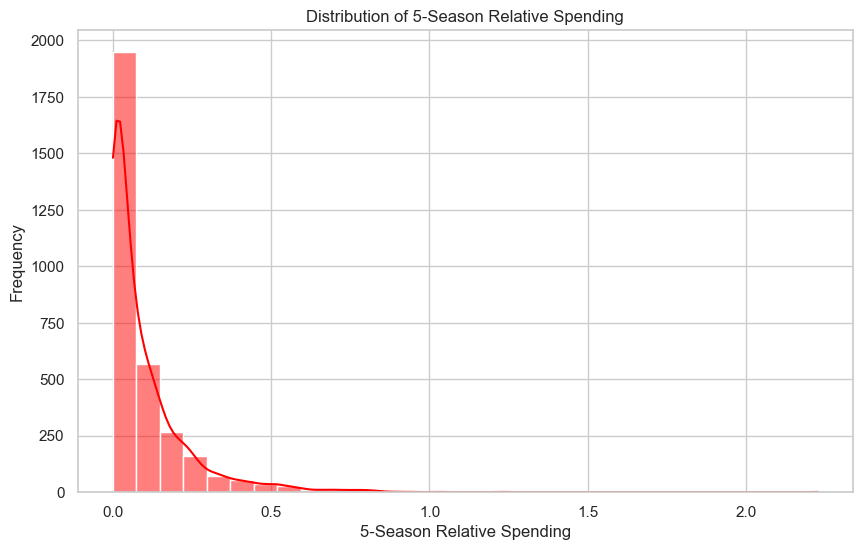

In [141]:
# Visualizing the distribution of the "5_season_relative" column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['5_season_relative'], bins=30, kde=True, color='red')
plt.title('Distribution of 5-Season Relative Spending')
plt.xlabel('5-Season Relative Spending')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

+ The **relative spending** values range from **0.00** to **2.22**, with an **average** of **0.0949**.
+ The **median** relative spending is **0.04**, indicating that half of the teams spend a small fraction of their league's total spending, while a few teams have much higher relative spending.
+ The **distribution** is **right-skewed**, with most teams having lower relative spending ratios.

### b. Check and Correct Data Type :

In [142]:
# Verify the data type of the "5_season_relative" column
season_relative_dtype = filtered_data['5_season_relative'].dtype
print(f"The data type of the '5_season_relative' column is: {season_relative_dtype}")

The data type of the '5_season_relative' column is: float64


+ The data type of the **`5_season_relative`** column is **`float64`**, which is appropriate for representing numerical values, especially financial data. There is **no need** to **convert** it.

### c. Handle Missing Values :

In [143]:
# Check for missing values in the '5_season_relative' column
missing_values_season_relative = filtered_data['5_season_relative'].isnull().sum()
print(f"Missing values in '5_season_relative' column: {missing_values_season_relative}")

Missing values in '5_season_relative' column: 0


+ There are **no missing values** in the **`5_season_relative`** column. This means the data is complete and does not require any handling for missing values.

### d. Identify and Fix Outliers :

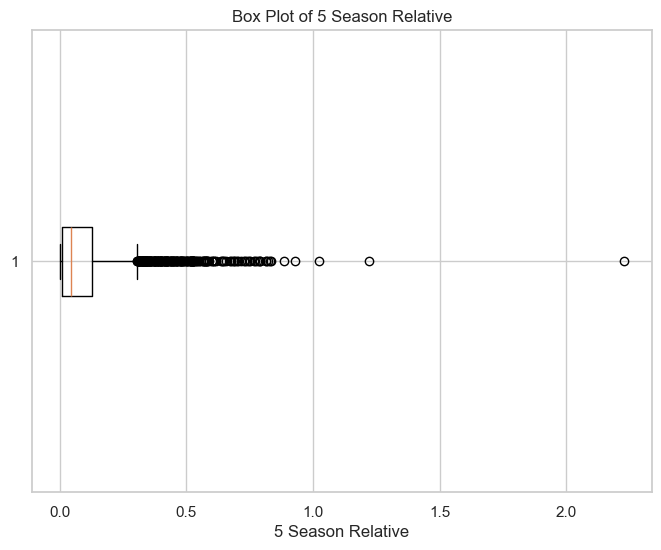

In [144]:
# Create a box plot for the '5_season_relative' column to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['5_season_relative'], vert=False)
plt.title('Box Plot of 5 Season Relative')
plt.xlabel('5 Season Relative')
plt.show()

+ The box plot shows a **significant number of outliers** extending from around **0.3** up to the maximum value of **2.226**. These outliers represent teams with exceptionally high relative metrics over the five-season period, which could potentially skew the analysis if not managed properly.

+ **Problematic** :

    + The original data exhibited significant **right skewness** and a substantial number of outliers, particularly on the **higher end** of the distribution.
    + These **outliers** could **distort** the analysis, leading to **misleading** conclusions about relative performance metrics.

+ **Decision** :
  
    + I Chose **Log Transformation**:

        + The **log transformation** is particularly effective for financial or **performance-related** data, which **often exhibits skewness**. It compresses the range of **higher** values, reducing the impact of **outliers** while maintaining the relative differences between teams. This transformation helps to **normalize** the data, making it more suitable for statistical analysis.
        + By applying the **log transformation**, the influence of extreme values is **reduced**, ensuring that they do not disproportionately affect the analysis. This helps maintain the integrity of the data while allowing for meaningful comparisons between teams.
        + The **log transformation** retains the interpretability of the relative data, as it still reflects the underlying performance metric in a more normalized form.

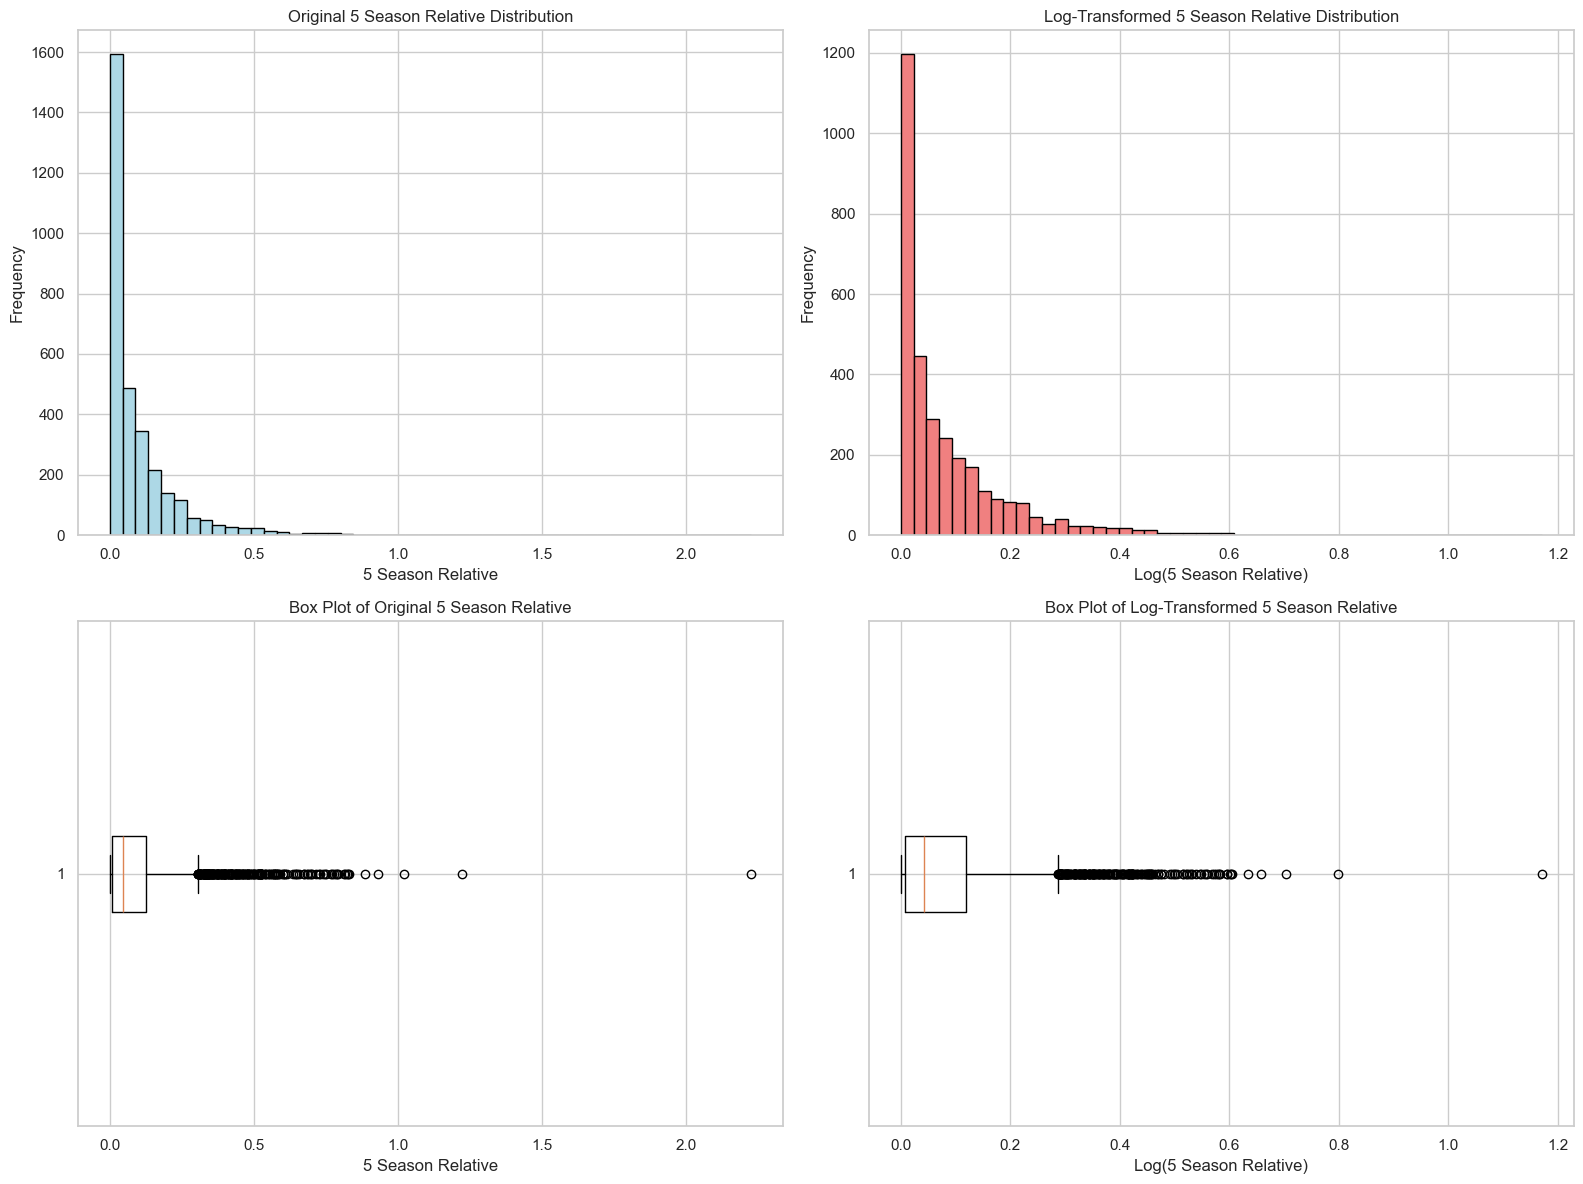

In [145]:
# Apply log transformation to the '5_season_relative' column, adding a small constant to avoid log(0)
filtered_data['log_5_season_relative'] = np.log1p(filtered_data['5_season_relative'])

# Create subplots to compare original and log-transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original 5_season_relative distribution (Histogram)
axes[0, 0].hist(filtered_data['5_season_relative'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original 5 Season Relative Distribution')
axes[0, 0].set_xlabel('5 Season Relative')
axes[0, 0].set_ylabel('Frequency')

# Transformed 5_season_relative distribution (Histogram)
axes[0, 1].hist(filtered_data['log_5_season_relative'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log-Transformed 5 Season Relative Distribution')
axes[0, 1].set_xlabel('Log(5 Season Relative)')
axes[0, 1].set_ylabel('Frequency')

# Original 5_season_relative distribution (Box Plot)
axes[1, 0].boxplot(filtered_data['5_season_relative'], vert=False)
axes[1, 0].set_title('Box Plot of Original 5 Season Relative')
axes[1, 0].set_xlabel('5 Season Relative')

# Transformed 5_season_relative distribution (Box Plot)
axes[1, 1].boxplot(filtered_data['log_5_season_relative'], vert=False)
axes[1, 1].set_title('Box Plot of Log-Transformed 5 Season Relative')
axes[1, 1].set_xlabel('Log(5 Season Relative)')

plt.tight_layout()
plt.show()

+ **Histograms** :
  
    +  **Before Transformation**:
      
        +  The original histogram shows a **strong right-skewed** distribution, with most values **concentrated near zero** and a **long tail** extending towards higher values, up to around **2.23**. This indicates the presence of **significant outliers**, where some teams have much higher relative metrics over the five-season period.
     
    +  **After Log Transformation**:
      
        +  The **log-transformed** histogram significantly **reduces** the **skewness**, leading to a more **normalized** distribution. The extreme values are compressed, making the overall distribution more **balanced** and comparable across different teams. This results in a more even spread of the data, with fewer extreme deviations.
       

   
+ **Box plots** :
  
    +  **Before Transformation**:
      
        +  The original box plot reveals **numerous outliers**, particularly beyond **0.3**, with values extending up to **2.23**. These outliers suggest that certain teams have exceptionally high relative performance or spending metrics, which could skew the overall analysis.
          
    +  **After Log Transformation**:
      
        +  The **log-transformed** box plot shows **fewer** and **less severe outliers**. The **interquartile range (IQR) is more compact**, indicating that the majority of data points are now **closer** together. The transformation effectively reduces the impact of extreme values, making the dataset easier to analyze and interpret.

### e. Summary :

+ The **`5_season_relative`** values range from **0.0000** to **2.22**.
+ The **distribution** is **right-skewed**, with most teams having lower relative spending ratios.
+ The **data type** of the **`5_season_relative`** column is **`float64`**, **appropriate** for financial data.
+ There are **no missing** values, ensuring the dataset is complete for analysis.
+ I chose to apply **Log Transformation** to the **`5_season_relative`** data for **handling outliers**.

In [146]:
# Save the filtered dataset to a CSV file without the index column for further analysis
filtered_data.to_csv('../Data/clean_data.csv', index=False)

## Summary :

+ **Datatypes:**

    + The following columns, originally of **`object`** type, were **converted** to **`categorical`** type: **`league`**, **`team`**, **`competition`**, **`position`**, **`first_tier`**.

    + Converting these columns to **`categorical`** type **reduced memory** usage and **improved processing speed** during analysis.

+ **Handling Missing Values:**
    
    + For the columns related to performance metrics, such as **`wins`**, **`ties`**, **`losses`**, **`goals_for`**, and **`goals_against`**, we observed that missing values were likely due to seasons **not being recorded** for certain teams.
        
    + **Initially**, we considered **filling** these missing values with **0s**, but this approach **skewed the analysis**. We also attempted to use the **median** method, but it did **not yield satisfactory results**.
          
    + **Ultimately**, we decided to **drop** these rows with missing values to **maintain** the **integrity** of the analysis.

+ **Outlier Detection and Transformation:**

    + Outliers in financial metrics and performance data were identified and addressed using transformations such as **log**, **Winsorization** and **square-root** functions to **normalize** the data distribution and** minimize** the **impact of extreme values**.

+ **Feature Engineering:**

    + **New features** were created to enhance the analysis. These included **log-transformed** **financial metrics** (**`log_revenue`**, **`log_spent`**, and **`log_league_spent`**) or for **Performance metrics** like **`goals_for`** and **`goals_against`** were transformed using **square-root** and **cube-root** transformations., which provided additional insights into the long-term financial and performance trends of the teams.

+ **Data Normalization:**

    + **Continuous** variables were **normalized** to ensure that the data was suitable for **regression analysis** and other **statistical techniques**, helping to improve the accuracy and interpretability of the results.

## Conclusion

After **completing** the **cleaning and preprocessing steps**, the data will be **passed** to the next step, **data validatio**, where it will be **reviewed** to ensure that all necessary adjustments were made. Following this validation, the dataset will be fully prepared and ready for **exploratory data analysis (EDA)**.